# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 65706 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 65706) |           | Elapsed Time: 0:00:27 ETA:  21 days, 5:34:44

  0% (   85 of 65706) |                    | Elapsed Time: 0:00:28 ETA:  0:12:38

  0% (  163 of 65706) |                    | Elapsed Time: 0:00:29 ETA:  0:13:08

  0% (  237 of 65706) |                    | Elapsed Time: 0:00:30 ETA:  0:13:30

  0% (  312 of 65706) |                    | Elapsed Time: 0:00:31 ETA:  0:13:40

  0% (  386 of 65706) |                    | Elapsed Time: 0:00:32 ETA:  0:13:47

  0% (  461 of 65706) |                    | Elapsed Time: 0:00:33 ETA:  0:13:50

  0% (  537 of 65706) |                    | Elapsed Time: 0:00:34 ETA:  0:13:49

  0% (  618 of 65706) |                    | Elapsed Time: 0:00:35 ETA:  0:13:42

  1% (  697 of 65706) |                    | Elapsed Time: 0:00:36 ETA:  0:13:39

  1% (  776 of 65706) |                    | Elapsed Time: 0:00:38 ETA:  0:13:44

  1% (  822 of 65706) |                    | Elapsed Time: 0:00:38 ETA:  0:13:43

  1% (  902 of 65706) |                    | Elapsed Time: 0:00:39 ETA:  0:13:34

  1% (  982 of 65706) |                    | Elapsed Time: 0:00:40 ETA:  0:13:26

  1% ( 1062 of 65706) |                    | Elapsed Time: 0:00:41 ETA:  0:13:17

  1% ( 1143 of 65706) |                    | Elapsed Time: 0:00:42 ETA:  0:13:09

  1% ( 1222 of 65706) |                    | Elapsed Time: 0:00:43 ETA:  0:13:05

  1% ( 1304 of 65706) |                    | Elapsed Time: 0:00:44 ETA:  0:13:02

  2% ( 1388 of 65706) |                    | Elapsed Time: 0:00:45 ETA:  0:12:56

  2% ( 1467 of 65706) |                    | Elapsed Time: 0:00:46 ETA:  0:12:54

  2% ( 1549 of 65706) |                    | Elapsed Time: 0:00:47 ETA:  0:12:51

  2% ( 1643 of 65706) |                    | Elapsed Time: 0:00:48 ETA:  0:12:46

  2% ( 1724 of 65706) |                    | Elapsed Time: 0:00:49 ETA:  0:12:45

  2% ( 1804 of 65706) |                    | Elapsed Time: 0:00:50 ETA:  0:12:44

  2% ( 1874 of 65706) |                    | Elapsed Time: 0:00:51 ETA:  0:12:55

  2% ( 1940 of 65706) |                    | Elapsed Time: 0:00:52 ETA:  0:13:15

  3% ( 2006 of 65706) |                    | Elapsed Time: 0:00:53 ETA:  0:13:37

  3% ( 2073 of 65706) |                    | Elapsed Time: 0:00:54 ETA:  0:13:54

  3% ( 2137 of 65706) |                    | Elapsed Time: 0:00:55 ETA:  0:14:20

  3% ( 2204 of 65706) |                    | Elapsed Time: 0:00:56 ETA:  0:14:43

  3% ( 2270 of 65706) |                    | Elapsed Time: 0:00:57 ETA:  0:14:51

  3% ( 2280 of 65706) |                    | Elapsed Time: 0:00:58 ETA:  0:16:51

  3% ( 2344 of 65706) |                    | Elapsed Time: 0:00:59 ETA:  0:17:22

  3% ( 2409 of 65706) |                    | Elapsed Time: 0:01:00 ETA:  0:17:32

  3% ( 2464 of 65706) |                    | Elapsed Time: 0:01:01 ETA:  0:17:31

  3% ( 2531 of 65706) |                    | Elapsed Time: 0:01:02 ETA:  0:17:29

  3% ( 2598 of 65706) |                    | Elapsed Time: 0:01:03 ETA:  0:17:28

  4% ( 2673 of 65706) |                    | Elapsed Time: 0:01:04 ETA:  0:17:04

  4% ( 2752 of 65706) |                    | Elapsed Time: 0:01:05 ETA:  0:16:40

  4% ( 2831 of 65706) |                    | Elapsed Time: 0:01:06 ETA:  0:16:14

  4% ( 2905 of 65706) |                    | Elapsed Time: 0:01:07 ETA:  0:14:26

  4% ( 2984 of 65706) |                    | Elapsed Time: 0:01:08 ETA:  0:14:03

  4% ( 3063 of 65706) |                    | Elapsed Time: 0:01:09 ETA:  0:13:43

  4% ( 3148 of 65706) |                    | Elapsed Time: 0:01:10 ETA:  0:13:20

  4% ( 3236 of 65706) |                    | Elapsed Time: 0:01:11 ETA:  0:12:52

  5% ( 3286 of 65706) |#                   | Elapsed Time: 0:01:12 ETA:  0:12:32

  5% ( 3373 of 65706) |#                   | Elapsed Time: 0:01:13 ETA:  0:12:17

  5% ( 3460 of 65706) |#                   | Elapsed Time: 0:01:14 ETA:  0:12:06

  5% ( 3546 of 65706) |#                   | Elapsed Time: 0:01:15 ETA:  0:11:57

  5% ( 3635 of 65706) |#                   | Elapsed Time: 0:01:16 ETA:  0:11:39

  5% ( 3722 of 65706) |#                   | Elapsed Time: 0:01:17 ETA:  0:11:31

  5% ( 3811 of 65706) |#                   | Elapsed Time: 0:01:18 ETA:  0:11:19

  5% ( 3900 of 65706) |#                   | Elapsed Time: 0:01:19 ETA:  0:11:13

  6% ( 3990 of 65706) |#                   | Elapsed Time: 0:01:20 ETA:  0:11:10

  6% ( 4080 of 65706) |#                   | Elapsed Time: 0:01:21 ETA:  0:11:07

  6% ( 4107 of 65706) |#                   | Elapsed Time: 0:01:21 ETA:  0:11:07

  6% ( 4184 of 65706) |#                   | Elapsed Time: 0:01:22 ETA:  0:11:16

  6% ( 4260 of 65706) |#                   | Elapsed Time: 0:01:23 ETA:  0:11:26

  6% ( 4341 of 65706) |#                   | Elapsed Time: 0:01:24 ETA:  0:11:33

  6% ( 4420 of 65706) |#                   | Elapsed Time: 0:01:25 ETA:  0:11:40

  6% ( 4500 of 65706) |#                   | Elapsed Time: 0:01:26 ETA:  0:11:50

  6% ( 4580 of 65706) |#                   | Elapsed Time: 0:01:27 ETA:  0:11:59

  7% ( 4659 of 65706) |#                   | Elapsed Time: 0:01:28 ETA:  0:12:13

  7% ( 4738 of 65706) |#                   | Elapsed Time: 0:01:29 ETA:  0:12:26

  7% ( 4815 of 65706) |#                   | Elapsed Time: 0:01:30 ETA:  0:12:28

  7% ( 4887 of 65706) |#                   | Elapsed Time: 0:01:31 ETA:  0:12:34

  7% ( 4928 of 65706) |#                   | Elapsed Time: 0:01:32 ETA:  0:12:38

  7% ( 4998 of 65706) |#                   | Elapsed Time: 0:01:33 ETA:  0:12:52

  7% ( 5070 of 65706) |#                   | Elapsed Time: 0:01:34 ETA:  0:13:01

  7% ( 5141 of 65706) |#                   | Elapsed Time: 0:01:35 ETA:  0:13:12

  7% ( 5213 of 65706) |#                   | Elapsed Time: 0:01:36 ETA:  0:13:22

  8% ( 5290 of 65706) |#                   | Elapsed Time: 0:01:37 ETA:  0:13:23

  8% ( 5379 of 65706) |#                   | Elapsed Time: 0:01:38 ETA:  0:13:08

  8% ( 5463 of 65706) |#                   | Elapsed Time: 0:01:39 ETA:  0:12:58

  8% ( 5545 of 65706) |#                   | Elapsed Time: 0:01:40 ETA:  0:12:44

  8% ( 5625 of 65706) |#                   | Elapsed Time: 0:01:41 ETA:  0:12:33

  8% ( 5697 of 65706) |#                   | Elapsed Time: 0:01:42 ETA:  0:12:29

  8% ( 5711 of 65706) |#                   | Elapsed Time: 0:01:43 ETA:  0:14:11

  8% ( 5750 of 65706) |#                   | Elapsed Time: 0:01:44 ETA:  0:14:12

  8% ( 5821 of 65706) |#                   | Elapsed Time: 0:01:45 ETA:  0:14:13

  8% ( 5891 of 65706) |#                   | Elapsed Time: 0:01:46 ETA:  0:14:22

  9% ( 5964 of 65706) |#                   | Elapsed Time: 0:01:47 ETA:  0:14:48

  9% ( 6037 of 65706) |#                   | Elapsed Time: 0:01:48 ETA:  0:15:05

  9% ( 6113 of 65706) |#                   | Elapsed Time: 0:01:49 ETA:  0:15:16

  9% ( 6189 of 65706) |#                   | Elapsed Time: 0:01:50 ETA:  0:15:21

  9% ( 6265 of 65706) |#                   | Elapsed Time: 0:01:51 ETA:  0:15:12

  9% ( 6341 of 65706) |#                   | Elapsed Time: 0:01:52 ETA:  0:13:04

  9% ( 6424 of 65706) |#                   | Elapsed Time: 0:01:53 ETA:  0:12:48

  9% ( 6512 of 65706) |#                   | Elapsed Time: 0:01:54 ETA:  0:12:25

 10% ( 6571 of 65706) |##                  | Elapsed Time: 0:01:55 ETA:  0:12:12

 10% ( 6647 of 65706) |##                  | Elapsed Time: 0:01:56 ETA:  0:12:06

 10% ( 6724 of 65706) |##                  | Elapsed Time: 0:01:57 ETA:  0:12:01

 10% ( 6801 of 65706) |##                  | Elapsed Time: 0:01:58 ETA:  0:11:59

 10% ( 6878 of 65706) |##                  | Elapsed Time: 0:01:59 ETA:  0:11:57

 10% ( 6955 of 65706) |##                  | Elapsed Time: 0:02:00 ETA:  0:11:55

 10% ( 7031 of 65706) |##                  | Elapsed Time: 0:02:01 ETA:  0:11:55

 10% ( 7107 of 65706) |##                  | Elapsed Time: 0:02:02 ETA:  0:12:03

 10% ( 7183 of 65706) |##                  | Elapsed Time: 0:02:03 ETA:  0:12:17

 11% ( 7258 of 65706) |##                  | Elapsed Time: 0:02:04 ETA:  0:12:23

 11% ( 7332 of 65706) |##                  | Elapsed Time: 0:02:05 ETA:  0:12:25

 11% ( 7392 of 65706) |##                  | Elapsed Time: 0:02:05 ETA:  0:12:26

 11% ( 7467 of 65706) |##                  | Elapsed Time: 0:02:06 ETA:  0:12:27

 11% ( 7543 of 65706) |##                  | Elapsed Time: 0:02:07 ETA:  0:12:27

 11% ( 7618 of 65706) |##                  | Elapsed Time: 0:02:08 ETA:  0:12:29

 11% ( 7693 of 65706) |##                  | Elapsed Time: 0:02:09 ETA:  0:12:28

 11% ( 7769 of 65706) |##                  | Elapsed Time: 0:02:10 ETA:  0:12:27

 11% ( 7846 of 65706) |##                  | Elapsed Time: 0:02:11 ETA:  0:12:25

 12% ( 7921 of 65706) |##                  | Elapsed Time: 0:02:12 ETA:  0:12:24

 12% ( 7997 of 65706) |##                  | Elapsed Time: 0:02:13 ETA:  0:12:19

 12% ( 8072 of 65706) |##                  | Elapsed Time: 0:02:14 ETA:  0:12:18

 12% ( 8147 of 65706) |##                  | Elapsed Time: 0:02:15 ETA:  0:12:17

 12% ( 8214 of 65706) |##                  | Elapsed Time: 0:02:16 ETA:  0:12:17

 12% ( 8290 of 65706) |##                  | Elapsed Time: 0:02:17 ETA:  0:12:15

 12% ( 8367 of 65706) |##                  | Elapsed Time: 0:02:18 ETA:  0:12:12

 12% ( 8445 of 65706) |##                  | Elapsed Time: 0:02:19 ETA:  0:12:08

 12% ( 8528 of 65706) |##                  | Elapsed Time: 0:02:20 ETA:  0:11:59

 13% ( 8609 of 65706) |##                  | Elapsed Time: 0:02:21 ETA:  0:11:50

 13% ( 8693 of 65706) |##                  | Elapsed Time: 0:02:22 ETA:  0:11:40

 13% ( 8773 of 65706) |##                  | Elapsed Time: 0:02:23 ETA:  0:11:33

 13% ( 8857 of 65706) |##                  | Elapsed Time: 0:02:24 ETA:  0:11:22

 13% ( 8941 of 65706) |##                  | Elapsed Time: 0:02:25 ETA:  0:11:11

 13% ( 9035 of 65706) |##                  | Elapsed Time: 0:02:27 ETA:  0:10:58

 13% ( 9120 of 65706) |##                  | Elapsed Time: 0:02:28 ETA:  0:10:48

 14% ( 9204 of 65706) |##                  | Elapsed Time: 0:02:29 ETA:  0:10:46

 14% ( 9287 of 65706) |##                  | Elapsed Time: 0:02:30 ETA:  0:10:43

 14% ( 9368 of 65706) |##                  | Elapsed Time: 0:02:31 ETA:  0:10:45

 14% ( 9449 of 65706) |##                  | Elapsed Time: 0:02:32 ETA:  0:10:42

 14% ( 9528 of 65706) |##                  | Elapsed Time: 0:02:33 ETA:  0:10:47

 14% ( 9608 of 65706) |##                  | Elapsed Time: 0:02:34 ETA:  0:10:51

 14% ( 9692 of 65706) |##                  | Elapsed Time: 0:02:35 ETA:  0:10:48

 14% ( 9778 of 65706) |##                  | Elapsed Time: 0:02:36 ETA:  0:10:43

 15% ( 9856 of 65706) |###                 | Elapsed Time: 0:02:37 ETA:  0:10:43

 15% ( 9941 of 65706) |###                 | Elapsed Time: 0:02:38 ETA:  0:10:41

 15% (10001 of 65706) |###                 | Elapsed Time: 0:02:40 ETA:  0:12:41

 15% (10082 of 65706) |###                 | Elapsed Time: 0:02:41 ETA:  0:12:40

 15% (10161 of 65706) |###                 | Elapsed Time: 0:02:42 ETA:  0:12:42

 15% (10239 of 65706) |###                 | Elapsed Time: 0:02:43 ETA:  0:12:43

 15% (10320 of 65706) |###                 | Elapsed Time: 0:02:44 ETA:  0:12:41

 15% (10401 of 65706) |###                 | Elapsed Time: 0:02:45 ETA:  0:12:44

 15% (10482 of 65706) |###                 | Elapsed Time: 0:02:46 ETA:  0:12:49

 16% (10563 of 65706) |###                 | Elapsed Time: 0:02:47 ETA:  0:12:52

 16% (10644 of 65706) |###                 | Elapsed Time: 0:02:48 ETA:  0:12:57

 16% (10678 of 65706) |###                 | Elapsed Time: 0:02:48 ETA:  0:10:55

 16% (10759 of 65706) |###                 | Elapsed Time: 0:02:49 ETA:  0:10:55

 16% (10840 of 65706) |###                 | Elapsed Time: 0:02:50 ETA:  0:10:51

 16% (10916 of 65706) |###                 | Elapsed Time: 0:02:51 ETA:  0:10:52

 16% (10993 of 65706) |###                 | Elapsed Time: 0:02:52 ETA:  0:10:55

 16% (11069 of 65706) |###                 | Elapsed Time: 0:02:53 ETA:  0:11:00

 16% (11147 of 65706) |###                 | Elapsed Time: 0:02:54 ETA:  0:11:02

 17% (11225 of 65706) |###                 | Elapsed Time: 0:02:55 ETA:  0:11:05

 17% (11302 of 65706) |###                 | Elapsed Time: 0:02:56 ETA:  0:11:09

 17% (11381 of 65706) |###                 | Elapsed Time: 0:02:57 ETA:  0:11:08

 17% (11461 of 65706) |###                 | Elapsed Time: 0:02:58 ETA:  0:11:07

 17% (11499 of 65706) |###                 | Elapsed Time: 0:02:59 ETA:  0:11:09

 17% (11581 of 65706) |###                 | Elapsed Time: 0:03:00 ETA:  0:11:01

 17% (11660 of 65706) |###                 | Elapsed Time: 0:03:01 ETA:  0:10:57

 17% (11737 of 65706) |###                 | Elapsed Time: 0:03:02 ETA:  0:10:55

 17% (11818 of 65706) |###                 | Elapsed Time: 0:03:03 ETA:  0:10:51

 18% (11900 of 65706) |###                 | Elapsed Time: 0:03:04 ETA:  0:10:45

 18% (11983 of 65706) |###                 | Elapsed Time: 0:03:05 ETA:  0:10:37

 18% (12064 of 65706) |###                 | Elapsed Time: 0:03:06 ETA:  0:10:35

 18% (12146 of 65706) |###                 | Elapsed Time: 0:03:07 ETA:  0:10:32

 18% (12228 of 65706) |###                 | Elapsed Time: 0:03:08 ETA:  0:10:29

 18% (12320 of 65706) |###                 | Elapsed Time: 0:03:09 ETA:  0:10:26

 18% (12402 of 65706) |###                 | Elapsed Time: 0:03:10 ETA:  0:10:20

 18% (12483 of 65706) |###                 | Elapsed Time: 0:03:11 ETA:  0:10:18

 19% (12565 of 65706) |###                 | Elapsed Time: 0:03:12 ETA:  0:10:16

 19% (12648 of 65706) |###                 | Elapsed Time: 0:03:13 ETA:  0:10:15

 19% (12730 of 65706) |###                 | Elapsed Time: 0:03:14 ETA:  0:10:12

 19% (12812 of 65706) |###                 | Elapsed Time: 0:03:15 ETA:  0:10:11

 19% (12892 of 65706) |###                 | Elapsed Time: 0:03:16 ETA:  0:10:11

 19% (12970 of 65706) |###                 | Elapsed Time: 0:03:17 ETA:  0:10:15

 19% (13046 of 65706) |###                 | Elapsed Time: 0:03:18 ETA:  0:10:20

 19% (13126 of 65706) |###                 | Elapsed Time: 0:03:19 ETA:  0:10:21

 20% (13142 of 65706) |####                | Elapsed Time: 0:03:19 ETA:  0:10:23

 20% (13220 of 65706) |####                | Elapsed Time: 0:03:20 ETA:  0:10:27

 20% (13296 of 65706) |####                | Elapsed Time: 0:03:21 ETA:  0:10:35

 20% (13365 of 65706) |####                | Elapsed Time: 0:03:22 ETA:  0:10:51

 20% (13439 of 65706) |####                | Elapsed Time: 0:03:23 ETA:  0:11:02

 20% (13515 of 65706) |####                | Elapsed Time: 0:03:24 ETA:  0:11:08

 20% (13597 of 65706) |####                | Elapsed Time: 0:03:25 ETA:  0:11:01

 20% (13676 of 65706) |####                | Elapsed Time: 0:03:26 ETA:  0:10:56

 20% (13757 of 65706) |####                | Elapsed Time: 0:03:27 ETA:  0:10:52

 21% (13838 of 65706) |####                | Elapsed Time: 0:03:28 ETA:  0:10:46

 21% (13920 of 65706) |####                | Elapsed Time: 0:03:29 ETA:  0:10:40

 21% (13963 of 65706) |####                | Elapsed Time: 0:03:30 ETA:  0:10:35

 21% (14043 of 65706) |####                | Elapsed Time: 0:03:31 ETA:  0:10:20

 21% (14123 of 65706) |####                | Elapsed Time: 0:03:32 ETA:  0:10:11

 21% (14200 of 65706) |####                | Elapsed Time: 0:03:33 ETA:  0:10:08

 21% (14281 of 65706) |####                | Elapsed Time: 0:03:34 ETA:  0:10:08

 21% (14362 of 65706) |####                | Elapsed Time: 0:03:35 ETA:  0:10:04

 21% (14437 of 65706) |####                | Elapsed Time: 0:03:36 ETA:  0:10:11

 22% (14511 of 65706) |####                | Elapsed Time: 0:03:37 ETA:  0:10:19

 22% (14579 of 65706) |####                | Elapsed Time: 0:03:38 ETA:  0:10:35

 22% (14652 of 65706) |####                | Elapsed Time: 0:03:39 ETA:  0:10:42

 22% (14726 of 65706) |####                | Elapsed Time: 0:03:40 ETA:  0:10:49

 22% (14784 of 65706) |####                | Elapsed Time: 0:03:41 ETA:  0:10:54

 22% (14861 of 65706) |####                | Elapsed Time: 0:03:42 ETA:  0:10:54

 22% (14936 of 65706) |####                | Elapsed Time: 0:03:43 ETA:  0:11:02

 22% (15011 of 65706) |####                | Elapsed Time: 0:03:44 ETA:  0:11:09

 22% (15100 of 65706) |####                | Elapsed Time: 0:03:45 ETA:  0:10:50

 23% (15176 of 65706) |####                | Elapsed Time: 0:03:46 ETA:  0:10:46

 23% (15253 of 65706) |####                | Elapsed Time: 0:03:47 ETA:  0:10:34

 23% (15305 of 65706) |####                | Elapsed Time: 0:03:49 ETA:  0:13:16

 23% (15378 of 65706) |####                | Elapsed Time: 0:03:50 ETA:  0:13:17

 23% (15450 of 65706) |####                | Elapsed Time: 0:03:51 ETA:  0:13:17

 23% (15522 of 65706) |####                | Elapsed Time: 0:03:52 ETA:  0:13:22

 23% (15606 of 65706) |####                | Elapsed Time: 0:03:53 ETA:  0:13:32

 23% (15687 of 65706) |####                | Elapsed Time: 0:03:54 ETA:  0:13:45

 23% (15768 of 65706) |####                | Elapsed Time: 0:03:55 ETA:  0:13:35

 24% (15848 of 65706) |####                | Elapsed Time: 0:03:56 ETA:  0:13:28

 24% (15930 of 65706) |####                | Elapsed Time: 0:03:57 ETA:  0:10:14

 24% (16011 of 65706) |####                | Elapsed Time: 0:03:58 ETA:  0:10:02

 24% (16093 of 65706) |####                | Elapsed Time: 0:03:59 ETA:  0:09:49

 24% (16174 of 65706) |####                | Elapsed Time: 0:04:00 ETA:  0:09:36

 24% (16256 of 65706) |####                | Elapsed Time: 0:04:01 ETA:  0:09:32

 24% (16338 of 65706) |####                | Elapsed Time: 0:04:02 ETA:  0:09:30

 25% (16427 of 65706) |#####               | Elapsed Time: 0:04:03 ETA:  0:09:36

 25% (16499 of 65706) |#####               | Elapsed Time: 0:04:04 ETA:  0:09:45

 25% (16576 of 65706) |#####               | Elapsed Time: 0:04:05 ETA:  0:09:50

 25% (16653 of 65706) |#####               | Elapsed Time: 0:04:06 ETA:  0:09:55

 25% (16730 of 65706) |#####               | Elapsed Time: 0:04:07 ETA:  0:09:59

 25% (16815 of 65706) |#####               | Elapsed Time: 0:04:08 ETA:  0:09:53

 25% (16900 of 65706) |#####               | Elapsed Time: 0:04:09 ETA:  0:09:48

 25% (16987 of 65706) |#####               | Elapsed Time: 0:04:10 ETA:  0:09:41

 25% (17073 of 65706) |#####               | Elapsed Time: 0:04:11 ETA:  0:09:29

 26% (17151 of 65706) |#####               | Elapsed Time: 0:04:12 ETA:  0:09:30

 26% (17229 of 65706) |#####               | Elapsed Time: 0:04:13 ETA:  0:09:22

 26% (17248 of 65706) |#####               | Elapsed Time: 0:04:14 ETA:  0:09:17

 26% (17330 of 65706) |#####               | Elapsed Time: 0:04:15 ETA:  0:09:09

 26% (17413 of 65706) |#####               | Elapsed Time: 0:04:16 ETA:  0:09:02

 26% (17495 of 65706) |#####               | Elapsed Time: 0:04:17 ETA:  0:09:05

 26% (17571 of 65706) |#####               | Elapsed Time: 0:04:18 ETA:  0:09:15

 26% (17653 of 65706) |#####               | Elapsed Time: 0:04:19 ETA:  0:09:19

 26% (17734 of 65706) |#####               | Elapsed Time: 0:04:20 ETA:  0:09:23

 27% (17811 of 65706) |#####               | Elapsed Time: 0:04:21 ETA:  0:09:23

 27% (17896 of 65706) |#####               | Elapsed Time: 0:04:22 ETA:  0:09:13

 27% (17975 of 65706) |#####               | Elapsed Time: 0:04:23 ETA:  0:09:13

 27% (18053 of 65706) |#####               | Elapsed Time: 0:04:24 ETA:  0:09:18

 27% (18070 of 65706) |#####               | Elapsed Time: 0:04:24 ETA:  0:09:21

 27% (18154 of 65706) |#####               | Elapsed Time: 0:04:25 ETA:  0:09:17

 27% (18244 of 65706) |#####               | Elapsed Time: 0:04:26 ETA:  0:08:58

 27% (18333 of 65706) |#####               | Elapsed Time: 0:04:27 ETA:  0:08:49

 28% (18422 of 65706) |#####               | Elapsed Time: 0:04:28 ETA:  0:08:39

 28% (18502 of 65706) |#####               | Elapsed Time: 0:04:29 ETA:  0:08:35

 28% (18588 of 65706) |#####               | Elapsed Time: 0:04:30 ETA:  0:08:33

 28% (18672 of 65706) |#####               | Elapsed Time: 0:04:31 ETA:  0:08:27

 28% (18756 of 65706) |#####               | Elapsed Time: 0:04:32 ETA:  0:08:19

 28% (18842 of 65706) |#####               | Elapsed Time: 0:04:33 ETA:  0:08:16

 28% (18891 of 65706) |#####               | Elapsed Time: 0:04:33 ETA:  0:08:14

 28% (18973 of 65706) |#####               | Elapsed Time: 0:04:34 ETA:  0:08:21

 28% (19054 of 65706) |#####               | Elapsed Time: 0:04:35 ETA:  0:08:30

 29% (19138 of 65706) |#####               | Elapsed Time: 0:04:36 ETA:  0:08:34

 29% (19220 of 65706) |#####               | Elapsed Time: 0:04:37 ETA:  0:08:31

 29% (19308 of 65706) |#####               | Elapsed Time: 0:04:38 ETA:  0:08:28

 29% (19395 of 65706) |#####               | Elapsed Time: 0:04:40 ETA:  0:08:24

 29% (19482 of 65706) |#####               | Elapsed Time: 0:04:41 ETA:  0:08:19

 29% (19556 of 65706) |#####               | Elapsed Time: 0:04:42 ETA:  0:08:32

 29% (19633 of 65706) |#####               | Elapsed Time: 0:04:43 ETA:  0:08:39

 30% (19712 of 65706) |######              | Elapsed Time: 0:04:44 ETA:  0:08:45

 30% (19787 of 65706) |######              | Elapsed Time: 0:04:45 ETA:  0:08:55

 30% (19867 of 65706) |######              | Elapsed Time: 0:04:46 ETA:  0:08:57

 30% (19947 of 65706) |######              | Elapsed Time: 0:04:47 ETA:  0:09:06

 30% (20034 of 65706) |######              | Elapsed Time: 0:04:48 ETA:  0:09:05

 30% (20121 of 65706) |######              | Elapsed Time: 0:04:49 ETA:  0:09:04

 30% (20209 of 65706) |######              | Elapsed Time: 0:04:50 ETA:  0:08:44

 30% (20288 of 65706) |######              | Elapsed Time: 0:04:51 ETA:  0:08:41

 31% (20372 of 65706) |######              | Elapsed Time: 0:04:52 ETA:  0:08:29

 31% (20458 of 65706) |######              | Elapsed Time: 0:04:53 ETA:  0:08:25

 31% (20534 of 65706) |######              | Elapsed Time: 0:04:54 ETA:  0:08:20

 31% (20612 of 65706) |######              | Elapsed Time: 0:04:55 ETA:  0:08:20

 31% (20694 of 65706) |######              | Elapsed Time: 0:04:56 ETA:  0:08:17

 31% (20776 of 65706) |######              | Elapsed Time: 0:04:57 ETA:  0:08:21

 31% (20859 of 65706) |######              | Elapsed Time: 0:04:58 ETA:  0:08:25

 31% (20940 of 65706) |######              | Elapsed Time: 0:04:59 ETA:  0:08:32

 31% (21021 of 65706) |######              | Elapsed Time: 0:05:00 ETA:  0:08:29

 32% (21100 of 65706) |######              | Elapsed Time: 0:05:01 ETA:  0:08:33

 32% (21181 of 65706) |######              | Elapsed Time: 0:05:02 ETA:  0:08:37

 32% (21258 of 65706) |######              | Elapsed Time: 0:05:03 ETA:  0:08:38

 32% (21333 of 65706) |######              | Elapsed Time: 0:05:04 ETA:  0:08:41

 32% (21355 of 65706) |######              | Elapsed Time: 0:05:04 ETA:  0:08:45

 32% (21430 of 65706) |######              | Elapsed Time: 0:05:05 ETA:  0:08:54

 32% (21507 of 65706) |######              | Elapsed Time: 0:05:06 ETA:  0:09:01

 32% (21580 of 65706) |######              | Elapsed Time: 0:05:07 ETA:  0:09:11

 32% (21664 of 65706) |######              | Elapsed Time: 0:05:08 ETA:  0:09:06

 33% (21741 of 65706) |######              | Elapsed Time: 0:05:09 ETA:  0:09:07

 33% (21807 of 65706) |######              | Elapsed Time: 0:05:12 ETA:  0:12:54

 33% (21878 of 65706) |######              | Elapsed Time: 0:05:13 ETA:  0:13:03

 33% (21954 of 65706) |######              | Elapsed Time: 0:05:14 ETA:  0:13:01

 33% (22032 of 65706) |######              | Elapsed Time: 0:05:15 ETA:  0:12:38

 33% (22109 of 65706) |######              | Elapsed Time: 0:05:16 ETA:  0:12:34

 33% (22176 of 65706) |######              | Elapsed Time: 0:05:17 ETA:  0:12:31

 33% (22259 of 65706) |######              | Elapsed Time: 0:05:18 ETA:  0:12:15

 34% (22342 of 65706) |######              | Elapsed Time: 0:05:19 ETA:  0:12:15

 34% (22424 of 65706) |######              | Elapsed Time: 0:05:20 ETA:  0:12:06

 34% (22507 of 65706) |######              | Elapsed Time: 0:05:21 ETA:  0:08:34

 34% (22589 of 65706) |######              | Elapsed Time: 0:05:22 ETA:  0:08:20

 34% (22669 of 65706) |######              | Elapsed Time: 0:05:23 ETA:  0:08:13

 34% (22753 of 65706) |######              | Elapsed Time: 0:05:24 ETA:  0:08:04

 34% (22837 of 65706) |######              | Elapsed Time: 0:05:25 ETA:  0:07:55

 34% (22921 of 65706) |######              | Elapsed Time: 0:05:26 ETA:  0:07:52

 35% (22998 of 65706) |#######             | Elapsed Time: 0:05:27 ETA:  0:07:55

 35% (23080 of 65706) |#######             | Elapsed Time: 0:05:28 ETA:  0:07:55

 35% (23163 of 65706) |#######             | Elapsed Time: 0:05:29 ETA:  0:07:52

 35% (23234 of 65706) |#######             | Elapsed Time: 0:05:30 ETA:  0:08:05

 35% (23297 of 65706) |#######             | Elapsed Time: 0:05:31 ETA:  0:08:27

 35% (23377 of 65706) |#######             | Elapsed Time: 0:05:32 ETA:  0:08:27

 35% (23451 of 65706) |#######             | Elapsed Time: 0:05:33 ETA:  0:08:38

 35% (23525 of 65706) |#######             | Elapsed Time: 0:05:34 ETA:  0:08:50

 35% (23602 of 65706) |#######             | Elapsed Time: 0:05:35 ETA:  0:08:57

 36% (23680 of 65706) |#######             | Elapsed Time: 0:05:36 ETA:  0:08:57

 36% (23758 of 65706) |#######             | Elapsed Time: 0:05:37 ETA:  0:09:01

 36% (23819 of 65706) |#######             | Elapsed Time: 0:05:38 ETA:  0:09:03

 36% (23903 of 65706) |#######             | Elapsed Time: 0:05:39 ETA:  0:08:45

 36% (23982 of 65706) |#######             | Elapsed Time: 0:05:40 ETA:  0:08:23

 36% (24061 of 65706) |#######             | Elapsed Time: 0:05:41 ETA:  0:08:23

 36% (24135 of 65706) |#######             | Elapsed Time: 0:05:42 ETA:  0:08:22

 36% (24214 of 65706) |#######             | Elapsed Time: 0:05:43 ETA:  0:08:16

 36% (24300 of 65706) |#######             | Elapsed Time: 0:05:44 ETA:  0:08:04

 37% (24382 of 65706) |#######             | Elapsed Time: 0:05:45 ETA:  0:07:59

 37% (24460 of 65706) |#######             | Elapsed Time: 0:05:46 ETA:  0:07:58

 37% (24541 of 65706) |#######             | Elapsed Time: 0:05:47 ETA:  0:07:59

 37% (24623 of 65706) |#######             | Elapsed Time: 0:05:48 ETA:  0:08:00

 37% (24640 of 65706) |#######             | Elapsed Time: 0:05:48 ETA:  0:07:58

 37% (24720 of 65706) |#######             | Elapsed Time: 0:05:49 ETA:  0:07:56

 37% (24800 of 65706) |#######             | Elapsed Time: 0:05:50 ETA:  0:07:48

 37% (24879 of 65706) |#######             | Elapsed Time: 0:05:51 ETA:  0:07:46

 37% (24961 of 65706) |#######             | Elapsed Time: 0:05:52 ETA:  0:07:51

 38% (25040 of 65706) |#######             | Elapsed Time: 0:05:53 ETA:  0:07:53

 38% (25115 of 65706) |#######             | Elapsed Time: 0:05:54 ETA:  0:07:56

 38% (25189 of 65706) |#######             | Elapsed Time: 0:05:55 ETA:  0:08:03

 38% (25264 of 65706) |#######             | Elapsed Time: 0:05:56 ETA:  0:08:11

 38% (25346 of 65706) |#######             | Elapsed Time: 0:05:57 ETA:  0:08:05

 38% (25431 of 65706) |#######             | Elapsed Time: 0:05:58 ETA:  0:07:58

 38% (25462 of 65706) |#######             | Elapsed Time: 0:05:59 ETA:  0:07:58

 38% (25537 of 65706) |#######             | Elapsed Time: 0:06:00 ETA:  0:08:02

 38% (25609 of 65706) |#######             | Elapsed Time: 0:06:01 ETA:  0:08:13

 39% (25689 of 65706) |#######             | Elapsed Time: 0:06:02 ETA:  0:08:10

 39% (25768 of 65706) |#######             | Elapsed Time: 0:06:03 ETA:  0:08:04

 39% (25847 of 65706) |#######             | Elapsed Time: 0:06:04 ETA:  0:07:57

 39% (25926 of 65706) |#######             | Elapsed Time: 0:06:05 ETA:  0:07:51

 39% (26005 of 65706) |#######             | Elapsed Time: 0:06:06 ETA:  0:07:54

 39% (26082 of 65706) |#######             | Elapsed Time: 0:06:07 ETA:  0:08:05

 39% (26159 of 65706) |#######             | Elapsed Time: 0:06:08 ETA:  0:08:05

 39% (26235 of 65706) |#######             | Elapsed Time: 0:06:09 ETA:  0:08:03

 40% (26283 of 65706) |########            | Elapsed Time: 0:06:09 ETA:  0:07:58

 40% (26363 of 65706) |########            | Elapsed Time: 0:06:10 ETA:  0:07:57

 40% (26441 of 65706) |########            | Elapsed Time: 0:06:11 ETA:  0:07:57

 40% (26519 of 65706) |########            | Elapsed Time: 0:06:12 ETA:  0:07:58

 40% (26597 of 65706) |########            | Elapsed Time: 0:06:13 ETA:  0:07:58

 40% (26673 of 65706) |########            | Elapsed Time: 0:06:14 ETA:  0:08:01

 40% (26751 of 65706) |########            | Elapsed Time: 0:06:15 ETA:  0:07:58

 40% (26826 of 65706) |########            | Elapsed Time: 0:06:16 ETA:  0:08:01

 40% (26903 of 65706) |########            | Elapsed Time: 0:06:17 ETA:  0:07:57

 41% (26979 of 65706) |########            | Elapsed Time: 0:06:18 ETA:  0:07:56

 41% (27056 of 65706) |########            | Elapsed Time: 0:06:19 ETA:  0:08:00

 41% (27104 of 65706) |########            | Elapsed Time: 0:06:20 ETA:  0:08:00

 41% (27182 of 65706) |########            | Elapsed Time: 0:06:21 ETA:  0:07:59

 41% (27263 of 65706) |########            | Elapsed Time: 0:06:22 ETA:  0:07:54

 41% (27339 of 65706) |########            | Elapsed Time: 0:06:23 ETA:  0:07:53

 41% (27416 of 65706) |########            | Elapsed Time: 0:06:24 ETA:  0:07:53

 41% (27494 of 65706) |########            | Elapsed Time: 0:06:25 ETA:  0:07:47

 41% (27574 of 65706) |########            | Elapsed Time: 0:06:26 ETA:  0:07:43

 42% (27660 of 65706) |########            | Elapsed Time: 0:06:27 ETA:  0:07:29

 42% (27745 of 65706) |########            | Elapsed Time: 0:06:28 ETA:  0:07:17

 42% (27829 of 65706) |########            | Elapsed Time: 0:06:29 ETA:  0:07:10

 42% (27926 of 65706) |########            | Elapsed Time: 0:06:30 ETA:  0:07:04

 42% (28010 of 65706) |########            | Elapsed Time: 0:06:31 ETA:  0:06:52

 42% (28094 of 65706) |########            | Elapsed Time: 0:06:32 ETA:  0:06:43

 42% (28179 of 65706) |########            | Elapsed Time: 0:06:33 ETA:  0:06:34

 43% (28254 of 65706) |########            | Elapsed Time: 0:06:34 ETA:  0:06:40

 43% (28327 of 65706) |########            | Elapsed Time: 0:06:35 ETA:  0:06:55

 43% (28400 of 65706) |########            | Elapsed Time: 0:06:36 ETA:  0:07:09

 43% (28479 of 65706) |########            | Elapsed Time: 0:06:37 ETA:  0:07:14

 43% (28564 of 65706) |########            | Elapsed Time: 0:06:38 ETA:  0:07:10

 43% (28645 of 65706) |########            | Elapsed Time: 0:06:39 ETA:  0:07:08

 43% (28728 of 65706) |########            | Elapsed Time: 0:06:40 ETA:  0:07:08

 43% (28747 of 65706) |########            | Elapsed Time: 0:06:40 ETA:  0:07:18

 43% (28830 of 65706) |########            | Elapsed Time: 0:06:42 ETA:  0:07:20

 44% (28913 of 65706) |########            | Elapsed Time: 0:06:43 ETA:  0:07:09

 44% (28996 of 65706) |########            | Elapsed Time: 0:06:44 ETA:  0:06:55

 44% (29080 of 65706) |########            | Elapsed Time: 0:06:45 ETA:  0:06:41

 44% (29153 of 65706) |########            | Elapsed Time: 0:06:46 ETA:  0:06:47

 44% (29232 of 65706) |########            | Elapsed Time: 0:06:47 ETA:  0:06:53

 44% (29318 of 65706) |########            | Elapsed Time: 0:06:48 ETA:  0:06:46

 44% (29399 of 65706) |########            | Elapsed Time: 0:06:49 ETA:  0:06:47

 44% (29485 of 65706) |########            | Elapsed Time: 0:06:50 ETA:  0:06:37

 45% (29568 of 65706) |#########           | Elapsed Time: 0:06:51 ETA:  0:06:32

 45% (29643 of 65706) |#########           | Elapsed Time: 0:06:52 ETA:  0:06:40

 45% (29727 of 65706) |#########           | Elapsed Time: 0:06:53 ETA:  0:06:38

 45% (29813 of 65706) |#########           | Elapsed Time: 0:06:54 ETA:  0:06:34

 45% (29823 of 65706) |#########           | Elapsed Time: 0:06:56 ETA:  0:10:46

 45% (29895 of 65706) |#########           | Elapsed Time: 0:06:57 ETA:  0:10:56

 45% (29964 of 65706) |#########           | Elapsed Time: 0:06:58 ETA:  0:11:23

 45% (30035 of 65706) |#########           | Elapsed Time: 0:06:59 ETA:  0:11:40

 45% (30105 of 65706) |#########           | Elapsed Time: 0:07:00 ETA:  0:12:07

 45% (30184 of 65706) |#########           | Elapsed Time: 0:07:01 ETA:  0:12:17

 46% (30261 of 65706) |#########           | Elapsed Time: 0:07:02 ETA:  0:12:13

 46% (30342 of 65706) |#########           | Elapsed Time: 0:07:03 ETA:  0:12:17

 46% (30390 of 65706) |#########           | Elapsed Time: 0:07:04 ETA:  0:12:46

 46% (30471 of 65706) |#########           | Elapsed Time: 0:07:05 ETA:  0:07:30

 46% (30553 of 65706) |#########           | Elapsed Time: 0:07:06 ETA:  0:07:16

 46% (30637 of 65706) |#########           | Elapsed Time: 0:07:07 ETA:  0:06:56

 46% (30712 of 65706) |#########           | Elapsed Time: 0:07:08 ETA:  0:06:50

 46% (30792 of 65706) |#########           | Elapsed Time: 0:07:09 ETA:  0:06:37

 46% (30873 of 65706) |#########           | Elapsed Time: 0:07:10 ETA:  0:06:35

 47% (30951 of 65706) |#########           | Elapsed Time: 0:07:11 ETA:  0:06:32

 47% (31031 of 65706) |#########           | Elapsed Time: 0:07:12 ETA:  0:06:32

 47% (31115 of 65706) |#########           | Elapsed Time: 0:07:13 ETA:  0:06:28

 47% (31211 of 65706) |#########           | Elapsed Time: 0:07:14 ETA:  0:06:28

 47% (31293 of 65706) |#########           | Elapsed Time: 0:07:15 ETA:  0:06:29

 47% (31375 of 65706) |#########           | Elapsed Time: 0:07:16 ETA:  0:06:19

 47% (31456 of 65706) |#########           | Elapsed Time: 0:07:17 ETA:  0:06:17

 48% (31539 of 65706) |#########           | Elapsed Time: 0:07:18 ETA:  0:06:13

 48% (31621 of 65706) |#########           | Elapsed Time: 0:07:19 ETA:  0:06:07

 48% (31690 of 65706) |#########           | Elapsed Time: 0:07:20 ETA:  0:06:20

 48% (31768 of 65706) |#########           | Elapsed Time: 0:07:21 ETA:  0:06:27

 48% (31851 of 65706) |#########           | Elapsed Time: 0:07:22 ETA:  0:06:23

 48% (31936 of 65706) |#########           | Elapsed Time: 0:07:23 ETA:  0:06:17

 48% (32032 of 65706) |#########           | Elapsed Time: 0:07:25 ETA:  0:06:19

 48% (32109 of 65706) |#########           | Elapsed Time: 0:07:26 ETA:  0:06:24

 48% (32174 of 65706) |#########           | Elapsed Time: 0:07:27 ETA:  0:06:46

 49% (32236 of 65706) |#########           | Elapsed Time: 0:07:28 ETA:  0:07:13

 49% (32297 of 65706) |#########           | Elapsed Time: 0:07:29 ETA:  0:07:23

 49% (32370 of 65706) |#########           | Elapsed Time: 0:07:30 ETA:  0:07:29

 49% (32451 of 65706) |#########           | Elapsed Time: 0:07:31 ETA:  0:07:31

 49% (32523 of 65706) |#########           | Elapsed Time: 0:07:32 ETA:  0:07:50

 49% (32594 of 65706) |#########           | Elapsed Time: 0:07:33 ETA:  0:08:06

 49% (32674 of 65706) |#########           | Elapsed Time: 0:07:34 ETA:  0:07:53

 49% (32754 of 65706) |#########           | Elapsed Time: 0:07:35 ETA:  0:07:46

 49% (32834 of 65706) |#########           | Elapsed Time: 0:07:36 ETA:  0:07:23

 50% (32854 of 65706) |##########          | Elapsed Time: 0:07:36 ETA:  0:07:04

 50% (32935 of 65706) |##########          | Elapsed Time: 0:07:37 ETA:  0:06:36

 50% (33017 of 65706) |##########          | Elapsed Time: 0:07:38 ETA:  0:06:23

 50% (33092 of 65706) |##########          | Elapsed Time: 0:07:39 ETA:  0:06:30

 50% (33171 of 65706) |##########          | Elapsed Time: 0:07:40 ETA:  0:06:20

 50% (33249 of 65706) |##########          | Elapsed Time: 0:07:41 ETA:  0:06:09

 50% (33321 of 65706) |##########          | Elapsed Time: 0:07:42 ETA:  0:06:18

 50% (33396 of 65706) |##########          | Elapsed Time: 0:07:43 ETA:  0:06:24

 50% (33478 of 65706) |##########          | Elapsed Time: 0:07:44 ETA:  0:06:20

 51% (33560 of 65706) |##########          | Elapsed Time: 0:07:45 ETA:  0:06:16

 51% (33641 of 65706) |##########          | Elapsed Time: 0:07:46 ETA:  0:06:15

 51% (33675 of 65706) |##########          | Elapsed Time: 0:07:46 ETA:  0:06:17

 51% (33759 of 65706) |##########          | Elapsed Time: 0:07:47 ETA:  0:06:05

 51% (33843 of 65706) |##########          | Elapsed Time: 0:07:48 ETA:  0:05:57

 51% (33927 of 65706) |##########          | Elapsed Time: 0:07:49 ETA:  0:05:50

 51% (34007 of 65706) |##########          | Elapsed Time: 0:07:50 ETA:  0:05:39

 51% (34082 of 65706) |##########          | Elapsed Time: 0:07:51 ETA:  0:05:38

 51% (34165 of 65706) |##########          | Elapsed Time: 0:07:52 ETA:  0:05:36

 52% (34249 of 65706) |##########          | Elapsed Time: 0:07:53 ETA:  0:05:32

 52% (34332 of 65706) |##########          | Elapsed Time: 0:07:54 ETA:  0:05:29

 52% (34416 of 65706) |##########          | Elapsed Time: 0:07:55 ETA:  0:05:27

 52% (34496 of 65706) |##########          | Elapsed Time: 0:07:56 ETA:  0:05:24

 52% (34574 of 65706) |##########          | Elapsed Time: 0:07:57 ETA:  0:05:30

 52% (34657 of 65706) |##########          | Elapsed Time: 0:07:58 ETA:  0:05:30

 52% (34741 of 65706) |##########          | Elapsed Time: 0:07:59 ETA:  0:05:25

 53% (34826 of 65706) |##########          | Elapsed Time: 0:08:00 ETA:  0:05:14

 53% (34911 of 65706) |##########          | Elapsed Time: 0:08:01 ETA:  0:05:12

 53% (34992 of 65706) |##########          | Elapsed Time: 0:08:02 ETA:  0:05:14

 53% (35075 of 65706) |##########          | Elapsed Time: 0:08:03 ETA:  0:05:12

 53% (35158 of 65706) |##########          | Elapsed Time: 0:08:04 ETA:  0:05:12

 53% (35240 of 65706) |##########          | Elapsed Time: 0:08:05 ETA:  0:05:15

 53% (35317 of 65706) |##########          | Elapsed Time: 0:08:06 ETA:  0:05:12

 53% (35393 of 65706) |##########          | Elapsed Time: 0:08:07 ETA:  0:05:18

 53% (35479 of 65706) |##########          | Elapsed Time: 0:08:08 ETA:  0:05:15

 54% (35563 of 65706) |##########          | Elapsed Time: 0:08:09 ETA:  0:05:15

 54% (35636 of 65706) |##########          | Elapsed Time: 0:08:10 ETA:  0:05:27

 54% (35721 of 65706) |##########          | Elapsed Time: 0:08:11 ETA:  0:05:22

 54% (35803 of 65706) |##########          | Elapsed Time: 0:08:12 ETA:  0:05:22

 54% (35889 of 65706) |##########          | Elapsed Time: 0:08:13 ETA:  0:05:18

 54% (35974 of 65706) |##########          | Elapsed Time: 0:08:14 ETA:  0:05:14

 54% (36055 of 65706) |##########          | Elapsed Time: 0:08:15 ETA:  0:05:11

 55% (36139 of 65706) |###########         | Elapsed Time: 0:08:17 ETA:  0:05:21

 55% (36216 of 65706) |###########         | Elapsed Time: 0:08:18 ETA:  0:05:28

 55% (36295 of 65706) |###########         | Elapsed Time: 0:08:19 ETA:  0:05:20

 55% (36370 of 65706) |###########         | Elapsed Time: 0:08:20 ETA:  0:05:31

 55% (36451 of 65706) |###########         | Elapsed Time: 0:08:21 ETA:  0:05:30

 55% (36534 of 65706) |###########         | Elapsed Time: 0:08:22 ETA:  0:05:33

 55% (36620 of 65706) |###########         | Elapsed Time: 0:08:23 ETA:  0:05:31

 55% (36703 of 65706) |###########         | Elapsed Time: 0:08:24 ETA:  0:05:28

 55% (36784 of 65706) |###########         | Elapsed Time: 0:08:25 ETA:  0:05:16

 56% (36865 of 65706) |###########         | Elapsed Time: 0:08:26 ETA:  0:05:13

 56% (36960 of 65706) |###########         | Elapsed Time: 0:08:27 ETA:  0:05:04

 56% (37041 of 65706) |###########         | Elapsed Time: 0:08:28 ETA:  0:04:56

 56% (37123 of 65706) |###########         | Elapsed Time: 0:08:29 ETA:  0:04:53

 56% (37205 of 65706) |###########         | Elapsed Time: 0:08:30 ETA:  0:04:54

 56% (37284 of 65706) |###########         | Elapsed Time: 0:08:31 ETA:  0:05:01

 56% (37360 of 65706) |###########         | Elapsed Time: 0:08:32 ETA:  0:05:08

 56% (37444 of 65706) |###########         | Elapsed Time: 0:08:33 ETA:  0:05:03

 57% (37531 of 65706) |###########         | Elapsed Time: 0:08:34 ETA:  0:04:55

 57% (37607 of 65706) |###########         | Elapsed Time: 0:08:35 ETA:  0:05:00

 57% (37676 of 65706) |###########         | Elapsed Time: 0:08:36 ETA:  0:05:13

 57% (37761 of 65706) |###########         | Elapsed Time: 0:08:37 ETA:  0:05:08

 57% (37781 of 65706) |###########         | Elapsed Time: 0:08:37 ETA:  0:05:10

 57% (37861 of 65706) |###########         | Elapsed Time: 0:08:38 ETA:  0:05:11

 57% (37942 of 65706) |###########         | Elapsed Time: 0:08:39 ETA:  0:05:07

 57% (38029 of 65706) |###########         | Elapsed Time: 0:08:40 ETA:  0:04:53

 57% (38109 of 65706) |###########         | Elapsed Time: 0:08:41 ETA:  0:04:57

 58% (38189 of 65706) |###########         | Elapsed Time: 0:08:42 ETA:  0:05:04

 58% (38268 of 65706) |###########         | Elapsed Time: 0:08:43 ETA:  0:04:59

 58% (38345 of 65706) |###########         | Elapsed Time: 0:08:44 ETA:  0:04:49

 58% (38432 of 65706) |###########         | Elapsed Time: 0:08:45 ETA:  0:04:45

 58% (38517 of 65706) |###########         | Elapsed Time: 0:08:46 ETA:  0:04:41

 58% (38603 of 65706) |###########         | Elapsed Time: 0:08:47 ETA:  0:04:33

 58% (38685 of 65706) |###########         | Elapsed Time: 0:08:48 ETA:  0:04:39

 59% (38768 of 65706) |###########         | Elapsed Time: 0:08:49 ETA:  0:04:34

 59% (38850 of 65706) |###########         | Elapsed Time: 0:08:50 ETA:  0:04:31

 59% (38931 of 65706) |###########         | Elapsed Time: 0:08:51 ETA:  0:04:27

 59% (39012 of 65706) |###########         | Elapsed Time: 0:08:52 ETA:  0:04:21

 59% (39090 of 65706) |###########         | Elapsed Time: 0:08:53 ETA:  0:04:31

 59% (39171 of 65706) |###########         | Elapsed Time: 0:08:54 ETA:  0:04:34

 59% (39250 of 65706) |###########         | Elapsed Time: 0:08:55 ETA:  0:04:41

 59% (39335 of 65706) |###########         | Elapsed Time: 0:08:56 ETA:  0:04:35

 60% (39424 of 65706) |############        | Elapsed Time: 0:08:57 ETA:  0:04:44

 60% (39510 of 65706) |############        | Elapsed Time: 0:08:58 ETA:  0:04:37

 60% (39593 of 65706) |############        | Elapsed Time: 0:08:59 ETA:  0:04:34

 60% (39676 of 65706) |############        | Elapsed Time: 0:09:00 ETA:  0:04:30

 60% (39732 of 65706) |############        | Elapsed Time: 0:09:04 ETA:  0:10:07

 60% (39814 of 65706) |############        | Elapsed Time: 0:09:05 ETA:  0:10:03

 60% (39895 of 65706) |############        | Elapsed Time: 0:09:06 ETA:  0:09:59

 60% (39975 of 65706) |############        | Elapsed Time: 0:09:07 ETA:  0:10:07

 60% (40056 of 65706) |############        | Elapsed Time: 0:09:08 ETA:  0:09:55

 61% (40127 of 65706) |############        | Elapsed Time: 0:09:09 ETA:  0:09:40

 61% (40200 of 65706) |############        | Elapsed Time: 0:09:11 ETA:  0:10:02

 61% (40245 of 65706) |############        | Elapsed Time: 0:09:11 ETA:  0:10:31

 61% (40317 of 65706) |############        | Elapsed Time: 0:09:12 ETA:  0:10:50

 61% (40393 of 65706) |############        | Elapsed Time: 0:09:13 ETA:  0:05:10

 61% (40467 of 65706) |############        | Elapsed Time: 0:09:14 ETA:  0:05:21

 61% (40542 of 65706) |############        | Elapsed Time: 0:09:15 ETA:  0:05:29

 61% (40621 of 65706) |############        | Elapsed Time: 0:09:16 ETA:  0:05:28

 61% (40703 of 65706) |############        | Elapsed Time: 0:09:17 ETA:  0:05:26

 62% (40780 of 65706) |############        | Elapsed Time: 0:09:18 ETA:  0:05:17

 62% (40863 of 65706) |############        | Elapsed Time: 0:09:19 ETA:  0:05:02

 62% (40942 of 65706) |############        | Elapsed Time: 0:09:20 ETA:  0:04:54

 62% (41025 of 65706) |############        | Elapsed Time: 0:09:21 ETA:  0:04:40

 62% (41067 of 65706) |############        | Elapsed Time: 0:09:22 ETA:  0:04:34

 62% (41146 of 65706) |############        | Elapsed Time: 0:09:23 ETA:  0:04:26

 62% (41226 of 65706) |############        | Elapsed Time: 0:09:24 ETA:  0:04:18

 62% (41310 of 65706) |############        | Elapsed Time: 0:09:25 ETA:  0:04:11

 62% (41380 of 65706) |############        | Elapsed Time: 0:09:26 ETA:  0:04:25

 63% (41450 of 65706) |############        | Elapsed Time: 0:09:27 ETA:  0:04:33

 63% (41536 of 65706) |############        | Elapsed Time: 0:09:28 ETA:  0:04:27

 63% (41618 of 65706) |############        | Elapsed Time: 0:09:29 ETA:  0:04:22

 63% (41699 of 65706) |############        | Elapsed Time: 0:09:30 ETA:  0:04:24

 63% (41782 of 65706) |############        | Elapsed Time: 0:09:31 ETA:  0:04:19

 63% (41865 of 65706) |############        | Elapsed Time: 0:09:32 ETA:  0:04:13

 63% (41888 of 65706) |############        | Elapsed Time: 0:09:32 ETA:  0:04:11

 63% (41967 of 65706) |############        | Elapsed Time: 0:09:33 ETA:  0:04:16

 63% (42044 of 65706) |############        | Elapsed Time: 0:09:34 ETA:  0:04:06

 64% (42125 of 65706) |############        | Elapsed Time: 0:09:35 ETA:  0:03:51

 64% (42205 of 65706) |############        | Elapsed Time: 0:09:36 ETA:  0:03:58

 64% (42292 of 65706) |############        | Elapsed Time: 0:09:37 ETA:  0:03:52

 64% (42373 of 65706) |############        | Elapsed Time: 0:09:38 ETA:  0:03:51

 64% (42451 of 65706) |############        | Elapsed Time: 0:09:39 ETA:  0:03:56

 64% (42533 of 65706) |############        | Elapsed Time: 0:09:40 ETA:  0:03:56

 64% (42612 of 65706) |############        | Elapsed Time: 0:09:41 ETA:  0:03:58

 64% (42693 of 65706) |############        | Elapsed Time: 0:09:42 ETA:  0:03:55

 65% (42709 of 65706) |#############       | Elapsed Time: 0:09:42 ETA:  0:03:51

 65% (42790 of 65706) |#############       | Elapsed Time: 0:09:43 ETA:  0:03:50

 65% (42873 of 65706) |#############       | Elapsed Time: 0:09:44 ETA:  0:03:46

 65% (42957 of 65706) |#############       | Elapsed Time: 0:09:45 ETA:  0:03:48

 65% (43042 of 65706) |#############       | Elapsed Time: 0:09:46 ETA:  0:03:43

 65% (43125 of 65706) |#############       | Elapsed Time: 0:09:47 ETA:  0:03:36

 65% (43203 of 65706) |#############       | Elapsed Time: 0:09:48 ETA:  0:03:40

 65% (43289 of 65706) |#############       | Elapsed Time: 0:09:49 ETA:  0:03:31

 66% (43373 of 65706) |#############       | Elapsed Time: 0:09:50 ETA:  0:03:26

 66% (43454 of 65706) |#############       | Elapsed Time: 0:09:51 ETA:  0:03:27

 66% (43531 of 65706) |#############       | Elapsed Time: 0:09:52 ETA:  0:03:27

 66% (43609 of 65706) |#############       | Elapsed Time: 0:09:53 ETA:  0:03:31

 66% (43689 of 65706) |#############       | Elapsed Time: 0:09:54 ETA:  0:03:34

 66% (43772 of 65706) |#############       | Elapsed Time: 0:09:55 ETA:  0:03:35

 66% (43853 of 65706) |#############       | Elapsed Time: 0:09:56 ETA:  0:03:37

 66% (43939 of 65706) |#############       | Elapsed Time: 0:09:57 ETA:  0:03:28

 66% (44020 of 65706) |#############       | Elapsed Time: 0:09:58 ETA:  0:03:32

 67% (44096 of 65706) |#############       | Elapsed Time: 0:09:59 ETA:  0:03:40

 67% (44178 of 65706) |#############       | Elapsed Time: 0:10:00 ETA:  0:03:37

 67% (44262 of 65706) |#############       | Elapsed Time: 0:10:01 ETA:  0:03:31

 67% (44352 of 65706) |#############       | Elapsed Time: 0:10:02 ETA:  0:03:23

 67% (44433 of 65706) |#############       | Elapsed Time: 0:10:03 ETA:  0:03:24

 67% (44521 of 65706) |#############       | Elapsed Time: 0:10:04 ETA:  0:03:14

 67% (44599 of 65706) |#############       | Elapsed Time: 0:10:05 ETA:  0:03:23

 68% (44682 of 65706) |#############       | Elapsed Time: 0:10:06 ETA:  0:03:20

 68% (44763 of 65706) |#############       | Elapsed Time: 0:10:08 ETA:  0:03:13

 68% (44846 of 65706) |#############       | Elapsed Time: 0:10:09 ETA:  0:03:10

 68% (44928 of 65706) |#############       | Elapsed Time: 0:10:10 ETA:  0:03:12

 68% (45011 of 65706) |#############       | Elapsed Time: 0:10:11 ETA:  0:03:12

 68% (45093 of 65706) |#############       | Elapsed Time: 0:10:12 ETA:  0:03:11

 68% (45173 of 65706) |#############       | Elapsed Time: 0:10:12 ETA:  0:03:06

 68% (45252 of 65706) |#############       | Elapsed Time: 0:10:13 ETA:  0:03:15

 68% (45336 of 65706) |#############       | Elapsed Time: 0:10:14 ETA:  0:03:07

 69% (45412 of 65706) |#############       | Elapsed Time: 0:10:15 ETA:  0:03:13

 69% (45489 of 65706) |#############       | Elapsed Time: 0:10:17 ETA:  0:03:16

 69% (45572 of 65706) |#############       | Elapsed Time: 0:10:18 ETA:  0:03:16

 69% (45658 of 65706) |#############       | Elapsed Time: 0:10:19 ETA:  0:03:10

 69% (45744 of 65706) |#############       | Elapsed Time: 0:10:20 ETA:  0:03:05

 69% (45823 of 65706) |#############       | Elapsed Time: 0:10:21 ETA:  0:03:08

 69% (45897 of 65706) |#############       | Elapsed Time: 0:10:22 ETA:  0:03:19

 69% (45972 of 65706) |#############       | Elapsed Time: 0:10:23 ETA:  0:03:22

 70% (45995 of 65706) |##############      | Elapsed Time: 0:10:23 ETA:  0:03:26

 70% (46081 of 65706) |##############      | Elapsed Time: 0:10:24 ETA:  0:03:14

 70% (46164 of 65706) |##############      | Elapsed Time: 0:10:25 ETA:  0:03:05

 70% (46246 of 65706) |##############      | Elapsed Time: 0:10:26 ETA:  0:03:06

 70% (46326 of 65706) |##############      | Elapsed Time: 0:10:27 ETA:  0:03:12

 70% (46409 of 65706) |##############      | Elapsed Time: 0:10:28 ETA:  0:03:15

 70% (46488 of 65706) |##############      | Elapsed Time: 0:10:29 ETA:  0:03:13

 70% (46568 of 65706) |##############      | Elapsed Time: 0:10:30 ETA:  0:03:05

 70% (46643 of 65706) |##############      | Elapsed Time: 0:10:31 ETA:  0:03:04

 71% (46726 of 65706) |##############      | Elapsed Time: 0:10:32 ETA:  0:03:01

 71% (46816 of 65706) |##############      | Elapsed Time: 0:10:33 ETA:  0:03:05

 71% (46901 of 65706) |##############      | Elapsed Time: 0:10:34 ETA:  0:03:00

 71% (46983 of 65706) |##############      | Elapsed Time: 0:10:35 ETA:  0:02:57

 71% (47061 of 65706) |##############      | Elapsed Time: 0:10:36 ETA:  0:03:03

 71% (47142 of 65706) |##############      | Elapsed Time: 0:10:37 ETA:  0:03:00

 71% (47221 of 65706) |##############      | Elapsed Time: 0:10:38 ETA:  0:03:00

 71% (47302 of 65706) |##############      | Elapsed Time: 0:10:39 ETA:  0:02:52

 72% (47383 of 65706) |##############      | Elapsed Time: 0:10:40 ETA:  0:02:52

 72% (47470 of 65706) |##############      | Elapsed Time: 0:10:41 ETA:  0:02:47

 72% (47553 of 65706) |##############      | Elapsed Time: 0:10:42 ETA:  0:02:45

 72% (47637 of 65706) |##############      | Elapsed Time: 0:10:43 ETA:  0:02:54

 72% (47718 of 65706) |##############      | Elapsed Time: 0:10:44 ETA:  0:02:49

 72% (47798 of 65706) |##############      | Elapsed Time: 0:10:45 ETA:  0:02:49

 72% (47879 of 65706) |##############      | Elapsed Time: 0:10:46 ETA:  0:02:45

 72% (47959 of 65706) |##############      | Elapsed Time: 0:10:47 ETA:  0:02:46

 73% (48037 of 65706) |##############      | Elapsed Time: 0:10:48 ETA:  0:02:49

 73% (48120 of 65706) |##############      | Elapsed Time: 0:10:49 ETA:  0:02:53

 73% (48199 of 65706) |##############      | Elapsed Time: 0:10:50 ETA:  0:02:56

 73% (48280 of 65706) |##############      | Elapsed Time: 0:10:51 ETA:  0:02:50

 73% (48357 of 65706) |##############      | Elapsed Time: 0:10:52 ETA:  0:02:53

 73% (48459 of 65706) |##############      | Elapsed Time: 0:10:53 ETA:  0:02:44

 73% (48546 of 65706) |##############      | Elapsed Time: 0:10:54 ETA:  0:02:36

 74% (48627 of 65706) |##############      | Elapsed Time: 0:10:55 ETA:  0:02:33

 74% (48694 of 65706) |##############      | Elapsed Time: 0:10:56 ETA:  0:02:47

 74% (48769 of 65706) |##############      | Elapsed Time: 0:10:57 ETA:  0:02:56

 74% (48849 of 65706) |##############      | Elapsed Time: 0:10:58 ETA:  0:02:54

 74% (48933 of 65706) |##############      | Elapsed Time: 0:10:59 ETA:  0:02:49

 74% (49016 of 65706) |##############      | Elapsed Time: 0:11:00 ETA:  0:02:40

 74% (49098 of 65706) |##############      | Elapsed Time: 0:11:01 ETA:  0:02:44

 74% (49184 of 65706) |##############      | Elapsed Time: 0:11:02 ETA:  0:02:38

 75% (49280 of 65706) |###############     | Elapsed Time: 0:11:04 ETA:  0:02:40

 75% (49362 of 65706) |###############     | Elapsed Time: 0:11:05 ETA:  0:02:19

 75% (49439 of 65706) |###############     | Elapsed Time: 0:11:06 ETA:  0:02:15

 75% (49514 of 65706) |###############     | Elapsed Time: 0:11:07 ETA:  0:02:21

 75% (49598 of 65706) |###############     | Elapsed Time: 0:11:08 ETA:  0:02:20

 75% (49680 of 65706) |###############     | Elapsed Time: 0:11:09 ETA:  0:02:19

 75% (49762 of 65706) |###############     | Elapsed Time: 0:11:10 ETA:  0:02:19

 75% (49846 of 65706) |###############     | Elapsed Time: 0:11:11 ETA:  0:02:21

 75% (49931 of 65706) |###############     | Elapsed Time: 0:11:12 ETA:  0:02:20

 76% (50016 of 65706) |###############     | Elapsed Time: 0:11:13 ETA:  0:02:15

 76% (50101 of 65706) |###############     | Elapsed Time: 0:11:14 ETA:  0:02:11

 76% (50182 of 65706) |###############     | Elapsed Time: 0:11:15 ETA:  0:02:02

 76% (50263 of 65706) |###############     | Elapsed Time: 0:11:16 ETA:  0:02:05

 76% (50350 of 65706) |###############     | Elapsed Time: 0:11:17 ETA:  0:01:59

 76% (50428 of 65706) |###############     | Elapsed Time: 0:11:18 ETA:  0:02:02

 76% (50510 of 65706) |###############     | Elapsed Time: 0:11:19 ETA:  0:02:03

 76% (50589 of 65706) |###############     | Elapsed Time: 0:11:20 ETA:  0:02:08

 77% (50668 of 65706) |###############     | Elapsed Time: 0:11:21 ETA:  0:02:14

 77% (50754 of 65706) |###############     | Elapsed Time: 0:11:22 ETA:  0:02:07

 77% (50832 of 65706) |###############     | Elapsed Time: 0:11:23 ETA:  0:02:10

 77% (50923 of 65706) |###############     | Elapsed Time: 0:11:24 ETA:  0:02:11

 77% (51005 of 65706) |###############     | Elapsed Time: 0:11:25 ETA:  0:02:16

 77% (51081 of 65706) |###############     | Elapsed Time: 0:11:26 ETA:  0:02:18

 77% (51161 of 65706) |###############     | Elapsed Time: 0:11:27 ETA:  0:02:20

 77% (51243 of 65706) |###############     | Elapsed Time: 0:11:28 ETA:  0:02:16

 78% (51324 of 65706) |###############     | Elapsed Time: 0:11:29 ETA:  0:02:13

 78% (51398 of 65706) |###############     | Elapsed Time: 0:11:30 ETA:  0:02:27

 78% (51477 of 65706) |###############     | Elapsed Time: 0:11:31 ETA:  0:02:23

 78% (51558 of 65706) |###############     | Elapsed Time: 0:11:32 ETA:  0:02:19

 78% (51641 of 65706) |###############     | Elapsed Time: 0:11:33 ETA:  0:02:15

 78% (51720 of 65706) |###############     | Elapsed Time: 0:11:34 ETA:  0:02:16

 78% (51744 of 65706) |###############     | Elapsed Time: 0:11:34 ETA:  0:02:11

 78% (51828 of 65706) |###############     | Elapsed Time: 0:11:35 ETA:  0:02:06

 79% (51913 of 65706) |###############     | Elapsed Time: 0:11:36 ETA:  0:02:01

 79% (51945 of 65706) |###############     | Elapsed Time: 0:11:41 ETA:  0:09:17

 79% (52017 of 65706) |###############     | Elapsed Time: 0:11:42 ETA:  0:09:20

 79% (52085 of 65706) |###############     | Elapsed Time: 0:11:43 ETA:  0:09:43

 79% (52162 of 65706) |###############     | Elapsed Time: 0:11:44 ETA:  0:09:50

 79% (52233 of 65706) |###############     | Elapsed Time: 0:11:45 ETA:  0:10:15

 79% (52308 of 65706) |###############     | Elapsed Time: 0:11:46 ETA:  0:10:24

 79% (52384 of 65706) |###############     | Elapsed Time: 0:11:47 ETA:  0:09:47

 79% (52457 of 65706) |###############     | Elapsed Time: 0:11:48 ETA:  0:10:09

 79% (52530 of 65706) |###############     | Elapsed Time: 0:11:49 ETA:  0:10:34

 80% (52565 of 65706) |################    | Elapsed Time: 0:11:49 ETA:  0:03:10

 80% (52635 of 65706) |################    | Elapsed Time: 0:11:50 ETA:  0:03:13

 80% (52710 of 65706) |################    | Elapsed Time: 0:11:51 ETA:  0:03:02

 80% (52782 of 65706) |################    | Elapsed Time: 0:11:52 ETA:  0:03:09

 80% (52864 of 65706) |################    | Elapsed Time: 0:11:53 ETA:  0:02:52

 80% (52946 of 65706) |################    | Elapsed Time: 0:11:54 ETA:  0:02:41

 80% (53026 of 65706) |################    | Elapsed Time: 0:11:55 ETA:  0:02:35

 80% (53107 of 65706) |################    | Elapsed Time: 0:11:56 ETA:  0:02:22

 80% (53189 of 65706) |################    | Elapsed Time: 0:11:57 ETA:  0:02:10

 81% (53268 of 65706) |################    | Elapsed Time: 0:11:58 ETA:  0:02:07

 81% (53351 of 65706) |################    | Elapsed Time: 0:11:59 ETA:  0:01:51

 81% (53387 of 65706) |################    | Elapsed Time: 0:12:00 ETA:  0:01:45

 81% (53470 of 65706) |################    | Elapsed Time: 0:12:01 ETA:  0:01:31

 81% (53552 of 65706) |################    | Elapsed Time: 0:12:02 ETA:  0:01:30

 81% (53629 of 65706) |################    | Elapsed Time: 0:12:03 ETA:  0:01:35

 81% (53713 of 65706) |################    | Elapsed Time: 0:12:04 ETA:  0:01:29

 81% (53795 of 65706) |################    | Elapsed Time: 0:12:05 ETA:  0:01:27

 81% (53872 of 65706) |################    | Elapsed Time: 0:12:06 ETA:  0:01:32

 82% (53953 of 65706) |################    | Elapsed Time: 0:12:07 ETA:  0:01:28

 82% (54037 of 65706) |################    | Elapsed Time: 0:12:08 ETA:  0:01:26

 82% (54116 of 65706) |################    | Elapsed Time: 0:12:09 ETA:  0:01:26

 82% (54208 of 65706) |################    | Elapsed Time: 0:12:10 ETA:  0:01:28

 82% (54286 of 65706) |################    | Elapsed Time: 0:12:11 ETA:  0:01:26

 82% (54368 of 65706) |################    | Elapsed Time: 0:12:12 ETA:  0:01:27

 82% (54451 of 65706) |################    | Elapsed Time: 0:12:13 ETA:  0:01:25

 82% (54534 of 65706) |################    | Elapsed Time: 0:12:14 ETA:  0:01:17

 83% (54615 of 65706) |################    | Elapsed Time: 0:12:15 ETA:  0:01:16

 83% (54694 of 65706) |################    | Elapsed Time: 0:12:16 ETA:  0:01:20

 83% (54770 of 65706) |################    | Elapsed Time: 0:12:17 ETA:  0:01:23

 83% (54852 of 65706) |################    | Elapsed Time: 0:12:18 ETA:  0:01:23

 83% (54933 of 65706) |################    | Elapsed Time: 0:12:19 ETA:  0:01:20

 83% (55029 of 65706) |################    | Elapsed Time: 0:12:20 ETA:  0:01:16

 83% (55110 of 65706) |################    | Elapsed Time: 0:12:21 ETA:  0:01:18

 84% (55194 of 65706) |################    | Elapsed Time: 0:12:22 ETA:  0:01:16

 84% (55280 of 65706) |################    | Elapsed Time: 0:12:23 ETA:  0:01:09

 84% (55360 of 65706) |################    | Elapsed Time: 0:12:24 ETA:  0:01:08

 84% (55439 of 65706) |################    | Elapsed Time: 0:12:25 ETA:  0:01:03

 84% (55516 of 65706) |################    | Elapsed Time: 0:12:26 ETA:  0:01:07

 84% (55600 of 65706) |################    | Elapsed Time: 0:12:27 ETA:  0:01:03

 84% (55679 of 65706) |################    | Elapsed Time: 0:12:28 ETA:  0:01:04

 84% (55761 of 65706) |################    | Elapsed Time: 0:12:29 ETA:  0:01:03

 85% (55851 of 65706) |#################   | Elapsed Time: 0:12:30 ETA:  0:01:03

 85% (55932 of 65706) |#################   | Elapsed Time: 0:12:31 ETA:  0:01:08

 85% (56010 of 65706) |#################   | Elapsed Time: 0:12:32 ETA:  0:01:09

 85% (56079 of 65706) |#################   | Elapsed Time: 0:12:33 ETA:  0:01:22

 85% (56158 of 65706) |#################   | Elapsed Time: 0:12:34 ETA:  0:01:18

 85% (56242 of 65706) |#################   | Elapsed Time: 0:12:35 ETA:  0:01:17

 85% (56325 of 65706) |#################   | Elapsed Time: 0:12:37 ETA:  0:01:11

 85% (56406 of 65706) |#################   | Elapsed Time: 0:12:38 ETA:  0:01:11

 85% (56484 of 65706) |#################   | Elapsed Time: 0:12:39 ETA:  0:01:15

 86% (56564 of 65706) |#################   | Elapsed Time: 0:12:40 ETA:  0:01:14

 86% (56641 of 65706) |#################   | Elapsed Time: 0:12:41 ETA:  0:01:17

 86% (56672 of 65706) |#################   | Elapsed Time: 0:12:41 ETA:  0:01:15

 86% (56750 of 65706) |#################   | Elapsed Time: 0:12:42 ETA:  0:01:02

 86% (56832 of 65706) |#################   | Elapsed Time: 0:12:43 ETA:  0:00:57

 86% (56912 of 65706) |#################   | Elapsed Time: 0:12:44 ETA:  0:01:01

 86% (56987 of 65706) |#################   | Elapsed Time: 0:12:45 ETA:  0:01:10

 86% (57069 of 65706) |#################   | Elapsed Time: 0:12:46 ETA:  0:01:09

 86% (57150 of 65706) |#################   | Elapsed Time: 0:12:47 ETA:  0:01:04

 87% (57230 of 65706) |#################   | Elapsed Time: 0:12:48 ETA:  0:01:03

 87% (57311 of 65706) |#################   | Elapsed Time: 0:12:49 ETA:  0:00:57

 87% (57387 of 65706) |#################   | Elapsed Time: 0:12:50 ETA:  0:01:02

 87% (57468 of 65706) |#################   | Elapsed Time: 0:12:51 ETA:  0:00:57

 87% (57493 of 65706) |#################   | Elapsed Time: 0:12:51 ETA:  0:00:58

 87% (57569 of 65706) |#################   | Elapsed Time: 0:12:52 ETA:  0:01:01

 87% (57649 of 65706) |#################   | Elapsed Time: 0:12:53 ETA:  0:00:54

 87% (57730 of 65706) |#################   | Elapsed Time: 0:12:54 ETA:  0:00:53

 87% (57809 of 65706) |#################   | Elapsed Time: 0:12:55 ETA:  0:00:56

 88% (57892 of 65706) |#################   | Elapsed Time: 0:12:56 ETA:  0:00:51

 88% (57963 of 65706) |#################   | Elapsed Time: 0:12:57 ETA:  0:01:03

 88% (58041 of 65706) |#################   | Elapsed Time: 0:12:58 ETA:  0:01:00

 88% (58117 of 65706) |#################   | Elapsed Time: 0:12:59 ETA:  0:01:06

 88% (58199 of 65706) |#################   | Elapsed Time: 0:13:00 ETA:  0:01:03

 88% (58256 of 65706) |#################   | Elapsed Time: 0:13:01 ETA:  0:01:25

 88% (58315 of 65706) |#################   | Elapsed Time: 0:13:02 ETA:  0:01:26

 88% (58397 of 65706) |#################   | Elapsed Time: 0:13:03 ETA:  0:01:24

 88% (58478 of 65706) |#################   | Elapsed Time: 0:13:04 ETA:  0:01:21

 89% (58565 of 65706) |#################   | Elapsed Time: 0:13:05 ETA:  0:01:15

 89% (58647 of 65706) |#################   | Elapsed Time: 0:13:06 ETA:  0:00:59

 89% (58730 of 65706) |#################   | Elapsed Time: 0:13:07 ETA:  0:00:52

 89% (58810 of 65706) |#################   | Elapsed Time: 0:13:08 ETA:  0:00:45

 89% (58892 of 65706) |#################   | Elapsed Time: 0:13:09 ETA:  0:00:43

 89% (58973 of 65706) |#################   | Elapsed Time: 0:13:10 ETA:  0:00:14

 89% (59055 of 65706) |#################   | Elapsed Time: 0:13:11 ETA:  0:00:11

 90% (59136 of 65706) |##################  | Elapsed Time: 0:13:12 ETA:  0:00:11

 90% (59221 of 65706) |##################  | Elapsed Time: 0:13:13 ETA:  0:00:12

 90% (59300 of 65706) |##################  | Elapsed Time: 0:13:14 ETA:  0:00:14

 90% (59378 of 65706) |##################  | Elapsed Time: 0:13:15 ETA:  0:00:19

 90% (59463 of 65706) |##################  | Elapsed Time: 0:13:16 ETA:  0:00:12

 90% (59539 of 65706) |##################  | Elapsed Time: 0:13:17 ETA:  0:00:19

 90% (59625 of 65706) |##################  | Elapsed Time: 0:13:18 ETA:  0:00:13

 90% (59706 of 65706) |##################  | Elapsed Time: 0:13:19 ETA:  0:00:13

 90% (59785 of 65706) |##################  | Elapsed Time: 0:13:20 ETA:  0:00:13

 91% (59863 of 65706) |##################  | Elapsed Time: 0:13:21 ETA:  0:00:16

 91% (59957 of 65706) |##################  | Elapsed Time: 0:13:22 ETA:  0:00:19

 91% (60035 of 65706) |##################  | Elapsed Time: 0:13:23 ETA:  0:00:18

 91% (60115 of 65706) |##################  | Elapsed Time: 0:13:24 ETA:  0:00:23

 91% (60196 of 65706) |##################  | Elapsed Time: 0:13:25 ETA:  0:00:16

 91% (60276 of 65706) |##################  | Elapsed Time: 0:13:26 ETA:  0:00:22

 91% (60360 of 65706) |##################  | Elapsed Time: 0:13:27 ETA:  0:00:17

 91% (60440 of 65706) |##################  | Elapsed Time: 0:13:28 ETA:  0:00:15

 92% (60518 of 65706) |##################  | Elapsed Time: 0:13:29 ETA:  0:00:14

 92% (60598 of 65706) |##################  | Elapsed Time: 0:13:30 ETA:  0:00:12

 92% (60682 of 65706) |##################  | Elapsed Time: 0:13:31 ETA:  0:00:09

 92% (60779 of 65706) |##################  | Elapsed Time: 0:13:33 ETA:  0:00:01

 92% (60859 of 65706) |##################  | Elapsed Time: 0:13:34 ETA:  0:00:01

 92% (60936 of 65706) |##################  | Elapsed Time: 0:13:35 ETA:  0:00:04

 92% (61021 of 65706) |##################  | Elapsed Time: 0:13:36 ETA:  0:00:01

 92% (61101 of 65706) |##################  | Elapsed Time: 0:13:37 ETA:  0:00:00

 93% (61179 of 65706) |##################  | Elapsed Time: 0:13:38 ETA:  0:00:00

 93% (61258 of 65706) |##################  | Elapsed Time: 0:13:39 ETA:  0:00:00

 93% (61338 of 65706) |##################  | Elapsed Time: 0:13:40 ETA:  0:00:04

 93% (61417 of 65706) |##################  | Elapsed Time: 0:13:41 ETA:  0:00:07

 93% (61500 of 65706) |##################  | Elapsed Time: 0:13:42 ETA:  0:00:03

 93% (61583 of 65706) |##################  | Elapsed Time: 0:13:43 ETA:  0:00:00

 93% (61600 of 65706) |##################  | Elapsed Time: 0:13:43 ETA:  0:00:00

 93% (61678 of 65706) |##################  | Elapsed Time: 0:13:44 ETA:  0:00:03

 93% (61760 of 65706) |##################  | Elapsed Time: 0:13:45 ETA:  0:00:00

 94% (61840 of 65706) |##################  | Elapsed Time: 0:13:46 ETA:  0:00:00

 94% (61922 of 65706) |##################  | Elapsed Time: 0:13:47 ETA:  0:00:00

 94% (62003 of 65706) |##################  | Elapsed Time: 0:13:48 ETA:  0:00:00

 94% (62086 of 65706) |##################  | Elapsed Time: 0:13:49 ETA:  0:00:00

 94% (62166 of 65706) |##################  | Elapsed Time: 0:13:50 ETA:  0:00:00

 94% (62247 of 65706) |##################  | Elapsed Time: 0:13:51 ETA:  0:00:00

 94% (62326 of 65706) |##################  | Elapsed Time: 0:13:52 ETA:  0:00:00

 95% (62421 of 65706) |################### | Elapsed Time: 0:13:53 ETA:  0:00:00

 95% (62502 of 65706) |################### | Elapsed Time: 0:13:54 ETA:  0:00:00

 95% (62584 of 65706) |################### | Elapsed Time: 0:13:55 ETA:  0:00:00

 95% (62669 of 65706) |################### | Elapsed Time: 0:13:56 ETA:  0:00:00

 95% (62749 of 65706) |################### | Elapsed Time: 0:13:57 ETA:  0:00:00

 95% (62824 of 65706) |################### | Elapsed Time: 0:13:58 ETA:  0:00:00

 95% (62903 of 65706) |################### | Elapsed Time: 0:13:59 ETA:  0:00:00

 95% (62987 of 65706) |################### | Elapsed Time: 0:14:00 ETA:  0:00:00

 95% (63066 of 65706) |################### | Elapsed Time: 0:14:01 ETA:  0:00:00

 96% (63152 of 65706) |################### | Elapsed Time: 0:14:02 ETA:  0:00:00

 96% (63243 of 65706) |################### | Elapsed Time: 0:14:03 ETA:  0:00:00

 96% (63314 of 65706) |################### | Elapsed Time: 0:14:04 ETA:  0:00:00

 96% (63393 of 65706) |################### | Elapsed Time: 0:14:05 ETA:  0:00:00

 96% (63474 of 65706) |################### | Elapsed Time: 0:14:06 ETA:  0:00:00

 96% (63555 of 65706) |################### | Elapsed Time: 0:14:07 ETA:  0:00:00

 96% (63629 of 65706) |################### | Elapsed Time: 0:14:08 ETA:  0:00:00

 96% (63708 of 65706) |################### | Elapsed Time: 0:14:09 ETA:  0:00:00

 97% (63788 of 65706) |################### | Elapsed Time: 0:14:10 ETA:  0:00:00

 97% (63868 of 65706) |################### | Elapsed Time: 0:14:11 ETA:  0:00:00

 97% (63947 of 65706) |################### | Elapsed Time: 0:14:12 ETA:  0:00:00

 97% (64027 of 65706) |################### | Elapsed Time: 0:14:13 ETA:  0:00:00

 97% (64064 of 65706) |################### | Elapsed Time: 0:14:14 ETA:  0:00:00

 97% (64145 of 65706) |################### | Elapsed Time: 0:14:15 ETA:  0:00:00

 97% (64223 of 65706) |################### | Elapsed Time: 0:14:16 ETA:  0:00:00

 97% (64304 of 65706) |################### | Elapsed Time: 0:14:17 ETA:  0:00:00

 97% (64382 of 65706) |################### | Elapsed Time: 0:14:18 ETA:  0:00:00

 98% (64460 of 65706) |################### | Elapsed Time: 0:14:19 ETA:  0:00:00

 98% (64539 of 65706) |################### | Elapsed Time: 0:14:20 ETA:  0:00:00

 98% (64620 of 65706) |################### | Elapsed Time: 0:14:21 ETA:  0:00:00

 98% (64699 of 65706) |################### | Elapsed Time: 0:14:22 ETA:  0:00:00

 98% (64781 of 65706) |################### | Elapsed Time: 0:14:23 ETA:  0:00:00

 98% (64858 of 65706) |################### | Elapsed Time: 0:14:24 ETA:  0:00:00

 98% (64885 of 65706) |################### | Elapsed Time: 0:14:24 ETA:  0:00:00

 98% (64964 of 65706) |################### | Elapsed Time: 0:14:25 ETA:  0:00:00

 98% (65045 of 65706) |################### | Elapsed Time: 0:14:26 ETA:  0:00:00

 99% (65126 of 65706) |################### | Elapsed Time: 0:14:27 ETA:  0:00:00

 99% (65208 of 65706) |################### | Elapsed Time: 0:14:28 ETA:  0:00:00

 99% (65283 of 65706) |################### | Elapsed Time: 0:14:29 ETA:  0:00:00

 99% (65364 of 65706) |################### | Elapsed Time: 0:14:30 ETA:  0:00:00

 99% (65445 of 65706) |################### | Elapsed Time: 0:14:31 ETA:  0:00:00

 99% (65524 of 65706) |################### | Elapsed Time: 0:14:32 ETA:  0:00:00

 99% (65602 of 65706) |################### | Elapsed Time: 0:14:33 ETA:  0:00:00

 99% (65673 of 65706) |################### | Elapsed Time: 0:14:34 ETA:  0:00:00

100% (65706 of 65706) |####################| Elapsed Time: 0:14:35 Time: 0:14:35


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

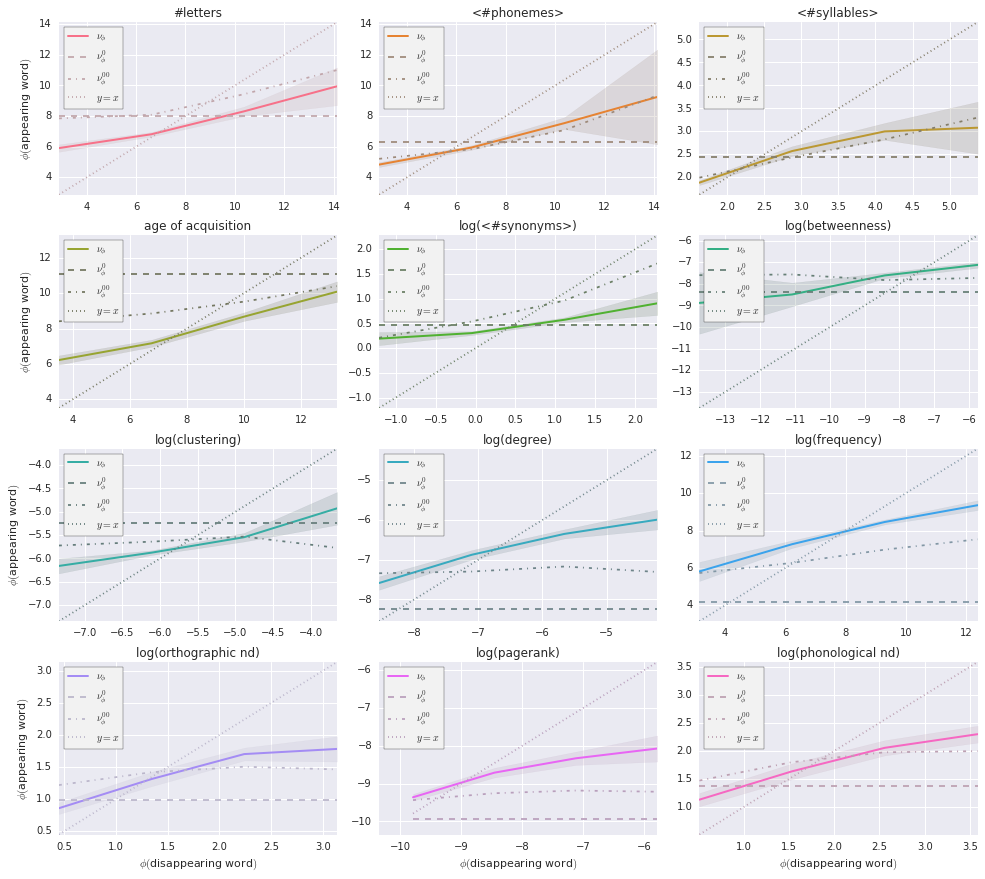

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

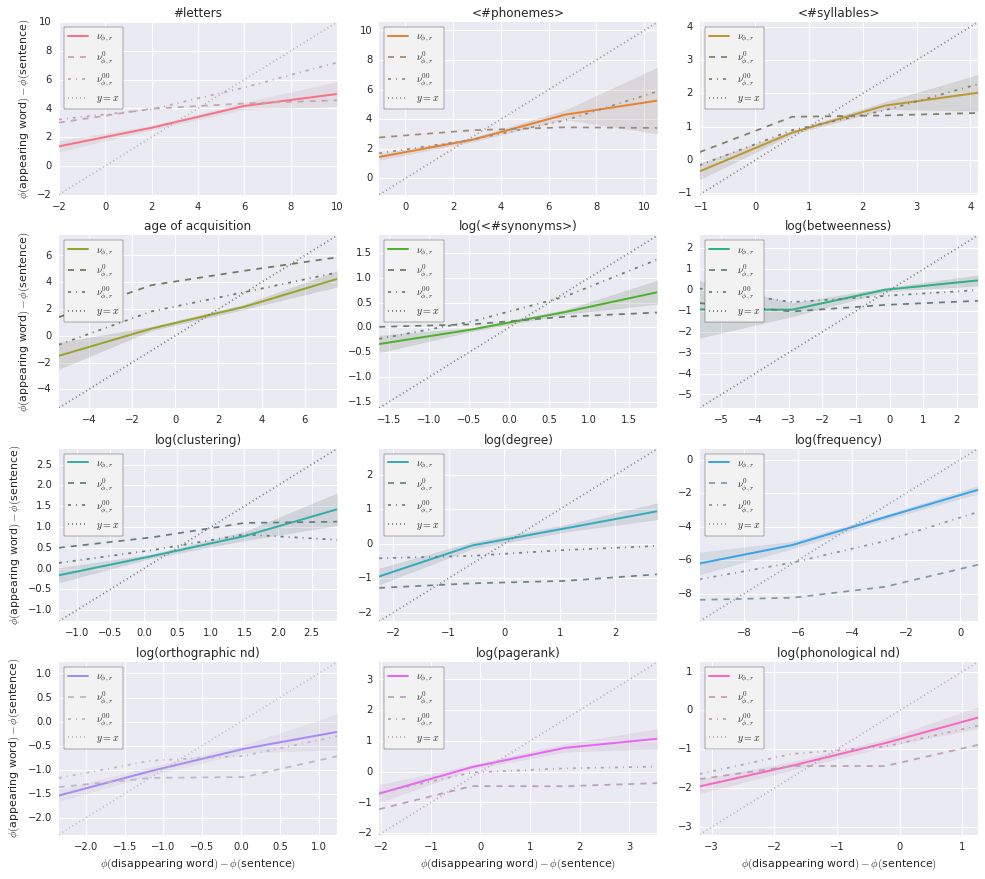

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

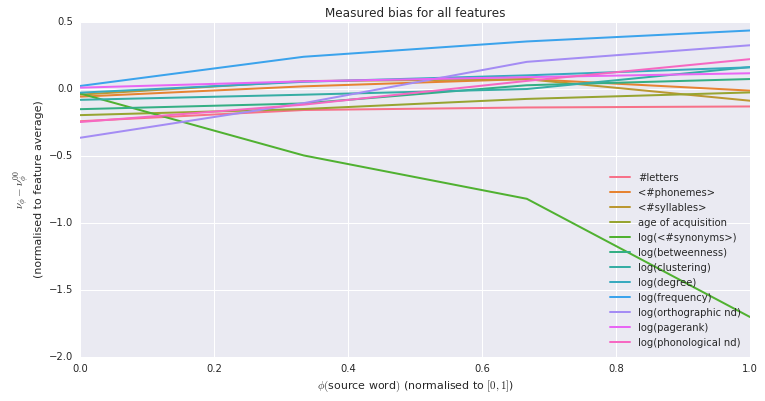

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

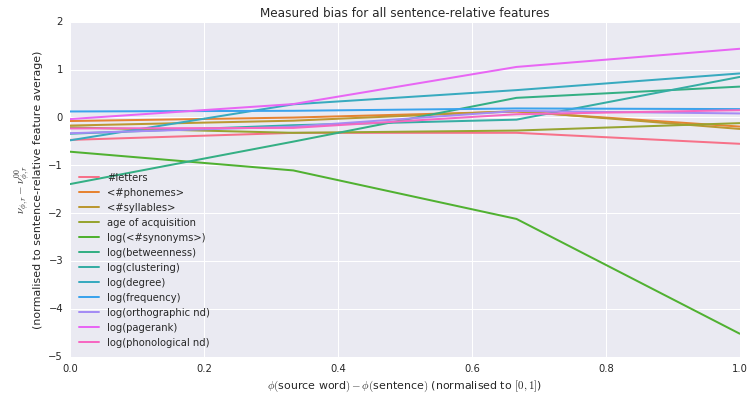

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

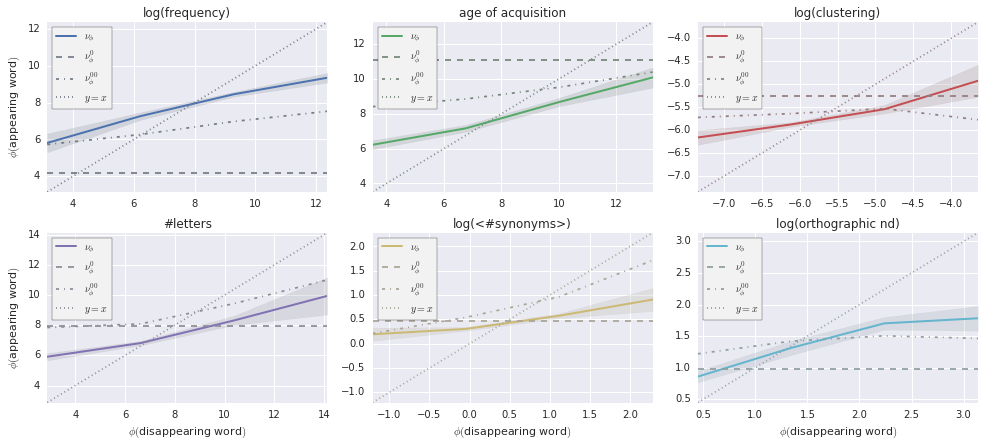

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

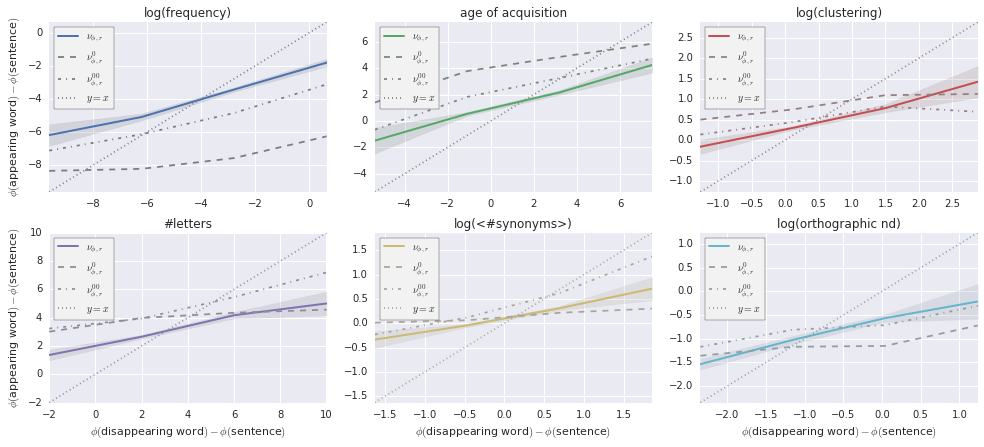

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

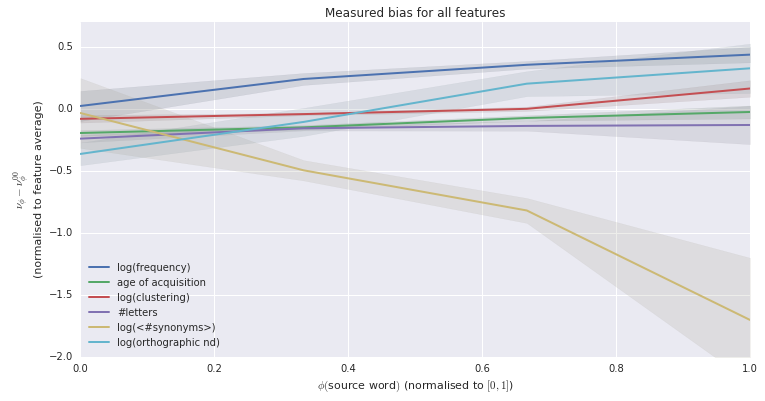

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

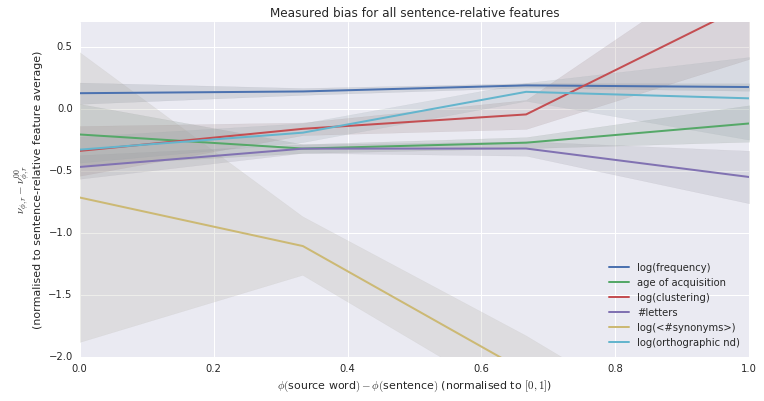

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


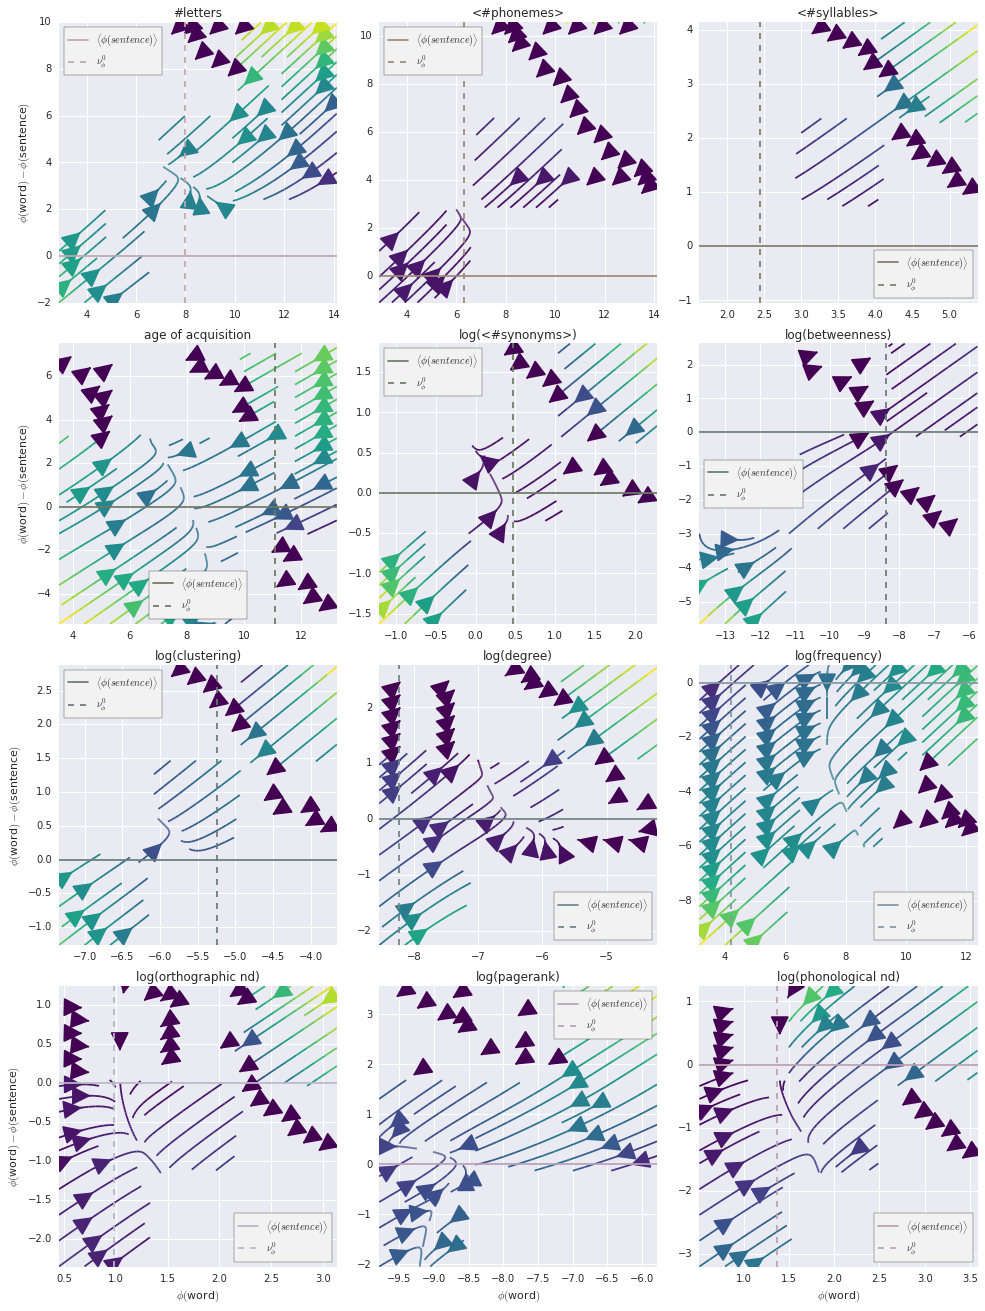

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


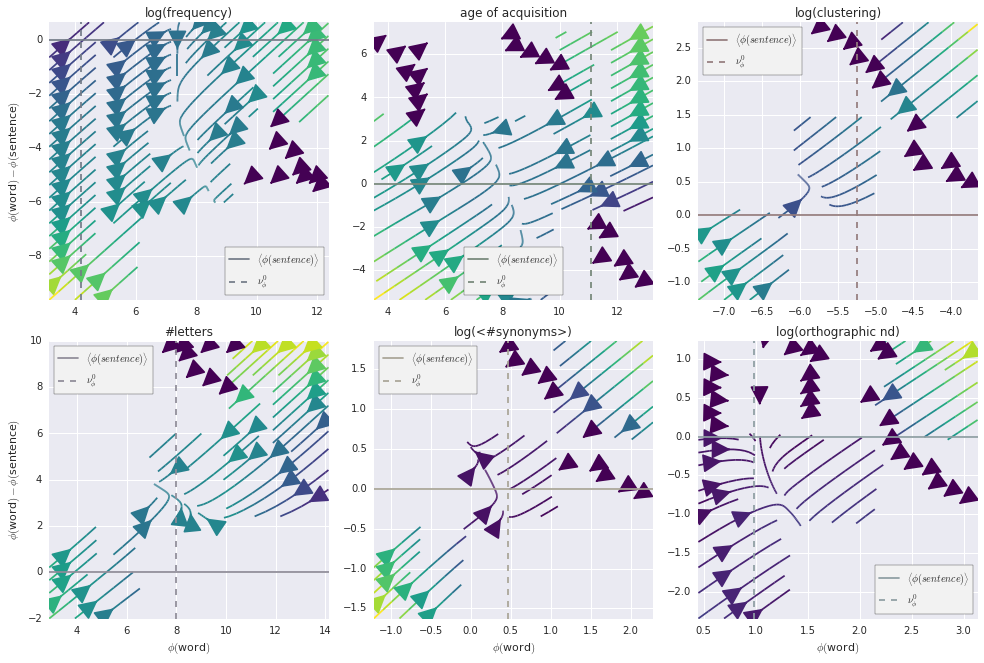

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.52349516  0.16843264  0.08728336  0.07408646  0.03606739  0.03050206
  0.02228638  0.01987686  0.01487155  0.01006043]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.474026,0.288275,-0.080349,0.240835,0.237038,-0.430956,0.205914,0.280612,-0.401058,0.278042,-0.162822,-0.004524
Component-1,-0.256970,0.425421,-0.142098,0.295323,0.299077,0.425135,-0.170137,0.289849,0.433819,-0.218640,0.161406,-0.019377
Component-2,0.774366,0.273921,-0.121174,0.082177,0.509977,-0.168262,-0.009193,0.039664,-0.078641,0.074919,-0.020824,-0.040143


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 65706) |          | Elapsed Time: 0:00:37 ETA:  28 days, 21:28:25

  0% (  119 of 65706) |                    | Elapsed Time: 0:00:39 ETA:  0:08:40

  0% (  237 of 65706) |                    | Elapsed Time: 0:00:40 ETA:  0:08:38

  0% (  353 of 65706) |                    | Elapsed Time: 0:00:41 ETA:  0:08:41

  0% (  470 of 65706) |                    | Elapsed Time: 0:00:42 ETA:  0:08:41

  0% (  599 of 65706) |                    | Elapsed Time: 0:00:43 ETA:  0:08:28

  1% (  727 of 65706) |                    | Elapsed Time: 0:00:44 ETA:  0:08:20

  1% (  822 of 65706) |                    | Elapsed Time: 0:00:44 ETA:  0:08:16

  1% (  954 of 65706) |                    | Elapsed Time: 0:00:45 ETA:  0:08:09

  1% ( 1088 of 65706) |                    | Elapsed Time: 0:00:46 ETA:  0:08:03

  1% ( 1221 of 65706) |                    | Elapsed Time: 0:00:47 ETA:  0:07:54

  2% ( 1353 of 65706) |                    | Elapsed Time: 0:00:48 ETA:  0:07:47

  2% ( 1504 of 65706) |                    | Elapsed Time: 0:00:49 ETA:  0:07:30

  2% ( 1643 of 65706) |                    | Elapsed Time: 0:00:50 ETA:  0:07:13

  2% ( 1793 of 65706) |                    | Elapsed Time: 0:00:51 ETA:  0:07:03

  2% ( 1878 of 65706) |                    | Elapsed Time: 0:00:52 ETA:  0:07:21

  2% ( 1940 of 65706) |                    | Elapsed Time: 0:00:53 ETA:  0:07:50

  3% ( 2002 of 65706) |                    | Elapsed Time: 0:00:54 ETA:  0:08:25

  3% ( 2064 of 65706) |                    | Elapsed Time: 0:00:55 ETA:  0:09:05

  3% ( 2133 of 65706) |                    | Elapsed Time: 0:00:56 ETA:  0:09:47

  3% ( 2196 of 65706) |                    | Elapsed Time: 0:00:57 ETA:  0:10:40

  3% ( 2258 of 65706) |                    | Elapsed Time: 0:00:58 ETA:  0:12:01

  3% ( 2320 of 65706) |                    | Elapsed Time: 0:00:59 ETA:  0:13:41

  3% ( 2382 of 65706) |                    | Elapsed Time: 0:01:00 ETA:  0:15:52

  3% ( 2445 of 65706) |                    | Elapsed Time: 0:01:01 ETA:  0:16:30

  3% ( 2464 of 65706) |                    | Elapsed Time: 0:01:02 ETA:  0:16:27

  3% ( 2533 of 65706) |                    | Elapsed Time: 0:01:03 ETA:  0:16:13

  4% ( 2657 of 65706) |                    | Elapsed Time: 0:01:04 ETA:  0:14:24

  4% ( 2788 of 65706) |                    | Elapsed Time: 0:01:05 ETA:  0:12:54

  4% ( 2915 of 65706) |                    | Elapsed Time: 0:01:06 ETA:  0:11:38

  4% ( 3042 of 65706) |                    | Elapsed Time: 0:01:07 ETA:  0:10:34

  4% ( 3184 of 65706) |                    | Elapsed Time: 0:01:08 ETA:  0:09:27

  5% ( 3286 of 65706) |#                   | Elapsed Time: 0:01:08 ETA:  0:08:31

  5% ( 3450 of 65706) |#                   | Elapsed Time: 0:01:09 ETA:  0:07:31

  5% ( 3617 of 65706) |#                   | Elapsed Time: 0:01:10 ETA:  0:07:02

  5% ( 3789 of 65706) |#                   | Elapsed Time: 0:01:11 ETA:  0:06:20

  6% ( 3964 of 65706) |#                   | Elapsed Time: 0:01:12 ETA:  0:06:02

  6% ( 4107 of 65706) |#                   | Elapsed Time: 0:01:13 ETA:  0:05:50

  6% ( 4238 of 65706) |#                   | Elapsed Time: 0:01:14 ETA:  0:05:47

  6% ( 4374 of 65706) |#                   | Elapsed Time: 0:01:15 ETA:  0:05:43

  6% ( 4506 of 65706) |#                   | Elapsed Time: 0:01:16 ETA:  0:05:45

  7% ( 4640 of 65706) |#                   | Elapsed Time: 0:01:17 ETA:  0:05:53

  7% ( 4754 of 65706) |#                   | Elapsed Time: 0:01:18 ETA:  0:06:09

  7% ( 4886 of 65706) |#                   | Elapsed Time: 0:01:19 ETA:  0:06:20

  7% ( 4928 of 65706) |#                   | Elapsed Time: 0:01:19 ETA:  0:06:33

  7% ( 5005 of 65706) |#                   | Elapsed Time: 0:01:20 ETA:  0:07:17

  7% ( 5080 of 65706) |#                   | Elapsed Time: 0:01:21 ETA:  0:08:02

  7% ( 5184 of 65706) |#                   | Elapsed Time: 0:01:22 ETA:  0:08:17

  8% ( 5305 of 65706) |#                   | Elapsed Time: 0:01:23 ETA:  0:08:25

  8% ( 5478 of 65706) |#                   | Elapsed Time: 0:01:24 ETA:  0:08:00

  8% ( 5621 of 65706) |#                   | Elapsed Time: 0:01:25 ETA:  0:07:54

  8% ( 5712 of 65706) |#                   | Elapsed Time: 0:01:26 ETA:  0:08:07

  8% ( 5750 of 65706) |#                   | Elapsed Time: 0:01:27 ETA:  0:08:24

  8% ( 5841 of 65706) |#                   | Elapsed Time: 0:01:28 ETA:  0:08:40

  9% ( 5934 of 65706) |#                   | Elapsed Time: 0:01:29 ETA:  0:08:29

  9% ( 6025 of 65706) |#                   | Elapsed Time: 0:01:30 ETA:  0:08:18

  9% ( 6152 of 65706) |#                   | Elapsed Time: 0:01:31 ETA:  0:08:02

  9% ( 6299 of 65706) |#                   | Elapsed Time: 0:01:32 ETA:  0:07:46

  9% ( 6436 of 65706) |#                   | Elapsed Time: 0:01:33 ETA:  0:08:06

 10% ( 6571 of 65706) |##                  | Elapsed Time: 0:01:34 ETA:  0:07:56

 10% ( 6669 of 65706) |##                  | Elapsed Time: 0:01:35 ETA:  0:07:59

 10% ( 6768 of 65706) |##                  | Elapsed Time: 0:01:36 ETA:  0:07:54

 10% ( 6874 of 65706) |##                  | Elapsed Time: 0:01:37 ETA:  0:07:45

 10% ( 6974 of 65706) |##                  | Elapsed Time: 0:01:38 ETA:  0:07:38

 10% ( 7077 of 65706) |##                  | Elapsed Time: 0:01:39 ETA:  0:07:52

 10% ( 7181 of 65706) |##                  | Elapsed Time: 0:01:40 ETA:  0:08:19

 11% ( 7284 of 65706) |##                  | Elapsed Time: 0:01:41 ETA:  0:08:42

 11% ( 7392 of 65706) |##                  | Elapsed Time: 0:01:42 ETA:  0:09:06

 11% ( 7494 of 65706) |##                  | Elapsed Time: 0:01:43 ETA:  0:09:02

 11% ( 7594 of 65706) |##                  | Elapsed Time: 0:01:44 ETA:  0:09:00

 11% ( 7695 of 65706) |##                  | Elapsed Time: 0:01:45 ETA:  0:09:03

 11% ( 7800 of 65706) |##                  | Elapsed Time: 0:01:46 ETA:  0:08:58

 12% ( 7900 of 65706) |##                  | Elapsed Time: 0:01:47 ETA:  0:09:00

 12% ( 8001 of 65706) |##                  | Elapsed Time: 0:01:48 ETA:  0:09:01

 12% ( 8099 of 65706) |##                  | Elapsed Time: 0:01:49 ETA:  0:09:05

 12% ( 8214 of 65706) |##                  | Elapsed Time: 0:01:50 ETA:  0:09:04

 12% ( 8312 of 65706) |##                  | Elapsed Time: 0:01:51 ETA:  0:09:06

 12% ( 8410 of 65706) |##                  | Elapsed Time: 0:01:52 ETA:  0:09:07

 12% ( 8532 of 65706) |##                  | Elapsed Time: 0:01:53 ETA:  0:08:49

 13% ( 8648 of 65706) |##                  | Elapsed Time: 0:01:54 ETA:  0:08:40

 13% ( 8764 of 65706) |##                  | Elapsed Time: 0:01:55 ETA:  0:08:26

 13% ( 8892 of 65706) |##                  | Elapsed Time: 0:01:56 ETA:  0:08:06

 13% ( 9035 of 65706) |##                  | Elapsed Time: 0:01:57 ETA:  0:07:36

 13% ( 9176 of 65706) |##                  | Elapsed Time: 0:01:58 ETA:  0:07:18

 14% ( 9306 of 65706) |##                  | Elapsed Time: 0:01:59 ETA:  0:06:58

 14% ( 9432 of 65706) |##                  | Elapsed Time: 0:02:00 ETA:  0:06:43

 14% ( 9549 of 65706) |##                  | Elapsed Time: 0:02:01 ETA:  0:06:45

 14% ( 9672 of 65706) |##                  | Elapsed Time: 0:02:02 ETA:  0:06:40

 14% ( 9811 of 65706) |##                  | Elapsed Time: 0:02:03 ETA:  0:06:28

 15% ( 9856 of 65706) |###                 | Elapsed Time: 0:02:04 ETA:  0:06:25

 15% ( 9996 of 65706) |###                 | Elapsed Time: 0:02:05 ETA:  0:06:18

 15% (10135 of 65706) |###                 | Elapsed Time: 0:02:06 ETA:  0:06:13

 15% (10288 of 65706) |###                 | Elapsed Time: 0:02:07 ETA:  0:06:06

 15% (10442 of 65706) |###                 | Elapsed Time: 0:02:08 ETA:  0:05:55

 16% (10590 of 65706) |###                 | Elapsed Time: 0:02:09 ETA:  0:05:44

 16% (10678 of 65706) |###                 | Elapsed Time: 0:02:09 ETA:  0:05:33

 16% (10825 of 65706) |###                 | Elapsed Time: 0:02:10 ETA:  0:05:22

 16% (10939 of 65706) |###                 | Elapsed Time: 0:02:11 ETA:  0:05:31

 16% (11040 of 65706) |###                 | Elapsed Time: 0:02:12 ETA:  0:05:46

 16% (11148 of 65706) |###                 | Elapsed Time: 0:02:13 ETA:  0:05:58

 17% (11249 of 65706) |###                 | Elapsed Time: 0:02:14 ETA:  0:06:15

 17% (11351 of 65706) |###                 | Elapsed Time: 0:02:15 ETA:  0:06:39

 17% (11463 of 65706) |###                 | Elapsed Time: 0:02:16 ETA:  0:07:01

 17% (11499 of 65706) |###                 | Elapsed Time: 0:02:17 ETA:  0:07:20

 17% (11615 of 65706) |###                 | Elapsed Time: 0:02:18 ETA:  0:07:30

 17% (11712 of 65706) |###                 | Elapsed Time: 0:02:19 ETA:  0:08:02

 17% (11826 of 65706) |###                 | Elapsed Time: 0:02:20 ETA:  0:08:01

 18% (11946 of 65706) |###                 | Elapsed Time: 0:02:21 ETA:  0:07:47

 18% (12064 of 65706) |###                 | Elapsed Time: 0:02:22 ETA:  0:07:40

 18% (12183 of 65706) |###                 | Elapsed Time: 0:02:23 ETA:  0:07:27

 18% (12320 of 65706) |###                 | Elapsed Time: 0:02:24 ETA:  0:07:10

 18% (12438 of 65706) |###                 | Elapsed Time: 0:02:25 ETA:  0:07:07

 19% (12560 of 65706) |###                 | Elapsed Time: 0:02:26 ETA:  0:07:02

 19% (12689 of 65706) |###                 | Elapsed Time: 0:02:27 ETA:  0:06:42

 19% (12691 of 65706) |###                 | Elapsed Time: 0:02:33 ETA:  0:14:42

 19% (12804 of 65706) |###                 | Elapsed Time: 0:02:34 ETA:  0:14:50

 19% (12914 of 65706) |###                 | Elapsed Time: 0:02:35 ETA:  0:14:57

 19% (13000 of 65706) |###                 | Elapsed Time: 0:02:36 ETA:  0:15:39

 19% (13083 of 65706) |###                 | Elapsed Time: 0:02:37 ETA:  0:16:33

 20% (13142 of 65706) |####                | Elapsed Time: 0:02:38 ETA:  0:16:08

 20% (13243 of 65706) |####                | Elapsed Time: 0:02:39 ETA:  0:16:30

 20% (13320 of 65706) |####                | Elapsed Time: 0:02:40 ETA:  0:17:37

 20% (13373 of 65706) |####                | Elapsed Time: 0:02:41 ETA:  0:19:52

 20% (13439 of 65706) |####                | Elapsed Time: 0:02:42 ETA:  0:09:56

 20% (13516 of 65706) |####                | Elapsed Time: 0:02:43 ETA:  0:10:33

 20% (13630 of 65706) |####                | Elapsed Time: 0:02:44 ETA:  0:10:28

 20% (13743 of 65706) |####                | Elapsed Time: 0:02:45 ETA:  0:09:58

 21% (13857 of 65706) |####                | Elapsed Time: 0:02:46 ETA:  0:09:27

 21% (13963 of 65706) |####                | Elapsed Time: 0:02:47 ETA:  0:09:12

 21% (14077 of 65706) |####                | Elapsed Time: 0:02:48 ETA:  0:09:00

 21% (14182 of 65706) |####                | Elapsed Time: 0:02:49 ETA:  0:08:36

 21% (14275 of 65706) |####                | Elapsed Time: 0:02:50 ETA:  0:08:04

 21% (14424 of 65706) |####                | Elapsed Time: 0:02:51 ETA:  0:07:07

 22% (14563 of 65706) |####                | Elapsed Time: 0:02:52 ETA:  0:06:31

 22% (14705 of 65706) |####                | Elapsed Time: 0:02:53 ETA:  0:06:15

 22% (14784 of 65706) |####                | Elapsed Time: 0:02:54 ETA:  0:06:01

 22% (14944 of 65706) |####                | Elapsed Time: 0:02:55 ETA:  0:05:38

 22% (15097 of 65706) |####                | Elapsed Time: 0:02:56 ETA:  0:05:19

 23% (15197 of 65706) |####                | Elapsed Time: 0:02:57 ETA:  0:05:24

 23% (15286 of 65706) |####                | Elapsed Time: 0:02:58 ETA:  0:05:31

 23% (15376 of 65706) |####                | Elapsed Time: 0:02:59 ETA:  0:05:31

 23% (15473 of 65706) |####                | Elapsed Time: 0:03:00 ETA:  0:05:55

 23% (15606 of 65706) |####                | Elapsed Time: 0:03:01 ETA:  0:05:56

 23% (15738 of 65706) |####                | Elapsed Time: 0:03:02 ETA:  0:06:00

 24% (15868 of 65706) |####                | Elapsed Time: 0:03:03 ETA:  0:06:03

 24% (16004 of 65706) |####                | Elapsed Time: 0:03:04 ETA:  0:06:15

 24% (16140 of 65706) |####                | Elapsed Time: 0:03:05 ETA:  0:06:23

 24% (16273 of 65706) |####                | Elapsed Time: 0:03:06 ETA:  0:06:05

 24% (16391 of 65706) |####                | Elapsed Time: 0:03:07 ETA:  0:05:49

 25% (16427 of 65706) |#####               | Elapsed Time: 0:03:07 ETA:  0:05:36

 25% (16528 of 65706) |#####               | Elapsed Time: 0:03:08 ETA:  0:05:33

 25% (16686 of 65706) |#####               | Elapsed Time: 0:03:09 ETA:  0:05:21

 25% (16843 of 65706) |#####               | Elapsed Time: 0:03:10 ETA:  0:05:09

 25% (16996 of 65706) |#####               | Elapsed Time: 0:03:11 ETA:  0:04:57

 26% (17153 of 65706) |#####               | Elapsed Time: 0:03:12 ETA:  0:04:47

 26% (17248 of 65706) |#####               | Elapsed Time: 0:03:13 ETA:  0:05:06

 26% (17357 of 65706) |#####               | Elapsed Time: 0:03:14 ETA:  0:05:10

 26% (17466 of 65706) |#####               | Elapsed Time: 0:03:15 ETA:  0:05:14

 26% (17570 of 65706) |#####               | Elapsed Time: 0:03:16 ETA:  0:05:11

 26% (17710 of 65706) |#####               | Elapsed Time: 0:03:17 ETA:  0:05:19

 27% (17862 of 65706) |#####               | Elapsed Time: 0:03:18 ETA:  0:05:21

 27% (17984 of 65706) |#####               | Elapsed Time: 0:03:19 ETA:  0:05:37

 27% (18070 of 65706) |#####               | Elapsed Time: 0:03:20 ETA:  0:05:56

 27% (18217 of 65706) |#####               | Elapsed Time: 0:03:21 ETA:  0:05:23

 27% (18369 of 65706) |#####               | Elapsed Time: 0:03:22 ETA:  0:05:10

 28% (18502 of 65706) |#####               | Elapsed Time: 0:03:23 ETA:  0:04:58

 28% (18670 of 65706) |#####               | Elapsed Time: 0:03:24 ETA:  0:04:32

 28% (18836 of 65706) |#####               | Elapsed Time: 0:03:25 ETA:  0:04:08

 28% (18891 of 65706) |#####               | Elapsed Time: 0:03:25 ETA:  0:04:02

 29% (19059 of 65706) |#####               | Elapsed Time: 0:03:26 ETA:  0:03:55

 29% (19214 of 65706) |#####               | Elapsed Time: 0:03:27 ETA:  0:03:42

 29% (19377 of 65706) |#####               | Elapsed Time: 0:03:28 ETA:  0:03:31

 29% (19526 of 65706) |#####               | Elapsed Time: 0:03:29 ETA:  0:03:30

 29% (19644 of 65706) |#####               | Elapsed Time: 0:03:30 ETA:  0:03:40

 30% (19712 of 65706) |######              | Elapsed Time: 0:03:31 ETA:  0:03:41

 30% (19845 of 65706) |######              | Elapsed Time: 0:03:32 ETA:  0:03:53

 30% (19991 of 65706) |######              | Elapsed Time: 0:03:33 ETA:  0:03:59

 30% (20150 of 65706) |######              | Elapsed Time: 0:03:34 ETA:  0:03:56

 30% (20294 of 65706) |######              | Elapsed Time: 0:03:35 ETA:  0:04:04

 31% (20428 of 65706) |######              | Elapsed Time: 0:03:36 ETA:  0:04:11

 31% (20534 of 65706) |######              | Elapsed Time: 0:03:37 ETA:  0:04:31

 31% (20675 of 65706) |######              | Elapsed Time: 0:03:38 ETA:  0:04:34

 31% (20840 of 65706) |######              | Elapsed Time: 0:03:39 ETA:  0:04:13

 31% (21005 of 65706) |######              | Elapsed Time: 0:03:40 ETA:  0:03:57

 32% (21153 of 65706) |######              | Elapsed Time: 0:03:41 ETA:  0:03:51

 32% (21263 of 65706) |######              | Elapsed Time: 0:03:42 ETA:  0:04:03

 32% (21339 of 65706) |######              | Elapsed Time: 0:03:43 ETA:  0:04:34

 32% (21355 of 65706) |######              | Elapsed Time: 0:03:43 ETA:  0:04:45

 32% (21449 of 65706) |######              | Elapsed Time: 0:03:44 ETA:  0:05:04

 32% (21566 of 65706) |######              | Elapsed Time: 0:03:45 ETA:  0:05:00

 33% (21694 of 65706) |######              | Elapsed Time: 0:03:46 ETA:  0:05:06

 33% (21790 of 65706) |######              | Elapsed Time: 0:03:47 ETA:  0:05:44

 33% (21895 of 65706) |######              | Elapsed Time: 0:03:48 ETA:  0:06:21

 33% (22022 of 65706) |######              | Elapsed Time: 0:03:49 ETA:  0:06:35

 33% (22176 of 65706) |######              | Elapsed Time: 0:03:50 ETA:  0:05:50

 33% (22328 of 65706) |######              | Elapsed Time: 0:03:51 ETA:  0:05:20

 34% (22466 of 65706) |######              | Elapsed Time: 0:03:52 ETA:  0:04:56

 34% (22579 of 65706) |######              | Elapsed Time: 0:03:53 ETA:  0:04:57

 34% (22675 of 65706) |######              | Elapsed Time: 0:03:54 ETA:  0:05:12

 34% (22835 of 65706) |######              | Elapsed Time: 0:03:55 ETA:  0:04:38

 34% (22981 of 65706) |######              | Elapsed Time: 0:03:56 ETA:  0:04:18

 35% (22998 of 65706) |#######             | Elapsed Time: 0:03:56 ETA:  0:04:23

 35% (23096 of 65706) |#######             | Elapsed Time: 0:03:57 ETA:  0:04:40

 35% (23216 of 65706) |#######             | Elapsed Time: 0:03:58 ETA:  0:04:45

 35% (23271 of 65706) |#######             | Elapsed Time: 0:03:59 ETA:  0:05:38

 35% (23376 of 65706) |#######             | Elapsed Time: 0:04:00 ETA:  0:05:58

 35% (23511 of 65706) |#######             | Elapsed Time: 0:04:01 ETA:  0:05:42

 35% (23609 of 65706) |#######             | Elapsed Time: 0:04:02 ETA:  0:05:40

 36% (23721 of 65706) |#######             | Elapsed Time: 0:04:03 ETA:  0:06:11

 36% (23819 of 65706) |#######             | Elapsed Time: 0:04:04 ETA:  0:06:25

 36% (23975 of 65706) |#######             | Elapsed Time: 0:04:05 ETA:  0:05:45

 36% (24097 of 65706) |#######             | Elapsed Time: 0:04:06 ETA:  0:05:30

 36% (24252 of 65706) |#######             | Elapsed Time: 0:04:07 ETA:  0:05:09

 37% (24390 of 65706) |#######             | Elapsed Time: 0:04:08 ETA:  0:04:26

 37% (24529 of 65706) |#######             | Elapsed Time: 0:04:09 ETA:  0:04:10

 37% (24640 of 65706) |#######             | Elapsed Time: 0:04:10 ETA:  0:04:05

 37% (24748 of 65706) |#######             | Elapsed Time: 0:04:11 ETA:  0:04:06

 37% (24855 of 65706) |#######             | Elapsed Time: 0:04:12 ETA:  0:04:17

 37% (24966 of 65706) |#######             | Elapsed Time: 0:04:13 ETA:  0:04:39

 38% (25095 of 65706) |#######             | Elapsed Time: 0:04:14 ETA:  0:04:35

 38% (25229 of 65706) |#######             | Elapsed Time: 0:04:15 ETA:  0:04:45

 38% (25368 of 65706) |#######             | Elapsed Time: 0:04:16 ETA:  0:04:43

 38% (25462 of 65706) |#######             | Elapsed Time: 0:04:17 ETA:  0:04:39

 38% (25558 of 65706) |#######             | Elapsed Time: 0:04:18 ETA:  0:04:46

 39% (25639 of 65706) |#######             | Elapsed Time: 0:04:19 ETA:  0:05:06

 39% (25773 of 65706) |#######             | Elapsed Time: 0:04:20 ETA:  0:04:51

 39% (25870 of 65706) |#######             | Elapsed Time: 0:04:21 ETA:  0:04:55

 39% (25992 of 65706) |#######             | Elapsed Time: 0:04:22 ETA:  0:04:48

 39% (26149 of 65706) |#######             | Elapsed Time: 0:04:23 ETA:  0:04:33

 40% (26283 of 65706) |########            | Elapsed Time: 0:04:24 ETA:  0:04:24

 40% (26421 of 65706) |########            | Elapsed Time: 0:04:25 ETA:  0:04:24

 40% (26539 of 65706) |########            | Elapsed Time: 0:04:26 ETA:  0:04:37

 40% (26676 of 65706) |########            | Elapsed Time: 0:04:27 ETA:  0:04:16

 40% (26804 of 65706) |########            | Elapsed Time: 0:04:28 ETA:  0:03:54

 40% (26896 of 65706) |########            | Elapsed Time: 0:04:29 ETA:  0:04:12

 41% (27019 of 65706) |########            | Elapsed Time: 0:04:30 ETA:  0:03:59

 41% (27104 of 65706) |########            | Elapsed Time: 0:04:30 ETA:  0:03:57

 41% (27249 of 65706) |########            | Elapsed Time: 0:04:31 ETA:  0:04:01

 41% (27391 of 65706) |########            | Elapsed Time: 0:04:32 ETA:  0:04:04

 41% (27527 of 65706) |########            | Elapsed Time: 0:04:33 ETA:  0:04:04

 42% (27672 of 65706) |########            | Elapsed Time: 0:04:35 ETA:  0:03:50

 42% (27796 of 65706) |########            | Elapsed Time: 0:04:36 ETA:  0:03:55

 42% (27926 of 65706) |########            | Elapsed Time: 0:04:37 ETA:  0:03:53

 42% (28064 of 65706) |########            | Elapsed Time: 0:04:38 ETA:  0:03:31

 42% (28210 of 65706) |########            | Elapsed Time: 0:04:39 ETA:  0:03:21

 43% (28318 of 65706) |########            | Elapsed Time: 0:04:40 ETA:  0:03:28

 43% (28428 of 65706) |########            | Elapsed Time: 0:04:41 ETA:  0:03:42

 43% (28570 of 65706) |########            | Elapsed Time: 0:04:42 ETA:  0:03:41

 43% (28708 of 65706) |########            | Elapsed Time: 0:04:43 ETA:  0:03:39

 43% (28747 of 65706) |########            | Elapsed Time: 0:04:43 ETA:  0:03:55

 43% (28875 of 65706) |########            | Elapsed Time: 0:04:44 ETA:  0:03:52

 44% (28999 of 65706) |########            | Elapsed Time: 0:04:45 ETA:  0:03:54

 44% (29122 of 65706) |########            | Elapsed Time: 0:04:46 ETA:  0:04:01

 44% (29240 of 65706) |########            | Elapsed Time: 0:04:47 ETA:  0:04:14

 44% (29384 of 65706) |########            | Elapsed Time: 0:04:48 ETA:  0:03:54

 44% (29531 of 65706) |########            | Elapsed Time: 0:04:49 ETA:  0:03:36

 45% (29568 of 65706) |#########           | Elapsed Time: 0:04:49 ETA:  0:03:39

 45% (29672 of 65706) |#########           | Elapsed Time: 0:04:50 ETA:  0:03:56

 45% (29803 of 65706) |#########           | Elapsed Time: 0:04:51 ETA:  0:03:43

 45% (29933 of 65706) |#########           | Elapsed Time: 0:04:52 ETA:  0:03:41

 45% (30037 of 65706) |#########           | Elapsed Time: 0:04:53 ETA:  0:03:50

 45% (30143 of 65706) |#########           | Elapsed Time: 0:04:54 ETA:  0:03:58

 46% (30260 of 65706) |#########           | Elapsed Time: 0:04:55 ETA:  0:03:57

 46% (30390 of 65706) |#########           | Elapsed Time: 0:04:56 ETA:  0:04:22

 46% (30529 of 65706) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:13

 46% (30669 of 65706) |#########           | Elapsed Time: 0:04:58 ETA:  0:03:52

 46% (30785 of 65706) |#########           | Elapsed Time: 0:04:59 ETA:  0:03:59

 46% (30877 of 65706) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:20

 47% (31033 of 65706) |#########           | Elapsed Time: 0:05:01 ETA:  0:03:50

 47% (31152 of 65706) |#########           | Elapsed Time: 0:05:02 ETA:  0:03:42

 47% (31211 of 65706) |#########           | Elapsed Time: 0:05:03 ETA:  0:03:39

 47% (31330 of 65706) |#########           | Elapsed Time: 0:05:04 ETA:  0:03:41

 47% (31464 of 65706) |#########           | Elapsed Time: 0:05:05 ETA:  0:03:36

 48% (31611 of 65706) |#########           | Elapsed Time: 0:05:06 ETA:  0:03:32

 48% (31757 of 65706) |#########           | Elapsed Time: 0:05:07 ETA:  0:03:28

 48% (31905 of 65706) |#########           | Elapsed Time: 0:05:08 ETA:  0:03:12

 48% (32032 of 65706) |#########           | Elapsed Time: 0:05:09 ETA:  0:02:45

 48% (32149 of 65706) |#########           | Elapsed Time: 0:05:10 ETA:  0:03:00

 49% (32250 of 65706) |#########           | Elapsed Time: 0:05:11 ETA:  0:03:07

 49% (32329 of 65706) |#########           | Elapsed Time: 0:05:12 ETA:  0:03:27

 49% (32454 of 65706) |#########           | Elapsed Time: 0:05:13 ETA:  0:03:24

 49% (32590 of 65706) |#########           | Elapsed Time: 0:05:14 ETA:  0:03:22

 49% (32748 of 65706) |#########           | Elapsed Time: 0:05:15 ETA:  0:03:16

 50% (32854 of 65706) |##########          | Elapsed Time: 0:05:15 ETA:  0:03:14

 50% (33010 of 65706) |##########          | Elapsed Time: 0:05:16 ETA:  0:03:09

 50% (33149 of 65706) |##########          | Elapsed Time: 0:05:17 ETA:  0:03:14

 50% (33271 of 65706) |##########          | Elapsed Time: 0:05:18 ETA:  0:03:11

 50% (33331 of 65706) |##########          | Elapsed Time: 0:05:19 ETA:  0:03:30

 50% (33418 of 65706) |##########          | Elapsed Time: 0:05:20 ETA:  0:03:25

 51% (33527 of 65706) |##########          | Elapsed Time: 0:05:21 ETA:  0:03:32

 51% (33634 of 65706) |##########          | Elapsed Time: 0:05:22 ETA:  0:03:45

 51% (33675 of 65706) |##########          | Elapsed Time: 0:05:23 ETA:  0:04:10

 51% (33789 of 65706) |##########          | Elapsed Time: 0:05:24 ETA:  0:04:27

 51% (33909 of 65706) |##########          | Elapsed Time: 0:05:25 ETA:  0:04:50

 51% (34023 of 65706) |##########          | Elapsed Time: 0:05:26 ETA:  0:05:08

 51% (34151 of 65706) |##########          | Elapsed Time: 0:05:27 ETA:  0:05:03

 52% (34296 of 65706) |##########          | Elapsed Time: 0:05:28 ETA:  0:04:05

 52% (34459 of 65706) |##########          | Elapsed Time: 0:05:29 ETA:  0:03:22

 52% (34496 of 65706) |##########          | Elapsed Time: 0:05:29 ETA:  0:03:09

 52% (34618 of 65706) |##########          | Elapsed Time: 0:05:30 ETA:  0:03:00

 52% (34727 of 65706) |##########          | Elapsed Time: 0:05:31 ETA:  0:03:05

 53% (34837 of 65706) |##########          | Elapsed Time: 0:05:32 ETA:  0:03:06

 53% (34948 of 65706) |##########          | Elapsed Time: 0:05:33 ETA:  0:03:09

 53% (35085 of 65706) |##########          | Elapsed Time: 0:05:34 ETA:  0:02:56

 53% (35227 of 65706) |##########          | Elapsed Time: 0:05:35 ETA:  0:02:48

 53% (35317 of 65706) |##########          | Elapsed Time: 0:05:36 ETA:  0:02:54

 53% (35463 of 65706) |##########          | Elapsed Time: 0:05:37 ETA:  0:03:01

 54% (35602 of 65706) |##########          | Elapsed Time: 0:05:38 ETA:  0:02:59

 54% (35740 of 65706) |##########          | Elapsed Time: 0:05:39 ETA:  0:02:51

 54% (35866 of 65706) |##########          | Elapsed Time: 0:05:40 ETA:  0:02:42

 54% (36004 of 65706) |##########          | Elapsed Time: 0:05:41 ETA:  0:02:29

 55% (36139 of 65706) |###########         | Elapsed Time: 0:05:42 ETA:  0:02:23

 55% (36298 of 65706) |###########         | Elapsed Time: 0:05:43 ETA:  0:02:14

 55% (36425 of 65706) |###########         | Elapsed Time: 0:05:44 ETA:  0:02:16

 55% (36587 of 65706) |###########         | Elapsed Time: 0:05:45 ETA:  0:02:09

 55% (36726 of 65706) |###########         | Elapsed Time: 0:05:46 ETA:  0:02:08

 56% (36867 of 65706) |###########         | Elapsed Time: 0:05:47 ETA:  0:02:05

 56% (36960 of 65706) |###########         | Elapsed Time: 0:05:48 ETA:  0:02:08

 56% (37081 of 65706) |###########         | Elapsed Time: 0:05:49 ETA:  0:02:15

 56% (37204 of 65706) |###########         | Elapsed Time: 0:05:50 ETA:  0:02:14

 56% (37305 of 65706) |###########         | Elapsed Time: 0:05:51 ETA:  0:02:28

 57% (37457 of 65706) |###########         | Elapsed Time: 0:05:52 ETA:  0:02:30

 57% (37584 of 65706) |###########         | Elapsed Time: 0:05:53 ETA:  0:02:29

 57% (37781 of 65706) |###########         | Elapsed Time: 0:05:54 ETA:  0:02:27

 57% (37925 of 65706) |###########         | Elapsed Time: 0:05:55 ETA:  0:02:24

 57% (38057 of 65706) |###########         | Elapsed Time: 0:05:56 ETA:  0:02:16

 58% (38182 of 65706) |###########         | Elapsed Time: 0:05:57 ETA:  0:02:13

 58% (38322 of 65706) |###########         | Elapsed Time: 0:05:58 ETA:  0:02:05

 58% (38486 of 65706) |###########         | Elapsed Time: 0:05:59 ETA:  0:01:38

 58% (38603 of 65706) |###########         | Elapsed Time: 0:06:00 ETA:  0:01:43

 58% (38745 of 65706) |###########         | Elapsed Time: 0:06:01 ETA:  0:01:35

 59% (38885 of 65706) |###########         | Elapsed Time: 0:06:02 ETA:  0:01:43

 59% (39019 of 65706) |###########         | Elapsed Time: 0:06:03 ETA:  0:01:48

 59% (39159 of 65706) |###########         | Elapsed Time: 0:06:04 ETA:  0:01:49

 59% (39276 of 65706) |###########         | Elapsed Time: 0:06:05 ETA:  0:01:53

 60% (39424 of 65706) |############        | Elapsed Time: 0:06:06 ETA:  0:01:47

 60% (39569 of 65706) |############        | Elapsed Time: 0:06:07 ETA:  0:01:54

 60% (39713 of 65706) |############        | Elapsed Time: 0:06:08 ETA:  0:01:50

 60% (39867 of 65706) |############        | Elapsed Time: 0:06:09 ETA:  0:01:44

 60% (39990 of 65706) |############        | Elapsed Time: 0:06:10 ETA:  0:01:50

 61% (40088 of 65706) |############        | Elapsed Time: 0:06:11 ETA:  0:02:06

 61% (40162 of 65706) |############        | Elapsed Time: 0:06:12 ETA:  0:02:38

 61% (40245 of 65706) |############        | Elapsed Time: 0:06:13 ETA:  0:03:18

 61% (40319 of 65706) |############        | Elapsed Time: 0:06:14 ETA:  0:03:46

 61% (40415 of 65706) |############        | Elapsed Time: 0:06:15 ETA:  0:04:20

 61% (40520 of 65706) |############        | Elapsed Time: 0:06:16 ETA:  0:04:50

 61% (40624 of 65706) |############        | Elapsed Time: 0:06:17 ETA:  0:05:33

 62% (40755 of 65706) |############        | Elapsed Time: 0:06:18 ETA:  0:05:25

 62% (40855 of 65706) |############        | Elapsed Time: 0:06:19 ETA:  0:05:21

 62% (40943 of 65706) |############        | Elapsed Time: 0:06:20 ETA:  0:05:07

 62% (41067 of 65706) |############        | Elapsed Time: 0:06:21 ETA:  0:04:16

 62% (41177 of 65706) |############        | Elapsed Time: 0:06:22 ETA:  0:04:08

 62% (41335 of 65706) |############        | Elapsed Time: 0:06:23 ETA:  0:03:14

 63% (41396 of 65706) |############        | Elapsed Time: 0:06:24 ETA:  0:03:34

 63% (41494 of 65706) |############        | Elapsed Time: 0:06:25 ETA:  0:03:37

 63% (41629 of 65706) |############        | Elapsed Time: 0:06:26 ETA:  0:03:18

 63% (41768 of 65706) |############        | Elapsed Time: 0:06:27 ETA:  0:03:12

 63% (41888 of 65706) |############        | Elapsed Time: 0:06:28 ETA:  0:02:48

 63% (42018 of 65706) |############        | Elapsed Time: 0:06:29 ETA:  0:02:25

 64% (42129 of 65706) |############        | Elapsed Time: 0:06:30 ETA:  0:02:38

 64% (42265 of 65706) |############        | Elapsed Time: 0:06:31 ETA:  0:02:23

 64% (42385 of 65706) |############        | Elapsed Time: 0:06:32 ETA:  0:02:42

 64% (42520 of 65706) |############        | Elapsed Time: 0:06:33 ETA:  0:02:04

 64% (42650 of 65706) |############        | Elapsed Time: 0:06:34 ETA:  0:01:49

 65% (42709 of 65706) |#############       | Elapsed Time: 0:06:34 ETA:  0:01:46

 65% (42864 of 65706) |#############       | Elapsed Time: 0:06:35 ETA:  0:01:38

 65% (43013 of 65706) |#############       | Elapsed Time: 0:06:36 ETA:  0:01:35

 65% (43135 of 65706) |#############       | Elapsed Time: 0:06:37 ETA:  0:01:37

 65% (43258 of 65706) |#############       | Elapsed Time: 0:06:38 ETA:  0:01:31

 66% (43384 of 65706) |#############       | Elapsed Time: 0:06:39 ETA:  0:01:34

 66% (43531 of 65706) |#############       | Elapsed Time: 0:06:40 ETA:  0:01:28

 66% (43638 of 65706) |#############       | Elapsed Time: 0:06:41 ETA:  0:01:38

 66% (43781 of 65706) |#############       | Elapsed Time: 0:06:42 ETA:  0:01:36

 66% (43948 of 65706) |#############       | Elapsed Time: 0:06:43 ETA:  0:01:30

 67% (44040 of 65706) |#############       | Elapsed Time: 0:06:44 ETA:  0:01:57

 67% (44145 of 65706) |#############       | Elapsed Time: 0:06:46 ETA:  0:02:05

 67% (44294 of 65706) |#############       | Elapsed Time: 0:06:47 ETA:  0:01:51

 67% (44352 of 65706) |#############       | Elapsed Time: 0:06:47 ETA:  0:01:40

 67% (44494 of 65706) |#############       | Elapsed Time: 0:06:48 ETA:  0:01:32

 67% (44649 of 65706) |#############       | Elapsed Time: 0:06:49 ETA:  0:01:22

 68% (44765 of 65706) |#############       | Elapsed Time: 0:06:50 ETA:  0:01:17

 68% (44907 of 65706) |#############       | Elapsed Time: 0:06:51 ETA:  0:01:17

 68% (45045 of 65706) |#############       | Elapsed Time: 0:06:52 ETA:  0:01:28

 68% (45173 of 65706) |#############       | Elapsed Time: 0:06:53 ETA:  0:00:57

 68% (45282 of 65706) |#############       | Elapsed Time: 0:06:54 ETA:  0:01:15

 69% (45403 of 65706) |#############       | Elapsed Time: 0:06:55 ETA:  0:01:27

 69% (45524 of 65706) |#############       | Elapsed Time: 0:06:56 ETA:  0:01:36

 69% (45675 of 65706) |#############       | Elapsed Time: 0:06:57 ETA:  0:01:37

 69% (45814 of 65706) |#############       | Elapsed Time: 0:06:58 ETA:  0:01:25

 69% (45937 of 65706) |#############       | Elapsed Time: 0:06:59 ETA:  0:01:33

 70% (45995 of 65706) |##############      | Elapsed Time: 0:07:00 ETA:  0:01:52

 70% (46135 of 65706) |##############      | Elapsed Time: 0:07:01 ETA:  0:01:44

 70% (46258 of 65706) |##############      | Elapsed Time: 0:07:02 ETA:  0:01:44

 70% (46390 of 65706) |##############      | Elapsed Time: 0:07:03 ETA:  0:01:32

 70% (46521 of 65706) |##############      | Elapsed Time: 0:07:04 ETA:  0:01:26

 70% (46627 of 65706) |##############      | Elapsed Time: 0:07:05 ETA:  0:01:33

 71% (46749 of 65706) |##############      | Elapsed Time: 0:07:06 ETA:  0:01:46

 71% (46816 of 65706) |##############      | Elapsed Time: 0:07:06 ETA:  0:01:43

 71% (46942 of 65706) |##############      | Elapsed Time: 0:07:07 ETA:  0:01:41

 71% (47057 of 65706) |##############      | Elapsed Time: 0:07:08 ETA:  0:01:32

 71% (47181 of 65706) |##############      | Elapsed Time: 0:07:09 ETA:  0:01:39

 72% (47316 of 65706) |##############      | Elapsed Time: 0:07:10 ETA:  0:01:32

 72% (47464 of 65706) |##############      | Elapsed Time: 0:07:11 ETA:  0:01:23

 72% (47605 of 65706) |##############      | Elapsed Time: 0:07:12 ETA:  0:01:17

 72% (47637 of 65706) |##############      | Elapsed Time: 0:07:12 ETA:  0:01:13

 72% (47768 of 65706) |##############      | Elapsed Time: 0:07:13 ETA:  0:01:08

 72% (47907 of 65706) |##############      | Elapsed Time: 0:07:14 ETA:  0:01:11

 73% (48033 of 65706) |##############      | Elapsed Time: 0:07:15 ETA:  0:01:10

 73% (48149 of 65706) |##############      | Elapsed Time: 0:07:16 ETA:  0:01:09

 73% (48303 of 65706) |##############      | Elapsed Time: 0:07:17 ETA:  0:00:54

 73% (48459 of 65706) |##############      | Elapsed Time: 0:07:18 ETA:  0:00:53

 73% (48616 of 65706) |##############      | Elapsed Time: 0:07:19 ETA:  0:00:44

 74% (48702 of 65706) |##############      | Elapsed Time: 0:07:20 ETA:  0:00:57

 74% (48787 of 65706) |##############      | Elapsed Time: 0:07:21 ETA:  0:01:18

 74% (48949 of 65706) |##############      | Elapsed Time: 0:07:22 ETA:  0:01:06

 74% (49082 of 65706) |##############      | Elapsed Time: 0:07:23 ETA:  0:01:01

 74% (49240 of 65706) |##############      | Elapsed Time: 0:07:24 ETA:  0:00:40

 75% (49280 of 65706) |###############     | Elapsed Time: 0:07:25 ETA:  0:00:51

 75% (49389 of 65706) |###############     | Elapsed Time: 0:07:26 ETA:  0:01:11

 75% (49486 of 65706) |###############     | Elapsed Time: 0:07:27 ETA:  0:01:27

 75% (49603 of 65706) |###############     | Elapsed Time: 0:07:28 ETA:  0:01:48

 75% (49744 of 65706) |###############     | Elapsed Time: 0:07:29 ETA:  0:01:17

 75% (49883 of 65706) |###############     | Elapsed Time: 0:07:30 ETA:  0:00:50

 76% (50011 of 65706) |###############     | Elapsed Time: 0:07:31 ETA:  0:01:05

 76% (50101 of 65706) |###############     | Elapsed Time: 0:07:32 ETA:  0:01:11

 76% (50218 of 65706) |###############     | Elapsed Time: 0:07:33 ETA:  0:01:32

 76% (50357 of 65706) |###############     | Elapsed Time: 0:07:34 ETA:  0:01:22

 76% (50481 of 65706) |###############     | Elapsed Time: 0:07:35 ETA:  0:01:14

 77% (50609 of 65706) |###############     | Elapsed Time: 0:07:36 ETA:  0:00:58

 77% (50760 of 65706) |###############     | Elapsed Time: 0:07:37 ETA:  0:00:42

 77% (50844 of 65706) |###############     | Elapsed Time: 0:07:38 ETA:  0:01:07

 77% (50923 of 65706) |###############     | Elapsed Time: 0:07:38 ETA:  0:01:18

 77% (51042 of 65706) |###############     | Elapsed Time: 0:07:39 ETA:  0:01:22

 77% (51145 of 65706) |###############     | Elapsed Time: 0:07:40 ETA:  0:01:29

 78% (51251 of 65706) |###############     | Elapsed Time: 0:07:41 ETA:  0:01:34

 78% (51394 of 65706) |###############     | Elapsed Time: 0:07:42 ETA:  0:01:30

 78% (51536 of 65706) |###############     | Elapsed Time: 0:07:43 ETA:  0:01:20

 78% (51676 of 65706) |###############     | Elapsed Time: 0:07:44 ETA:  0:01:13

 78% (51744 of 65706) |###############     | Elapsed Time: 0:07:45 ETA:  0:01:23

 78% (51902 of 65706) |###############     | Elapsed Time: 0:07:46 ETA:  0:00:43

 79% (52016 of 65706) |###############     | Elapsed Time: 0:07:47 ETA:  0:00:45

 79% (52068 of 65706) |###############     | Elapsed Time: 0:07:48 ETA:  0:01:17

 79% (52213 of 65706) |###############     | Elapsed Time: 0:07:49 ETA:  0:00:54

 79% (52304 of 65706) |###############     | Elapsed Time: 0:07:50 ETA:  0:01:01

 79% (52415 of 65706) |###############     | Elapsed Time: 0:07:51 ETA:  0:01:17

 79% (52507 of 65706) |###############     | Elapsed Time: 0:07:52 ETA:  0:01:44

 80% (52565 of 65706) |################    | Elapsed Time: 0:07:52 ETA:  0:01:53

 80% (52675 of 65706) |################    | Elapsed Time: 0:07:53 ETA:  0:02:01

 80% (52790 of 65706) |################    | Elapsed Time: 0:07:54 ETA:  0:02:29

 80% (52932 of 65706) |################    | Elapsed Time: 0:07:55 ETA:  0:02:08

 80% (53056 of 65706) |################    | Elapsed Time: 0:07:56 ETA:  0:01:23

 80% (53194 of 65706) |################    | Elapsed Time: 0:07:57 ETA:  0:01:26

 81% (53327 of 65706) |################    | Elapsed Time: 0:07:58 ETA:  0:01:03

 81% (53387 of 65706) |################    | Elapsed Time: 0:07:59 ETA:  0:00:56

 81% (53511 of 65706) |################    | Elapsed Time: 0:08:00 ETA:  0:00:38

 81% (53630 of 65706) |################    | Elapsed Time: 0:08:01 ETA:  0:00:44

 81% (53792 of 65706) |################    | Elapsed Time: 0:08:02 ETA:  0:00:18

 82% (53911 of 65706) |################    | Elapsed Time: 0:08:03 ETA:  0:00:16

 82% (54067 of 65706) |################    | Elapsed Time: 0:08:04 ETA:  0:00:09

 82% (54208 of 65706) |################    | Elapsed Time: 0:08:05 ETA:  0:00:05

 82% (54352 of 65706) |################    | Elapsed Time: 0:08:06 ETA:  0:00:00

 82% (54497 of 65706) |################    | Elapsed Time: 0:08:07 ETA:  0:00:00

 83% (54622 of 65706) |################    | Elapsed Time: 0:08:08 ETA:  0:00:00

 83% (54765 of 65706) |################    | Elapsed Time: 0:08:09 ETA:  0:00:00

 83% (54913 of 65706) |################    | Elapsed Time: 0:08:10 ETA:  0:00:00

 83% (55029 of 65706) |################    | Elapsed Time: 0:08:11 ETA:  0:00:00

 83% (55165 of 65706) |################    | Elapsed Time: 0:08:12 ETA:  0:00:00

 84% (55316 of 65706) |################    | Elapsed Time: 0:08:13 ETA:  0:00:00

 84% (55438 of 65706) |################    | Elapsed Time: 0:08:14 ETA:  0:00:00

 84% (55569 of 65706) |################    | Elapsed Time: 0:08:15 ETA:  0:00:00

 84% (55691 of 65706) |################    | Elapsed Time: 0:08:16 ETA:  0:00:00

 85% (55851 of 65706) |#################   | Elapsed Time: 0:08:17 ETA:  0:00:00

 85% (55979 of 65706) |#################   | Elapsed Time: 0:08:18 ETA:  0:00:07

 85% (56063 of 65706) |#################   | Elapsed Time: 0:08:19 ETA:  0:00:23

 85% (56207 of 65706) |#################   | Elapsed Time: 0:08:20 ETA:  0:00:18

 85% (56340 of 65706) |#################   | Elapsed Time: 0:08:21 ETA:  0:00:26

 85% (56472 of 65706) |#################   | Elapsed Time: 0:08:22 ETA:  0:00:19

 86% (56596 of 65706) |#################   | Elapsed Time: 0:08:23 ETA:  0:00:22

 86% (56672 of 65706) |#################   | Elapsed Time: 0:08:24 ETA:  0:00:22

 86% (56786 of 65706) |#################   | Elapsed Time: 0:08:25 ETA:  0:00:31

 86% (56919 of 65706) |#################   | Elapsed Time: 0:08:26 ETA:  0:00:28

 86% (57035 of 65706) |#################   | Elapsed Time: 0:08:27 ETA:  0:00:32

 87% (57166 of 65706) |#################   | Elapsed Time: 0:08:28 ETA:  0:00:08

 87% (57296 of 65706) |#################   | Elapsed Time: 0:08:29 ETA:  0:00:14

 87% (57435 of 65706) |#################   | Elapsed Time: 0:08:30 ETA:  0:00:10

 87% (57493 of 65706) |#################   | Elapsed Time: 0:08:30 ETA:  0:00:07

 87% (57623 of 65706) |#################   | Elapsed Time: 0:08:31 ETA:  0:00:04

 87% (57743 of 65706) |#################   | Elapsed Time: 0:08:32 ETA:  0:00:03

 88% (57871 of 65706) |#################   | Elapsed Time: 0:08:33 ETA:  0:00:00

 88% (57994 of 65706) |#################   | Elapsed Time: 0:08:34 ETA:  0:00:00

 88% (58090 of 65706) |#################   | Elapsed Time: 0:08:35 ETA:  0:00:08

 88% (58229 of 65706) |#################   | Elapsed Time: 0:08:36 ETA:  0:00:03

 88% (58315 of 65706) |#################   | Elapsed Time: 0:08:37 ETA:  0:00:01

 88% (58454 of 65706) |#################   | Elapsed Time: 0:08:38 ETA:  0:00:00

 89% (58612 of 65706) |#################   | Elapsed Time: 0:08:39 ETA:  0:00:00

 89% (58735 of 65706) |#################   | Elapsed Time: 0:08:40 ETA:  0:00:00

 89% (58875 of 65706) |#################   | Elapsed Time: 0:08:41 ETA:  0:00:00

 89% (59014 of 65706) |#################   | Elapsed Time: 0:08:42 ETA:  0:00:00

 90% (59136 of 65706) |##################  | Elapsed Time: 0:08:43 ETA:  0:00:00

 90% (59278 of 65706) |##################  | Elapsed Time: 0:08:44 ETA:  0:00:00

 90% (59377 of 65706) |##################  | Elapsed Time: 0:08:45 ETA:  0:00:00

 90% (59507 of 65706) |##################  | Elapsed Time: 0:08:46 ETA:  0:00:00

 90% (59655 of 65706) |##################  | Elapsed Time: 0:08:47 ETA:  0:00:00

 90% (59767 of 65706) |##################  | Elapsed Time: 0:08:48 ETA:  0:00:00

 91% (59884 of 65706) |##################  | Elapsed Time: 0:08:49 ETA:  0:00:00

 91% (59957 of 65706) |##################  | Elapsed Time: 0:08:49 ETA:  0:00:00

 91% (60088 of 65706) |##################  | Elapsed Time: 0:08:50 ETA:  0:00:00

 91% (60223 of 65706) |##################  | Elapsed Time: 0:08:51 ETA:  0:00:00

 91% (60374 of 65706) |##################  | Elapsed Time: 0:08:52 ETA:  0:00:00

 92% (60491 of 65706) |##################  | Elapsed Time: 0:08:53 ETA:  0:00:00

 92% (60628 of 65706) |##################  | Elapsed Time: 0:08:54 ETA:  0:00:00

 92% (60779 of 65706) |##################  | Elapsed Time: 0:08:56 ETA:  0:00:00

 92% (60889 of 65706) |##################  | Elapsed Time: 0:08:57 ETA:  0:00:00

 92% (61039 of 65706) |##################  | Elapsed Time: 0:08:58 ETA:  0:00:00

 93% (61186 of 65706) |##################  | Elapsed Time: 0:08:59 ETA:  0:00:00

 93% (61283 of 65706) |##################  | Elapsed Time: 0:09:00 ETA:  0:00:00

 93% (61423 of 65706) |##################  | Elapsed Time: 0:09:01 ETA:  0:00:00

 93% (61572 of 65706) |##################  | Elapsed Time: 0:09:02 ETA:  0:00:00

 93% (61600 of 65706) |##################  | Elapsed Time: 0:09:02 ETA:  0:00:00

 93% (61726 of 65706) |##################  | Elapsed Time: 0:09:03 ETA:  0:00:00

 94% (61871 of 65706) |##################  | Elapsed Time: 0:09:04 ETA:  0:00:00

 94% (61999 of 65706) |##################  | Elapsed Time: 0:09:05 ETA:  0:00:00

 94% (62143 of 65706) |##################  | Elapsed Time: 0:09:06 ETA:  0:00:00

 94% (62266 of 65706) |##################  | Elapsed Time: 0:09:07 ETA:  0:00:00

 95% (62421 of 65706) |################### | Elapsed Time: 0:09:08 ETA:  0:00:00

 95% (62554 of 65706) |################### | Elapsed Time: 0:09:09 ETA:  0:00:00

 95% (62702 of 65706) |################### | Elapsed Time: 0:09:10 ETA:  0:00:00

 95% (62817 of 65706) |################### | Elapsed Time: 0:09:11 ETA:  0:00:00

 95% (62960 of 65706) |################### | Elapsed Time: 0:09:12 ETA:  0:00:00

 96% (63084 of 65706) |################### | Elapsed Time: 0:09:13 ETA:  0:00:00

 96% (63213 of 65706) |################### | Elapsed Time: 0:09:14 ETA:  0:00:00

 96% (63243 of 65706) |################### | Elapsed Time: 0:09:14 ETA:  0:00:00

 96% (63360 of 65706) |################### | Elapsed Time: 0:09:15 ETA:  0:00:00

 96% (63473 of 65706) |################### | Elapsed Time: 0:09:16 ETA:  0:00:00

 96% (63588 of 65706) |################### | Elapsed Time: 0:09:17 ETA:  0:00:00

 96% (63679 of 65706) |################### | Elapsed Time: 0:09:18 ETA:  0:00:00

 97% (63794 of 65706) |################### | Elapsed Time: 0:09:19 ETA:  0:00:00

 97% (63932 of 65706) |################### | Elapsed Time: 0:09:20 ETA:  0:00:00

 97% (64064 of 65706) |################### | Elapsed Time: 0:09:21 ETA:  0:00:00

 97% (64206 of 65706) |################### | Elapsed Time: 0:09:22 ETA:  0:00:00

 97% (64348 of 65706) |################### | Elapsed Time: 0:09:23 ETA:  0:00:00

 98% (64484 of 65706) |################### | Elapsed Time: 0:09:24 ETA:  0:00:00

 98% (64618 of 65706) |################### | Elapsed Time: 0:09:25 ETA:  0:00:00

 98% (64754 of 65706) |################### | Elapsed Time: 0:09:26 ETA:  0:00:00

 98% (64861 of 65706) |################### | Elapsed Time: 0:09:27 ETA:  0:00:00

 98% (64885 of 65706) |################### | Elapsed Time: 0:09:28 ETA:  0:00:00

 98% (65032 of 65706) |################### | Elapsed Time: 0:09:29 ETA:  0:00:00

 99% (65168 of 65706) |################### | Elapsed Time: 0:09:30 ETA:  0:00:00

 99% (65297 of 65706) |################### | Elapsed Time: 0:09:31 ETA:  0:00:00

 99% (65418 of 65706) |################### | Elapsed Time: 0:09:32 ETA:  0:00:00

 99% (65552 of 65706) |################### | Elapsed Time: 0:09:33 ETA:  0:00:00

100% (65706 of 65706) |####################| Elapsed Time: 0:09:34 Time: 0:09:34


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

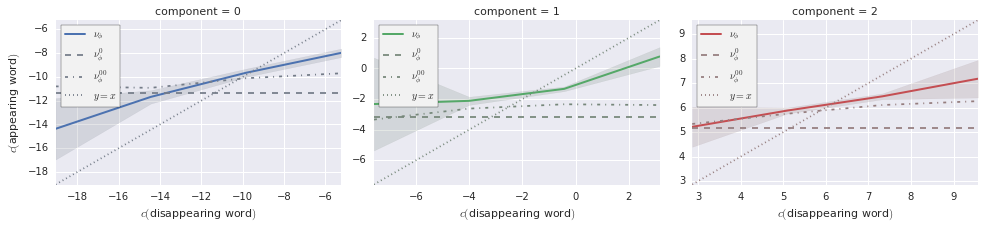

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.55320242  0.17977282  0.1568291   0.04208194  0.03917416]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.704869,-0.088610,0.341537,-0.555665,0.264339,-0.004600
Component-1,0.416091,0.110265,-0.482155,-0.715104,0.266183,-0.003085
Component-2,-0.567110,0.102324,-0.788260,0.212960,-0.011220,0.032919


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 65706) |          | Elapsed Time: 0:00:13 ETA:  10 days, 15:07:19

  0% (  131 of 65706) |                    | Elapsed Time: 0:00:14 ETA:  0:08:12

  0% (  258 of 65706) |                    | Elapsed Time: 0:00:15 ETA:  0:08:17

  0% (  384 of 65706) |                    | Elapsed Time: 0:00:16 ETA:  0:08:20

  0% (  510 of 65706) |                    | Elapsed Time: 0:00:17 ETA:  0:08:20

  0% (  646 of 65706) |                    | Elapsed Time: 0:00:19 ETA:  0:08:12

  1% (  785 of 65706) |                    | Elapsed Time: 0:00:20 ETA:  0:08:05

  1% (  822 of 65706) |                    | Elapsed Time: 0:00:20 ETA:  0:08:03

  1% (  964 of 65706) |                    | Elapsed Time: 0:00:21 ETA:  0:07:57

  1% ( 1106 of 65706) |                    | Elapsed Time: 0:00:22 ETA:  0:07:51

  1% ( 1250 of 65706) |                    | Elapsed Time: 0:00:23 ETA:  0:07:44

  2% ( 1397 of 65706) |                    | Elapsed Time: 0:00:24 ETA:  0:07:34

  2% ( 1558 of 65706) |                    | Elapsed Time: 0:00:25 ETA:  0:07:19

  2% ( 1643 of 65706) |                    | Elapsed Time: 0:00:25 ETA:  0:07:07

  2% ( 1805 of 65706) |                    | Elapsed Time: 0:00:26 ETA:  0:06:56

  2% ( 1892 of 65706) |                    | Elapsed Time: 0:00:27 ETA:  0:07:16

  2% ( 1965 of 65706) |                    | Elapsed Time: 0:00:28 ETA:  0:07:42

  3% ( 2039 of 65706) |                    | Elapsed Time: 0:00:29 ETA:  0:08:13

  3% ( 2119 of 65706) |                    | Elapsed Time: 0:00:30 ETA:  0:08:45

  3% ( 2194 of 65706) |                    | Elapsed Time: 0:00:31 ETA:  0:09:25

  3% ( 2268 of 65706) |                    | Elapsed Time: 0:00:32 ETA:  0:10:15

  3% ( 2340 of 65706) |                    | Elapsed Time: 0:00:33 ETA:  0:11:28

  3% ( 2412 of 65706) |                    | Elapsed Time: 0:00:34 ETA:  0:12:20

  3% ( 2464 of 65706) |                    | Elapsed Time: 0:00:35 ETA:  0:13:59

  3% ( 2545 of 65706) |                    | Elapsed Time: 0:00:36 ETA:  0:14:06

  4% ( 2690 of 65706) |                    | Elapsed Time: 0:00:37 ETA:  0:12:37

  4% ( 2827 of 65706) |                    | Elapsed Time: 0:00:38 ETA:  0:11:32

  4% ( 2960 of 65706) |                    | Elapsed Time: 0:00:39 ETA:  0:10:45

  4% ( 3099 of 65706) |                    | Elapsed Time: 0:00:40 ETA:  0:09:55

  5% ( 3286 of 65706) |#                   | Elapsed Time: 0:00:41 ETA:  0:08:23

  5% ( 3462 of 65706) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:28

  5% ( 3636 of 65706) |#                   | Elapsed Time: 0:00:43 ETA:  0:06:52

  5% ( 3808 of 65706) |#                   | Elapsed Time: 0:00:44 ETA:  0:06:18

  6% ( 3991 of 65706) |#                   | Elapsed Time: 0:00:45 ETA:  0:06:04

  6% ( 4107 of 65706) |#                   | Elapsed Time: 0:00:46 ETA:  0:05:53

  6% ( 4249 of 65706) |#                   | Elapsed Time: 0:00:47 ETA:  0:05:49

  6% ( 4395 of 65706) |#                   | Elapsed Time: 0:00:48 ETA:  0:05:46

  6% ( 4540 of 65706) |#                   | Elapsed Time: 0:00:49 ETA:  0:05:52

  7% ( 4682 of 65706) |#                   | Elapsed Time: 0:00:50 ETA:  0:05:58

  7% ( 4800 of 65706) |#                   | Elapsed Time: 0:00:51 ETA:  0:06:15

  7% ( 4928 of 65706) |#                   | Elapsed Time: 0:00:52 ETA:  0:06:21

  7% ( 5015 of 65706) |#                   | Elapsed Time: 0:00:53 ETA:  0:06:51

  7% ( 5129 of 65706) |#                   | Elapsed Time: 0:00:54 ETA:  0:07:18

  7% ( 5229 of 65706) |#                   | Elapsed Time: 0:00:55 ETA:  0:07:45

  8% ( 5410 of 65706) |#                   | Elapsed Time: 0:00:56 ETA:  0:07:26

  8% ( 5562 of 65706) |#                   | Elapsed Time: 0:00:57 ETA:  0:07:23

  8% ( 5684 of 65706) |#                   | Elapsed Time: 0:00:58 ETA:  0:07:32

  8% ( 5750 of 65706) |#                   | Elapsed Time: 0:00:58 ETA:  0:07:46

  8% ( 5850 of 65706) |#                   | Elapsed Time: 0:00:59 ETA:  0:07:54

  9% ( 5952 of 65706) |#                   | Elapsed Time: 0:01:00 ETA:  0:08:17

  9% ( 6055 of 65706) |#                   | Elapsed Time: 0:01:01 ETA:  0:08:08

  9% ( 6200 of 65706) |#                   | Elapsed Time: 0:01:02 ETA:  0:07:50

  9% ( 6351 of 65706) |#                   | Elapsed Time: 0:01:03 ETA:  0:07:25

  9% ( 6486 of 65706) |#                   | Elapsed Time: 0:01:04 ETA:  0:07:45

 10% ( 6571 of 65706) |##                  | Elapsed Time: 0:01:05 ETA:  0:07:53

 10% ( 6687 of 65706) |##                  | Elapsed Time: 0:01:06 ETA:  0:07:55

 10% ( 6804 of 65706) |##                  | Elapsed Time: 0:01:07 ETA:  0:07:49

 10% ( 6919 of 65706) |##                  | Elapsed Time: 0:01:08 ETA:  0:07:41

 10% ( 7031 of 65706) |##                  | Elapsed Time: 0:01:09 ETA:  0:07:35

 10% ( 7149 of 65706) |##                  | Elapsed Time: 0:01:10 ETA:  0:07:26

 11% ( 7270 of 65706) |##                  | Elapsed Time: 0:01:11 ETA:  0:07:37

 11% ( 7392 of 65706) |##                  | Elapsed Time: 0:01:12 ETA:  0:08:02

 11% ( 7508 of 65706) |##                  | Elapsed Time: 0:01:13 ETA:  0:08:12

 11% ( 7625 of 65706) |##                  | Elapsed Time: 0:01:14 ETA:  0:08:10

 11% ( 7744 of 65706) |##                  | Elapsed Time: 0:01:15 ETA:  0:08:09

 11% ( 7861 of 65706) |##                  | Elapsed Time: 0:01:16 ETA:  0:08:07

 12% ( 7977 of 65706) |##                  | Elapsed Time: 0:01:17 ETA:  0:08:03

 12% ( 8093 of 65706) |##                  | Elapsed Time: 0:01:18 ETA:  0:08:04

 12% ( 8214 of 65706) |##                  | Elapsed Time: 0:01:19 ETA:  0:08:06

 12% ( 8330 of 65706) |##                  | Elapsed Time: 0:01:20 ETA:  0:08:05

 12% ( 8451 of 65706) |##                  | Elapsed Time: 0:01:21 ETA:  0:08:01

 13% ( 8589 of 65706) |##                  | Elapsed Time: 0:01:22 ETA:  0:07:48

 13% ( 8728 of 65706) |##                  | Elapsed Time: 0:01:23 ETA:  0:07:35

 13% ( 8870 of 65706) |##                  | Elapsed Time: 0:01:24 ETA:  0:07:21

 13% ( 9035 of 65706) |##                  | Elapsed Time: 0:01:25 ETA:  0:06:58

 13% ( 9191 of 65706) |##                  | Elapsed Time: 0:01:26 ETA:  0:06:36

 14% ( 9336 of 65706) |##                  | Elapsed Time: 0:01:27 ETA:  0:06:31

 14% ( 9472 of 65706) |##                  | Elapsed Time: 0:01:28 ETA:  0:06:21

 14% ( 9605 of 65706) |##                  | Elapsed Time: 0:01:29 ETA:  0:06:16

 14% ( 9754 of 65706) |##                  | Elapsed Time: 0:01:30 ETA:  0:06:10

 15% ( 9856 of 65706) |###                 | Elapsed Time: 0:01:31 ETA:  0:06:07

 15% (10005 of 65706) |###                 | Elapsed Time: 0:01:32 ETA:  0:06:03

 15% (10154 of 65706) |###                 | Elapsed Time: 0:01:33 ETA:  0:06:00

 15% (10303 of 65706) |###                 | Elapsed Time: 0:01:34 ETA:  0:05:57

 15% (10454 of 65706) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:58

 16% (10604 of 65706) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:55

 16% (10678 of 65706) |###                 | Elapsed Time: 0:01:37 ETA:  0:05:50

 16% (10829 of 65706) |###                 | Elapsed Time: 0:01:38 ETA:  0:05:42

 16% (10957 of 65706) |###                 | Elapsed Time: 0:01:39 ETA:  0:05:49

 16% (11074 of 65706) |###                 | Elapsed Time: 0:01:40 ETA:  0:05:59

 17% (11199 of 65706) |###                 | Elapsed Time: 0:01:41 ETA:  0:06:07

 17% (11308 of 65706) |###                 | Elapsed Time: 0:01:42 ETA:  0:06:22

 17% (11434 of 65706) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:31

 17% (11499 of 65706) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:42

 17% (11629 of 65706) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:51

 17% (11740 of 65706) |###                 | Elapsed Time: 0:01:45 ETA:  0:07:04

 18% (11871 of 65706) |###                 | Elapsed Time: 0:01:46 ETA:  0:07:13

 18% (12003 of 65706) |###                 | Elapsed Time: 0:01:47 ETA:  0:07:10

 18% (12131 of 65706) |###                 | Elapsed Time: 0:01:48 ETA:  0:07:04

 18% (12261 of 65706) |###                 | Elapsed Time: 0:01:49 ETA:  0:07:01

 18% (12320 of 65706) |###                 | Elapsed Time: 0:01:50 ETA:  0:06:50

 18% (12448 of 65706) |###                 | Elapsed Time: 0:01:51 ETA:  0:06:48

 19% (12585 of 65706) |###                 | Elapsed Time: 0:01:52 ETA:  0:06:40

 19% (12720 of 65706) |###                 | Elapsed Time: 0:01:53 ETA:  0:06:37

 19% (12851 of 65706) |###                 | Elapsed Time: 0:01:54 ETA:  0:06:27

 19% (12966 of 65706) |###                 | Elapsed Time: 0:01:55 ETA:  0:06:33

 19% (13070 of 65706) |###                 | Elapsed Time: 0:01:56 ETA:  0:06:46

 20% (13142 of 65706) |####                | Elapsed Time: 0:01:56 ETA:  0:06:48

 20% (13264 of 65706) |####                | Elapsed Time: 0:01:57 ETA:  0:06:51

 20% (13342 of 65706) |####                | Elapsed Time: 0:01:58 ETA:  0:07:17

 20% (13427 of 65706) |####                | Elapsed Time: 0:01:59 ETA:  0:07:41

 20% (13517 of 65706) |####                | Elapsed Time: 0:02:00 ETA:  0:08:09

 20% (13652 of 65706) |####                | Elapsed Time: 0:02:01 ETA:  0:08:07

 20% (13787 of 65706) |####                | Elapsed Time: 0:02:02 ETA:  0:08:03

 21% (13920 of 65706) |####                | Elapsed Time: 0:02:03 ETA:  0:07:50

 21% (13963 of 65706) |####                | Elapsed Time: 0:02:04 ETA:  0:07:40

 21% (14095 of 65706) |####                | Elapsed Time: 0:02:05 ETA:  0:07:30

 21% (14207 of 65706) |####                | Elapsed Time: 0:02:06 ETA:  0:07:35

 21% (14360 of 65706) |####                | Elapsed Time: 0:02:07 ETA:  0:06:51

 22% (14515 of 65706) |####                | Elapsed Time: 0:02:08 ETA:  0:06:15

 22% (14667 of 65706) |####                | Elapsed Time: 0:02:09 ETA:  0:05:47

 22% (14784 of 65706) |####                | Elapsed Time: 0:02:09 ETA:  0:05:39

 22% (14956 of 65706) |####                | Elapsed Time: 0:02:10 ETA:  0:05:23

 23% (15123 of 65706) |####                | Elapsed Time: 0:02:11 ETA:  0:05:10

 23% (15224 of 65706) |####                | Elapsed Time: 0:02:12 ETA:  0:05:24

 23% (15325 of 65706) |####                | Elapsed Time: 0:02:13 ETA:  0:05:34

 23% (15425 of 65706) |####                | Elapsed Time: 0:02:14 ETA:  0:05:38

 23% (15562 of 65706) |####                | Elapsed Time: 0:02:15 ETA:  0:05:44

 23% (15606 of 65706) |####                | Elapsed Time: 0:02:16 ETA:  0:05:49

 23% (15760 of 65706) |####                | Elapsed Time: 0:02:17 ETA:  0:05:46

 24% (15911 of 65706) |####                | Elapsed Time: 0:02:18 ETA:  0:05:46

 24% (16061 of 65706) |####                | Elapsed Time: 0:02:19 ETA:  0:05:54

 24% (16214 of 65706) |####                | Elapsed Time: 0:02:20 ETA:  0:06:00

 24% (16358 of 65706) |####                | Elapsed Time: 0:02:21 ETA:  0:05:39

 25% (16427 of 65706) |#####               | Elapsed Time: 0:02:21 ETA:  0:05:30

 25% (16544 of 65706) |#####               | Elapsed Time: 0:02:22 ETA:  0:05:21

 25% (16718 of 65706) |#####               | Elapsed Time: 0:02:23 ETA:  0:05:05

 25% (16890 of 65706) |#####               | Elapsed Time: 0:02:24 ETA:  0:04:57

 25% (17062 of 65706) |#####               | Elapsed Time: 0:02:25 ETA:  0:04:50

 26% (17206 of 65706) |#####               | Elapsed Time: 0:02:26 ETA:  0:04:51

 26% (17248 of 65706) |#####               | Elapsed Time: 0:02:27 ETA:  0:04:55

 26% (17378 of 65706) |#####               | Elapsed Time: 0:02:28 ETA:  0:05:03

 26% (17506 of 65706) |#####               | Elapsed Time: 0:02:29 ETA:  0:05:08

 26% (17642 of 65706) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:03

 27% (17809 of 65706) |#####               | Elapsed Time: 0:02:31 ETA:  0:04:44

 27% (17952 of 65706) |#####               | Elapsed Time: 0:02:32 ETA:  0:04:54

 27% (18070 of 65706) |#####               | Elapsed Time: 0:02:33 ETA:  0:05:05

 27% (18223 of 65706) |#####               | Elapsed Time: 0:02:34 ETA:  0:05:12

 27% (18383 of 65706) |#####               | Elapsed Time: 0:02:35 ETA:  0:05:05

 28% (18531 of 65706) |#####               | Elapsed Time: 0:02:36 ETA:  0:04:59

 28% (18705 of 65706) |#####               | Elapsed Time: 0:02:37 ETA:  0:04:43

 28% (18891 of 65706) |#####               | Elapsed Time: 0:02:38 ETA:  0:04:20

 29% (19065 of 65706) |#####               | Elapsed Time: 0:02:39 ETA:  0:04:17

 29% (19230 of 65706) |#####               | Elapsed Time: 0:02:40 ETA:  0:04:08

 29% (19397 of 65706) |#####               | Elapsed Time: 0:02:41 ETA:  0:03:59

 29% (19551 of 65706) |#####               | Elapsed Time: 0:02:42 ETA:  0:03:58

 29% (19681 of 65706) |#####               | Elapsed Time: 0:02:43 ETA:  0:04:06

 30% (19712 of 65706) |######              | Elapsed Time: 0:02:43 ETA:  0:04:04

 30% (19862 of 65706) |######              | Elapsed Time: 0:02:44 ETA:  0:04:12

 30% (20023 of 65706) |######              | Elapsed Time: 0:02:45 ETA:  0:04:16

 30% (20186 of 65706) |######              | Elapsed Time: 0:02:46 ETA:  0:04:13

 30% (20334 of 65706) |######              | Elapsed Time: 0:02:47 ETA:  0:04:20

 31% (20481 of 65706) |######              | Elapsed Time: 0:02:48 ETA:  0:04:26

 31% (20534 of 65706) |######              | Elapsed Time: 0:02:48 ETA:  0:04:38

 31% (20692 of 65706) |######              | Elapsed Time: 0:02:49 ETA:  0:04:35

 31% (20874 of 65706) |######              | Elapsed Time: 0:02:50 ETA:  0:04:14

 32% (21051 of 65706) |######              | Elapsed Time: 0:02:51 ETA:  0:04:04

 32% (21199 of 65706) |######              | Elapsed Time: 0:02:52 ETA:  0:04:04

 32% (21304 of 65706) |######              | Elapsed Time: 0:02:53 ETA:  0:04:21

 32% (21355 of 65706) |######              | Elapsed Time: 0:02:54 ETA:  0:04:39

 32% (21463 of 65706) |######              | Elapsed Time: 0:02:55 ETA:  0:04:54

 32% (21590 of 65706) |######              | Elapsed Time: 0:02:56 ETA:  0:05:02

 33% (21720 of 65706) |######              | Elapsed Time: 0:02:57 ETA:  0:05:00

 33% (21831 of 65706) |######              | Elapsed Time: 0:02:58 ETA:  0:05:18

 33% (21959 of 65706) |######              | Elapsed Time: 0:02:59 ETA:  0:05:42

 33% (22098 of 65706) |######              | Elapsed Time: 0:03:00 ETA:  0:06:00

 33% (22176 of 65706) |######              | Elapsed Time: 0:03:01 ETA:  0:06:03

 33% (22339 of 65706) |######              | Elapsed Time: 0:03:02 ETA:  0:05:31

 34% (22488 of 65706) |######              | Elapsed Time: 0:03:03 ETA:  0:05:09

 34% (22604 of 65706) |######              | Elapsed Time: 0:03:04 ETA:  0:05:05

 34% (22735 of 65706) |######              | Elapsed Time: 0:03:05 ETA:  0:05:02

 34% (22904 of 65706) |######              | Elapsed Time: 0:03:06 ETA:  0:04:45

 35% (22998 of 65706) |#######             | Elapsed Time: 0:03:06 ETA:  0:04:35

 35% (23115 of 65706) |#######             | Elapsed Time: 0:03:07 ETA:  0:04:38

 35% (23233 of 65706) |#######             | Elapsed Time: 0:03:08 ETA:  0:04:46

 35% (23308 of 65706) |#######             | Elapsed Time: 0:03:09 ETA:  0:05:17

 35% (23470 of 65706) |#######             | Elapsed Time: 0:03:10 ETA:  0:05:16

 35% (23591 of 65706) |#######             | Elapsed Time: 0:03:11 ETA:  0:05:28

 36% (23717 of 65706) |#######             | Elapsed Time: 0:03:12 ETA:  0:05:23

 36% (23819 of 65706) |#######             | Elapsed Time: 0:03:13 ETA:  0:05:17

 36% (23982 of 65706) |#######             | Elapsed Time: 0:03:14 ETA:  0:05:19

 36% (24118 of 65706) |#######             | Elapsed Time: 0:03:15 ETA:  0:05:16

 36% (24284 of 65706) |#######             | Elapsed Time: 0:03:16 ETA:  0:04:54

 37% (24431 of 65706) |#######             | Elapsed Time: 0:03:17 ETA:  0:04:40

 37% (24566 of 65706) |#######             | Elapsed Time: 0:03:18 ETA:  0:04:17

 37% (24640 of 65706) |#######             | Elapsed Time: 0:03:19 ETA:  0:04:29

 37% (24760 of 65706) |#######             | Elapsed Time: 0:03:20 ETA:  0:04:28

 37% (24881 of 65706) |#######             | Elapsed Time: 0:03:21 ETA:  0:04:29

 38% (25004 of 65706) |#######             | Elapsed Time: 0:03:22 ETA:  0:04:37

 38% (25148 of 65706) |#######             | Elapsed Time: 0:03:23 ETA:  0:04:44

 38% (25292 of 65706) |#######             | Elapsed Time: 0:03:24 ETA:  0:04:39

 38% (25462 of 65706) |#######             | Elapsed Time: 0:03:25 ETA:  0:04:37

 38% (25569 of 65706) |#######             | Elapsed Time: 0:03:26 ETA:  0:04:53

 39% (25680 of 65706) |#######             | Elapsed Time: 0:03:27 ETA:  0:05:02

 39% (25809 of 65706) |#######             | Elapsed Time: 0:03:28 ETA:  0:04:59

 39% (25926 of 65706) |#######             | Elapsed Time: 0:03:29 ETA:  0:04:59

 39% (26081 of 65706) |#######             | Elapsed Time: 0:03:30 ETA:  0:04:44

 39% (26244 of 65706) |#######             | Elapsed Time: 0:03:31 ETA:  0:04:27

 40% (26283 of 65706) |########            | Elapsed Time: 0:03:31 ETA:  0:04:27

 40% (26428 of 65706) |########            | Elapsed Time: 0:03:32 ETA:  0:04:26

 40% (26566 of 65706) |########            | Elapsed Time: 0:03:33 ETA:  0:04:39

 40% (26704 of 65706) |########            | Elapsed Time: 0:03:34 ETA:  0:04:25

 40% (26834 of 65706) |########            | Elapsed Time: 0:03:35 ETA:  0:04:16

 41% (26965 of 65706) |########            | Elapsed Time: 0:03:36 ETA:  0:04:14

 41% (27104 of 65706) |########            | Elapsed Time: 0:03:37 ETA:  0:04:12

 41% (27264 of 65706) |########            | Elapsed Time: 0:03:38 ETA:  0:04:13

 41% (27413 of 65706) |########            | Elapsed Time: 0:03:39 ETA:  0:04:10

 41% (27562 of 65706) |########            | Elapsed Time: 0:03:40 ETA:  0:04:07

 42% (27716 of 65706) |########            | Elapsed Time: 0:03:41 ETA:  0:03:59

 42% (27853 of 65706) |########            | Elapsed Time: 0:03:42 ETA:  0:03:58

 42% (27926 of 65706) |########            | Elapsed Time: 0:03:42 ETA:  0:03:51

 42% (28073 of 65706) |########            | Elapsed Time: 0:03:43 ETA:  0:03:43

 42% (28232 of 65706) |########            | Elapsed Time: 0:03:44 ETA:  0:03:32

 43% (28344 of 65706) |########            | Elapsed Time: 0:03:45 ETA:  0:03:45

 43% (28482 of 65706) |########            | Elapsed Time: 0:03:46 ETA:  0:03:52

 43% (28629 of 65706) |########            | Elapsed Time: 0:03:47 ETA:  0:03:52

 43% (28747 of 65706) |########            | Elapsed Time: 0:03:48 ETA:  0:03:57

 43% (28891 of 65706) |########            | Elapsed Time: 0:03:49 ETA:  0:03:59

 44% (29032 of 65706) |########            | Elapsed Time: 0:03:50 ETA:  0:03:57

 44% (29173 of 65706) |########            | Elapsed Time: 0:03:51 ETA:  0:03:57

 44% (29320 of 65706) |########            | Elapsed Time: 0:03:52 ETA:  0:03:56

 44% (29480 of 65706) |########            | Elapsed Time: 0:03:53 ETA:  0:03:55

 45% (29568 of 65706) |#########           | Elapsed Time: 0:03:54 ETA:  0:03:39

 45% (29687 of 65706) |#########           | Elapsed Time: 0:03:55 ETA:  0:03:45

 45% (29835 of 65706) |#########           | Elapsed Time: 0:03:56 ETA:  0:03:44

 45% (29968 of 65706) |#########           | Elapsed Time: 0:03:57 ETA:  0:03:44

 45% (30096 of 65706) |#########           | Elapsed Time: 0:03:58 ETA:  0:03:49

 45% (30222 of 65706) |#########           | Elapsed Time: 0:03:59 ETA:  0:03:54

 46% (30390 of 65706) |#########           | Elapsed Time: 0:04:00 ETA:  0:03:56

 46% (30544 of 65706) |#########           | Elapsed Time: 0:04:01 ETA:  0:03:58

 46% (30693 of 65706) |#########           | Elapsed Time: 0:04:02 ETA:  0:03:57

 46% (30816 of 65706) |#########           | Elapsed Time: 0:04:03 ETA:  0:03:54

 47% (30959 of 65706) |#########           | Elapsed Time: 0:04:04 ETA:  0:03:56

 47% (31098 of 65706) |#########           | Elapsed Time: 0:04:05 ETA:  0:03:52

 47% (31211 of 65706) |#########           | Elapsed Time: 0:04:06 ETA:  0:03:48

 47% (31341 of 65706) |#########           | Elapsed Time: 0:04:07 ETA:  0:03:46

 47% (31485 of 65706) |#########           | Elapsed Time: 0:04:08 ETA:  0:03:44

 48% (31639 of 65706) |#########           | Elapsed Time: 0:04:09 ETA:  0:03:37

 48% (31797 of 65706) |#########           | Elapsed Time: 0:04:10 ETA:  0:03:35

 48% (31952 of 65706) |#########           | Elapsed Time: 0:04:11 ETA:  0:03:31

 48% (32032 of 65706) |#########           | Elapsed Time: 0:04:12 ETA:  0:03:20

 48% (32156 of 65706) |#########           | Elapsed Time: 0:04:13 ETA:  0:03:26

 49% (32274 of 65706) |#########           | Elapsed Time: 0:04:14 ETA:  0:03:33

 49% (32383 of 65706) |#########           | Elapsed Time: 0:04:15 ETA:  0:03:43

 49% (32539 of 65706) |#########           | Elapsed Time: 0:04:16 ETA:  0:03:32

 49% (32700 of 65706) |#########           | Elapsed Time: 0:04:17 ETA:  0:03:24

 50% (32854 of 65706) |##########          | Elapsed Time: 0:04:17 ETA:  0:03:17

 50% (33025 of 65706) |##########          | Elapsed Time: 0:04:18 ETA:  0:03:11

 50% (33181 of 65706) |##########          | Elapsed Time: 0:04:19 ETA:  0:03:10

 50% (33298 of 65706) |##########          | Elapsed Time: 0:04:20 ETA:  0:03:21

 50% (33387 of 65706) |##########          | Elapsed Time: 0:04:21 ETA:  0:03:34

 51% (33517 of 65706) |##########          | Elapsed Time: 0:04:22 ETA:  0:03:28

 51% (33645 of 65706) |##########          | Elapsed Time: 0:04:23 ETA:  0:03:20

 51% (33675 of 65706) |##########          | Elapsed Time: 0:04:24 ETA:  0:03:27

 51% (33805 of 65706) |##########          | Elapsed Time: 0:04:25 ETA:  0:03:39

 51% (33943 of 65706) |##########          | Elapsed Time: 0:04:26 ETA:  0:03:52

 51% (34075 of 65706) |##########          | Elapsed Time: 0:04:27 ETA:  0:04:10

 52% (34232 of 65706) |##########          | Elapsed Time: 0:04:28 ETA:  0:04:08

 52% (34395 of 65706) |##########          | Elapsed Time: 0:04:29 ETA:  0:03:46

 52% (34496 of 65706) |##########          | Elapsed Time: 0:04:29 ETA:  0:03:15

 52% (34628 of 65706) |##########          | Elapsed Time: 0:04:30 ETA:  0:03:13

 52% (34753 of 65706) |##########          | Elapsed Time: 0:04:31 ETA:  0:03:13

 53% (34878 of 65706) |##########          | Elapsed Time: 0:04:32 ETA:  0:03:17

 53% (35022 of 65706) |##########          | Elapsed Time: 0:04:33 ETA:  0:03:11

 53% (35175 of 65706) |##########          | Elapsed Time: 0:04:34 ETA:  0:03:04

 53% (35317 of 65706) |##########          | Elapsed Time: 0:04:35 ETA:  0:02:57

 54% (35482 of 65706) |##########          | Elapsed Time: 0:04:36 ETA:  0:02:53

 54% (35629 of 65706) |##########          | Elapsed Time: 0:04:37 ETA:  0:02:58

 54% (35778 of 65706) |##########          | Elapsed Time: 0:04:38 ETA:  0:03:01

 54% (35938 of 65706) |##########          | Elapsed Time: 0:04:39 ETA:  0:02:50

 54% (36079 of 65706) |##########          | Elapsed Time: 0:04:40 ETA:  0:02:44

 55% (36139 of 65706) |###########         | Elapsed Time: 0:04:41 ETA:  0:02:37

 55% (36312 of 65706) |###########         | Elapsed Time: 0:04:42 ETA:  0:02:27

 55% (36458 of 65706) |###########         | Elapsed Time: 0:04:43 ETA:  0:02:28

 55% (36629 of 65706) |###########         | Elapsed Time: 0:04:44 ETA:  0:02:20

 55% (36768 of 65706) |###########         | Elapsed Time: 0:04:45 ETA:  0:02:27

 56% (36915 of 65706) |###########         | Elapsed Time: 0:04:46 ETA:  0:02:26

 56% (36960 of 65706) |###########         | Elapsed Time: 0:04:46 ETA:  0:02:28

 56% (37094 of 65706) |###########         | Elapsed Time: 0:04:47 ETA:  0:02:37

 56% (37240 of 65706) |###########         | Elapsed Time: 0:04:48 ETA:  0:02:34

 56% (37354 of 65706) |###########         | Elapsed Time: 0:04:49 ETA:  0:02:43

 57% (37523 of 65706) |###########         | Elapsed Time: 0:04:50 ETA:  0:02:44

 57% (37665 of 65706) |###########         | Elapsed Time: 0:04:51 ETA:  0:02:44

 57% (37781 of 65706) |###########         | Elapsed Time: 0:04:52 ETA:  0:02:44

 57% (37939 of 65706) |###########         | Elapsed Time: 0:04:53 ETA:  0:02:35

 57% (38084 of 65706) |###########         | Elapsed Time: 0:04:54 ETA:  0:02:35

 58% (38236 of 65706) |###########         | Elapsed Time: 0:04:55 ETA:  0:02:30

 58% (38387 of 65706) |###########         | Elapsed Time: 0:04:56 ETA:  0:02:23

 58% (38554 of 65706) |###########         | Elapsed Time: 0:04:57 ETA:  0:02:15

 58% (38603 of 65706) |###########         | Elapsed Time: 0:04:57 ETA:  0:02:02

 58% (38755 of 65706) |###########         | Elapsed Time: 0:04:58 ETA:  0:02:07

 59% (38901 of 65706) |###########         | Elapsed Time: 0:04:59 ETA:  0:02:05

 59% (39053 of 65706) |###########         | Elapsed Time: 0:05:00 ETA:  0:02:11

 59% (39193 of 65706) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:17

 59% (39338 of 65706) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:16

 60% (39424 of 65706) |############        | Elapsed Time: 0:05:03 ETA:  0:02:15

 60% (39583 of 65706) |############        | Elapsed Time: 0:05:04 ETA:  0:02:11

 60% (39745 of 65706) |############        | Elapsed Time: 0:05:05 ETA:  0:02:12

 60% (39901 of 65706) |############        | Elapsed Time: 0:05:06 ETA:  0:02:09

 60% (40038 of 65706) |############        | Elapsed Time: 0:05:07 ETA:  0:02:13

 61% (40132 of 65706) |############        | Elapsed Time: 0:05:08 ETA:  0:02:30

 61% (40220 of 65706) |############        | Elapsed Time: 0:05:09 ETA:  0:02:54

 61% (40245 of 65706) |############        | Elapsed Time: 0:05:09 ETA:  0:03:02

 61% (40333 of 65706) |############        | Elapsed Time: 0:05:10 ETA:  0:03:29

 61% (40451 of 65706) |############        | Elapsed Time: 0:05:11 ETA:  0:03:40

 61% (40573 of 65706) |############        | Elapsed Time: 0:05:12 ETA:  0:03:59

 61% (40709 of 65706) |############        | Elapsed Time: 0:05:13 ETA:  0:04:13

 62% (40833 of 65706) |############        | Elapsed Time: 0:05:14 ETA:  0:04:31

 62% (40939 of 65706) |############        | Elapsed Time: 0:05:15 ETA:  0:04:51

 62% (41067 of 65706) |############        | Elapsed Time: 0:05:16 ETA:  0:04:17

 62% (41195 of 65706) |############        | Elapsed Time: 0:05:17 ETA:  0:03:53

 62% (41349 of 65706) |############        | Elapsed Time: 0:05:18 ETA:  0:03:30

 63% (41422 of 65706) |############        | Elapsed Time: 0:05:19 ETA:  0:03:37

 63% (41572 of 65706) |############        | Elapsed Time: 0:05:20 ETA:  0:03:20

 63% (41708 of 65706) |############        | Elapsed Time: 0:05:21 ETA:  0:03:13

 63% (41888 of 65706) |############        | Elapsed Time: 0:05:22 ETA:  0:02:56

 63% (42027 of 65706) |############        | Elapsed Time: 0:05:23 ETA:  0:02:40

 64% (42165 of 65706) |############        | Elapsed Time: 0:05:24 ETA:  0:02:43

 64% (42309 of 65706) |############        | Elapsed Time: 0:05:25 ETA:  0:02:36

 64% (42445 of 65706) |############        | Elapsed Time: 0:05:26 ETA:  0:02:43

 64% (42590 of 65706) |############        | Elapsed Time: 0:05:27 ETA:  0:02:11

 65% (42709 of 65706) |#############       | Elapsed Time: 0:05:28 ETA:  0:02:09

 65% (42878 of 65706) |#############       | Elapsed Time: 0:05:29 ETA:  0:01:55

 65% (43034 of 65706) |#############       | Elapsed Time: 0:05:30 ETA:  0:01:56

 65% (43158 of 65706) |#############       | Elapsed Time: 0:05:31 ETA:  0:02:04

 65% (43302 of 65706) |#############       | Elapsed Time: 0:05:32 ETA:  0:02:00

 66% (43438 of 65706) |#############       | Elapsed Time: 0:05:33 ETA:  0:02:00

 66% (43531 of 65706) |#############       | Elapsed Time: 0:05:34 ETA:  0:01:59

 66% (43652 of 65706) |#############       | Elapsed Time: 0:05:35 ETA:  0:02:04

 66% (43814 of 65706) |#############       | Elapsed Time: 0:05:36 ETA:  0:01:56

 66% (43971 of 65706) |#############       | Elapsed Time: 0:05:37 ETA:  0:01:55

 67% (44082 of 65706) |#############       | Elapsed Time: 0:05:38 ETA:  0:02:16

 67% (44232 of 65706) |#############       | Elapsed Time: 0:05:39 ETA:  0:02:17

 67% (44352 of 65706) |#############       | Elapsed Time: 0:05:39 ETA:  0:02:00

 67% (44508 of 65706) |#############       | Elapsed Time: 0:05:40 ETA:  0:01:54

 67% (44672 of 65706) |#############       | Elapsed Time: 0:05:41 ETA:  0:01:42

 68% (44803 of 65706) |#############       | Elapsed Time: 0:05:42 ETA:  0:01:46

 68% (44945 of 65706) |#############       | Elapsed Time: 0:05:43 ETA:  0:01:38

 68% (45098 of 65706) |#############       | Elapsed Time: 0:05:44 ETA:  0:01:40

 68% (45173 of 65706) |#############       | Elapsed Time: 0:05:45 ETA:  0:01:43

 68% (45292 of 65706) |#############       | Elapsed Time: 0:05:46 ETA:  0:01:39

 69% (45426 of 65706) |#############       | Elapsed Time: 0:05:47 ETA:  0:01:44

 69% (45570 of 65706) |#############       | Elapsed Time: 0:05:48 ETA:  0:01:52

 69% (45733 of 65706) |#############       | Elapsed Time: 0:05:49 ETA:  0:01:49

 69% (45879 of 65706) |#############       | Elapsed Time: 0:05:50 ETA:  0:01:55

 70% (45995 of 65706) |##############      | Elapsed Time: 0:05:51 ETA:  0:02:02

 70% (46148 of 65706) |##############      | Elapsed Time: 0:05:52 ETA:  0:02:01

 70% (46281 of 65706) |##############      | Elapsed Time: 0:05:53 ETA:  0:02:04

 70% (46434 of 65706) |##############      | Elapsed Time: 0:05:54 ETA:  0:01:49

 70% (46570 of 65706) |##############      | Elapsed Time: 0:05:55 ETA:  0:01:47

 71% (46683 of 65706) |##############      | Elapsed Time: 0:05:56 ETA:  0:01:59

 71% (46816 of 65706) |##############      | Elapsed Time: 0:05:57 ETA:  0:01:57

 71% (46958 of 65706) |##############      | Elapsed Time: 0:05:58 ETA:  0:01:58

 71% (47100 of 65706) |##############      | Elapsed Time: 0:05:59 ETA:  0:01:44

 71% (47224 of 65706) |##############      | Elapsed Time: 0:06:00 ETA:  0:01:50

 72% (47373 of 65706) |##############      | Elapsed Time: 0:06:01 ETA:  0:01:50

 72% (47543 of 65706) |##############      | Elapsed Time: 0:06:02 ETA:  0:01:35

 72% (47637 of 65706) |##############      | Elapsed Time: 0:06:02 ETA:  0:01:40

 72% (47783 of 65706) |##############      | Elapsed Time: 0:06:03 ETA:  0:01:35

 72% (47945 of 65706) |##############      | Elapsed Time: 0:06:04 ETA:  0:01:16

 73% (48080 of 65706) |##############      | Elapsed Time: 0:06:05 ETA:  0:01:26

 73% (48220 of 65706) |##############      | Elapsed Time: 0:06:06 ETA:  0:01:26

 73% (48378 of 65706) |##############      | Elapsed Time: 0:06:07 ETA:  0:01:20

 73% (48459 of 65706) |##############      | Elapsed Time: 0:06:08 ETA:  0:01:06

 74% (48631 of 65706) |##############      | Elapsed Time: 0:06:09 ETA:  0:00:58

 74% (48734 of 65706) |##############      | Elapsed Time: 0:06:10 ETA:  0:01:21

 74% (48871 of 65706) |##############      | Elapsed Time: 0:06:11 ETA:  0:01:20

 74% (49024 of 65706) |##############      | Elapsed Time: 0:06:12 ETA:  0:01:17

 74% (49187 of 65706) |##############      | Elapsed Time: 0:06:13 ETA:  0:01:15

 75% (49280 of 65706) |###############     | Elapsed Time: 0:06:13 ETA:  0:01:08

 75% (49408 of 65706) |###############     | Elapsed Time: 0:06:14 ETA:  0:01:12

 75% (49512 of 65706) |###############     | Elapsed Time: 0:06:15 ETA:  0:01:32

 75% (49668 of 65706) |###############     | Elapsed Time: 0:06:16 ETA:  0:01:31

 75% (49826 of 65706) |###############     | Elapsed Time: 0:06:17 ETA:  0:01:36

 76% (49967 of 65706) |###############     | Elapsed Time: 0:06:18 ETA:  0:01:20

 76% (50101 of 65706) |###############     | Elapsed Time: 0:06:19 ETA:  0:01:16

 76% (50241 of 65706) |###############     | Elapsed Time: 0:06:20 ETA:  0:01:20

 76% (50402 of 65706) |###############     | Elapsed Time: 0:06:21 ETA:  0:01:20

 76% (50530 of 65706) |###############     | Elapsed Time: 0:06:22 ETA:  0:01:28

 77% (50698 of 65706) |###############     | Elapsed Time: 0:06:23 ETA:  0:01:12

 77% (50803 of 65706) |###############     | Elapsed Time: 0:06:24 ETA:  0:01:14

 77% (50923 of 65706) |###############     | Elapsed Time: 0:06:26 ETA:  0:01:40

 77% (51050 of 65706) |###############     | Elapsed Time: 0:06:27 ETA:  0:01:46

 77% (51171 of 65706) |###############     | Elapsed Time: 0:06:28 ETA:  0:01:55

 78% (51318 of 65706) |###############     | Elapsed Time: 0:06:29 ETA:  0:01:51

 78% (51374 of 65706) |###############     | Elapsed Time: 0:06:38 ETA:  0:12:15

 78% (51509 of 65706) |###############     | Elapsed Time: 0:06:39 ETA:  0:12:05

 78% (51651 of 65706) |###############     | Elapsed Time: 0:06:40 ETA:  0:12:35

 78% (51744 of 65706) |###############     | Elapsed Time: 0:06:41 ETA:  0:12:21

 78% (51905 of 65706) |###############     | Elapsed Time: 0:06:42 ETA:  0:11:21

 79% (52020 of 65706) |###############     | Elapsed Time: 0:06:43 ETA:  0:10:31

 79% (52103 of 65706) |###############     | Elapsed Time: 0:06:44 ETA:  0:11:14

 79% (52230 of 65706) |###############     | Elapsed Time: 0:06:45 ETA:  0:11:07

 79% (52343 of 65706) |###############     | Elapsed Time: 0:06:46 ETA:  0:11:42

 79% (52463 of 65706) |###############     | Elapsed Time: 0:06:47 ETA:  0:01:58

 80% (52565 of 65706) |################    | Elapsed Time: 0:06:48 ETA:  0:02:06

 80% (52685 of 65706) |################    | Elapsed Time: 0:06:49 ETA:  0:02:17

 80% (52815 of 65706) |################    | Elapsed Time: 0:06:50 ETA:  0:02:17

 80% (52962 of 65706) |################    | Elapsed Time: 0:06:51 ETA:  0:02:23

 80% (53092 of 65706) |################    | Elapsed Time: 0:06:52 ETA:  0:02:13

 81% (53231 of 65706) |################    | Elapsed Time: 0:06:53 ETA:  0:01:45

 81% (53387 of 65706) |################    | Elapsed Time: 0:06:54 ETA:  0:01:28

 81% (53516 of 65706) |################    | Elapsed Time: 0:06:55 ETA:  0:01:22

 81% (53646 of 65706) |################    | Elapsed Time: 0:06:56 ETA:  0:01:16

 81% (53805 of 65706) |################    | Elapsed Time: 0:06:57 ETA:  0:00:58

 82% (53933 of 65706) |################    | Elapsed Time: 0:06:58 ETA:  0:00:58

 82% (54083 of 65706) |################    | Elapsed Time: 0:06:59 ETA:  0:00:56

 82% (54208 of 65706) |################    | Elapsed Time: 0:07:00 ETA:  0:00:48

 82% (54359 of 65706) |################    | Elapsed Time: 0:07:01 ETA:  0:00:42

 82% (54515 of 65706) |################    | Elapsed Time: 0:07:02 ETA:  0:00:36

 83% (54642 of 65706) |################    | Elapsed Time: 0:07:03 ETA:  0:00:41

 83% (54800 of 65706) |################    | Elapsed Time: 0:07:04 ETA:  0:00:29

 83% (54947 of 65706) |################    | Elapsed Time: 0:07:05 ETA:  0:00:23

 83% (55029 of 65706) |################    | Elapsed Time: 0:07:05 ETA:  0:00:31

 83% (55178 of 65706) |################    | Elapsed Time: 0:07:06 ETA:  0:00:22

 84% (55331 of 65706) |################    | Elapsed Time: 0:07:07 ETA:  0:00:21

 84% (55466 of 65706) |################    | Elapsed Time: 0:07:08 ETA:  0:00:24

 84% (55614 of 65706) |################    | Elapsed Time: 0:07:09 ETA:  0:00:25

 84% (55746 of 65706) |################    | Elapsed Time: 0:07:10 ETA:  0:00:32

 85% (55851 of 65706) |#################   | Elapsed Time: 0:07:11 ETA:  0:00:26

 85% (55984 of 65706) |#################   | Elapsed Time: 0:07:12 ETA:  0:00:35

 85% (56092 of 65706) |#################   | Elapsed Time: 0:07:13 ETA:  0:00:50

 85% (56237 of 65706) |#################   | Elapsed Time: 0:07:14 ETA:  0:00:43

 85% (56382 of 65706) |#################   | Elapsed Time: 0:07:15 ETA:  0:00:43

 86% (56532 of 65706) |#################   | Elapsed Time: 0:07:16 ETA:  0:00:43

 86% (56672 of 65706) |#################   | Elapsed Time: 0:07:17 ETA:  0:00:55

 86% (56799 of 65706) |#################   | Elapsed Time: 0:07:18 ETA:  0:00:56

 86% (56934 of 65706) |#################   | Elapsed Time: 0:07:19 ETA:  0:00:57

 86% (57061 of 65706) |#################   | Elapsed Time: 0:07:20 ETA:  0:00:59

 87% (57218 of 65706) |#################   | Elapsed Time: 0:07:21 ETA:  0:00:36

 87% (57354 of 65706) |#################   | Elapsed Time: 0:07:22 ETA:  0:00:39

 87% (57493 of 65706) |#################   | Elapsed Time: 0:07:23 ETA:  0:00:36

 87% (57631 of 65706) |#################   | Elapsed Time: 0:07:24 ETA:  0:00:40

 87% (57767 of 65706) |#################   | Elapsed Time: 0:07:25 ETA:  0:00:30

 88% (57900 of 65706) |#################   | Elapsed Time: 0:07:26 ETA:  0:00:32

 88% (58015 of 65706) |#################   | Elapsed Time: 0:07:27 ETA:  0:00:36

 88% (58142 of 65706) |#################   | Elapsed Time: 0:07:28 ETA:  0:00:38

 88% (58315 of 65706) |#################   | Elapsed Time: 0:07:29 ETA:  0:00:37

 88% (58460 of 65706) |#################   | Elapsed Time: 0:07:30 ETA:  0:00:32

 89% (58620 of 65706) |#################   | Elapsed Time: 0:07:31 ETA:  0:00:27

 89% (58754 of 65706) |#################   | Elapsed Time: 0:07:32 ETA:  0:00:28

 89% (58914 of 65706) |#################   | Elapsed Time: 0:07:33 ETA:  0:00:16

 89% (59052 of 65706) |#################   | Elapsed Time: 0:07:34 ETA:  0:00:14

 90% (59136 of 65706) |##################  | Elapsed Time: 0:07:35 ETA:  0:00:01

 90% (59283 of 65706) |##################  | Elapsed Time: 0:07:36 ETA:  0:00:00

 90% (59402 of 65706) |##################  | Elapsed Time: 0:07:37 ETA:  0:00:01

 90% (59545 of 65706) |##################  | Elapsed Time: 0:07:38 ETA:  0:00:01

 90% (59685 of 65706) |##################  | Elapsed Time: 0:07:39 ETA:  0:00:01

 91% (59824 of 65706) |##################  | Elapsed Time: 0:07:40 ETA:  0:00:08

 91% (59957 of 65706) |##################  | Elapsed Time: 0:07:41 ETA:  0:00:22

 91% (60098 of 65706) |##################  | Elapsed Time: 0:07:42 ETA:  0:00:20

 91% (60246 of 65706) |##################  | Elapsed Time: 0:07:43 ETA:  0:00:16

 91% (60403 of 65706) |##################  | Elapsed Time: 0:07:44 ETA:  0:00:11

 92% (60547 of 65706) |##################  | Elapsed Time: 0:07:45 ETA:  0:00:00

 92% (60686 of 65706) |##################  | Elapsed Time: 0:07:46 ETA:  0:00:00

 92% (60779 of 65706) |##################  | Elapsed Time: 0:07:47 ETA:  0:00:02

 92% (60905 of 65706) |##################  | Elapsed Time: 0:07:48 ETA:  0:00:07

 92% (61059 of 65706) |##################  | Elapsed Time: 0:07:49 ETA:  0:00:00

 93% (61212 of 65706) |##################  | Elapsed Time: 0:07:50 ETA:  0:00:00

 93% (61333 of 65706) |##################  | Elapsed Time: 0:07:51 ETA:  0:00:00

 93% (61479 of 65706) |##################  | Elapsed Time: 0:07:52 ETA:  0:00:00

 93% (61600 of 65706) |##################  | Elapsed Time: 0:07:53 ETA:  0:00:00

 93% (61738 of 65706) |##################  | Elapsed Time: 0:07:54 ETA:  0:00:00

 94% (61889 of 65706) |##################  | Elapsed Time: 0:07:55 ETA:  0:00:00

 94% (62034 of 65706) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:00

 94% (62182 of 65706) |##################  | Elapsed Time: 0:07:57 ETA:  0:00:00

 94% (62324 of 65706) |##################  | Elapsed Time: 0:07:58 ETA:  0:00:00

 95% (62421 of 65706) |################### | Elapsed Time: 0:07:58 ETA:  0:00:00

 95% (62566 of 65706) |################### | Elapsed Time: 0:07:59 ETA:  0:00:00

 95% (62720 of 65706) |################### | Elapsed Time: 0:08:00 ETA:  0:00:00

 95% (62848 of 65706) |################### | Elapsed Time: 0:08:01 ETA:  0:00:00

 95% (62994 of 65706) |################### | Elapsed Time: 0:08:02 ETA:  0:00:00

 96% (63136 of 65706) |################### | Elapsed Time: 0:08:03 ETA:  0:00:00

 96% (63243 of 65706) |################### | Elapsed Time: 0:08:04 ETA:  0:00:00

 96% (63374 of 65706) |################### | Elapsed Time: 0:08:05 ETA:  0:00:00

 96% (63526 of 65706) |################### | Elapsed Time: 0:08:06 ETA:  0:00:00

 96% (63629 of 65706) |################### | Elapsed Time: 0:08:07 ETA:  0:00:00

 97% (63760 of 65706) |################### | Elapsed Time: 0:08:08 ETA:  0:00:00

 97% (63903 of 65706) |################### | Elapsed Time: 0:08:09 ETA:  0:00:03

 97% (64064 of 65706) |################### | Elapsed Time: 0:08:10 ETA:  0:00:00

 97% (64217 of 65706) |################### | Elapsed Time: 0:08:11 ETA:  0:00:00

 97% (64365 of 65706) |################### | Elapsed Time: 0:08:12 ETA:  0:00:00

 98% (64520 of 65706) |################### | Elapsed Time: 0:08:13 ETA:  0:00:00

 98% (64656 of 65706) |################### | Elapsed Time: 0:08:14 ETA:  0:00:00

 98% (64791 of 65706) |################### | Elapsed Time: 0:08:15 ETA:  0:00:00

 98% (64885 of 65706) |################### | Elapsed Time: 0:08:16 ETA:  0:00:00

 98% (65037 of 65706) |################### | Elapsed Time: 0:08:17 ETA:  0:00:00

 99% (65182 of 65706) |################### | Elapsed Time: 0:08:18 ETA:  0:00:00

 99% (65321 of 65706) |################### | Elapsed Time: 0:08:19 ETA:  0:00:00

 99% (65459 of 65706) |################### | Elapsed Time: 0:08:20 ETA:  0:00:00

 99% (65603 of 65706) |################### | Elapsed Time: 0:08:21 ETA:  0:00:00

100% (65706 of 65706) |####################| Elapsed Time: 0:08:22 Time: 0:08:22


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

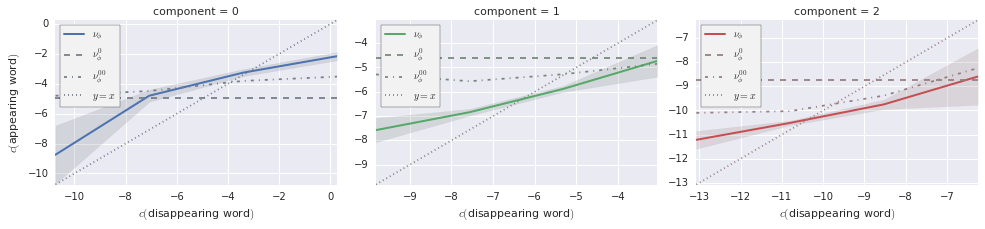

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 2276 (cluster-unique) substitutions, but the PCA is in fact computed on 888 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.